In [1]:
import sys
sys.path.append("..")
from IPython.display import display

In [2]:
import numpy as np
import logging
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import importlib 
plt.rcParams["figure.figsize"] = (8,8)

In [15]:
from scripts import reclusterTree
from scripts import linkageList
from scripts import heatClustermap
from scripts import Tree1D
from scripts import likelihood
from scripts import reclustGreedyLH
from scripts import beamSearch

In [16]:
# Reload filles after changes
importlib.reload(reclusterTree)
importlib.reload(linkageList)
importlib.reload(heatClustermap)
importlib.reload(Tree1D)
importlib.reload(likelihood)
importlib.reload(reclustGreedyLH)
importlib.reload(beamSearch)

<module 'scripts.beamSearch' from '/Users/sebastian/Dropbox/Documents/Physics_projects/simulator/TreeAlgorithms/scripts/beamSearch.py'>

In [319]:
# Data dir
input_dir= 'data/'
# input_dir ="../ToyJetsShower/data/"

In [320]:
input_jet = 'tree_13_truth'
# input_jet = 'tree_10_truth'

In [321]:
with open(input_dir+ str(input_jet) + '.pkl', "rb") as fd: 
    truth_jet = pickle.load(fd, encoding='latin-1')[0]

jet_name = ('_').join(input_jet.split('_')[-3:-1])
truth_jet["name"]=jet_name
truth_jet["algorithm"]="truth"

display(truth_jet["name"])

'tree_13'

In [322]:
# Number of jet constituents
linkageList.runTraverse_jet(truth_jet)
len(truth_jet["outers_list"])

10

In [323]:
# Recluster jet
recluster = False
if recluster:
    reclusterKt = reclusterTree.recluster(truth_jet, alpha=1)
    reclusterAntikt = reclusterTree.recluster(truth_jet, alpha=-1)
    reclusterCA = reclusterTree.recluster(truth_jet, alpha=0)

In [324]:
# Load reclustered jets
with open(input_dir+ str(truth_jet["name"])+'_1' + '.pkl', "rb") as fd: reclusterKt = pickle.load(fd, encoding='latin-1')
with open(input_dir+ str(truth_jet["name"])+'_-1' + '.pkl', "rb") as fd: reclusterAntikt = pickle.load(fd, encoding='latin-1')
with open(input_dir+ str(truth_jet["name"])+'_0' + '.pkl', "rb") as fd: reclusterCA = pickle.load(fd, encoding='latin-1')

# LIKELIHOOD BASED ALGORITHM

## BEAM SEARCH

We implement a beam seach algorithm to find the tree that maximizes the log likelihood, given a certain beam size
beamSearch_jets is a sorted list of all the latent path that give the best total log likelihood, with size N_best.
beamSearch[-1] returns the jet with the greatest likelihood

In [309]:
importlib.reload(beamSearch)
beamSearch_jets = beamSearch.recluster( 
    truth_jet, 
    beamSize = 30,
    delta_min =  truth_jet["pt_cut"],
    lam = truth_jet["Lambda"],
    N_best = 30,
)

In [310]:
beamSearch_jets[-1]["logLH"]

array([-1.97229087, -2.14269114,  0.03989708, -1.98505843, -0.72543311,
       -1.89435005, -2.16956115, -2.7541585 , -2.54218411])

In [311]:
beamSearch_jets[-2]["logLH"]

array([-2.14269114, -1.97229087,  0.03989708, -1.98505843, -0.72543311,
       -1.89435005, -2.16956115, -2.7541585 , -2.54218411])

In [312]:
np.sum(beamSearch_jets[-1]["logLH"])

-16.145830273628235

In [278]:
np.sum(beamSearch_jets[-20]["logLH"])

-21.52384328842163

In [196]:
importlib.reload(beamSearch)
truthConst = beamSearch.getConstituents(truth_jet,	-1,
	truth_jet["root_id"],
	[] )

In [209]:
importlib.reload(beamSearch)
maxlogLH_Tree, root_node = beamSearch.beamSearch(
                                                 truthConst,
                                                 beamSize= 50, 
                                                 delta_min =  truth_jet["pt_cut"]  , 
                                                 lam = truth_jet["Lambda"])

2019-08-09 12:10:25,230:DEBUG::Root node = (N constituents + N parent) = 18
2019-08-09 12:10:25,231:DEBUG::LEVEL = 0
2019-08-09 12:10:25,232:DEBUG:: LENGTH PREDECESSORS = 1
2019-08-09 12:10:25,233:DEBUG:: predecessors[0].idx [0 1 2 3 4 5 6 7 8 9]
2019-08-09 12:10:25,235:DEBUG:: predecessors[0].logLHHHHHHH []
2019-08-09 12:10:25,236:DEBUG:: len content_level ==== 10
2019-08-09 12:10:25,259:DEBUG:: max_tuples ======= [(tensor(-6.6064), 5), (tensor(-6.5633), 6), (tensor(-5.9839), 7), (tensor(-5.8939), 8), (tensor(-5.8660), 4), (tensor(-5.5570), 1), (tensor(-5.4408), 0), (tensor(-5.3709), 31), (tensor(-5.3390), 3), (tensor(-5.3346), 2), (tensor(-5.3314), 26), (tensor(-5.3045), 32), (tensor(-5.2589), 27), (tensor(-5.1839), 13), (tensor(-5.0994), 14), (tensor(-5.0404), 20), (tensor(-4.9484), 21), (tensor(-4.6963), 35), (tensor(-4.5640), 36), (tensor(-4.5017), 41), (tensor(-4.3834), 43), (tensor(-4.3105), 40), (tensor(-4.2888), 30), (tensor(-4.1683), 42), (tensor(-4.1540), 33), (tensor(-4.098

2019-08-09 12:10:25,280:DEBUG:: pairlogLH  = -6.606374740600586
2019-08-09 12:10:25,281:DEBUG:: predecessors[0].logLH  = []
2019-08-09 12:10:25,283:DEBUG:: pairlogLH  = -6.563296318054199
2019-08-09 12:10:25,284:DEBUG:: predecessors[0].logLH  = []
2019-08-09 12:10:25,286:DEBUG:: pairlogLH  = -5.983914375305176
2019-08-09 12:10:25,288:DEBUG:: predecessors[0].logLH  = []
2019-08-09 12:10:25,290:DEBUG:: pairlogLH  = -5.893884658813477
2019-08-09 12:10:25,291:DEBUG:: predecessors[0].logLH  = []
2019-08-09 12:10:25,301:DEBUG:: pairlogLH  = -5.8660078048706055
2019-08-09 12:10:25,303:DEBUG:: predecessors[0].logLH  = []
2019-08-09 12:10:25,304:DEBUG:: pairlogLH  = -5.557045936584473
2019-08-09 12:10:25,306:DEBUG:: predecessors[0].logLH  = []
2019-08-09 12:10:25,307:DEBUG:: pairlogLH  = -5.440820217132568
2019-08-09 12:10:25,309:DEBUG:: predecessors[0].logLH  = []
2019-08-09 12:10:25,310:DEBUG:: pairlogLH  = -5.370889663696289
2019-08-09 12:10:25,311:DEBUG:: predecessors[0].logLH  = []
2019-08

2019-08-09 12:10:25,502:DEBUG:: logLH before appending 1 = []
2019-08-09 12:10:25,502:DEBUG:: idx = [0 1 2 3 4 5 6 7 8 9]
2019-08-09 12:10:25,503:DEBUG::max_pair= [0 9]
2019-08-09 12:10:25,504:DEBUG:: lenght content_level 10
2019-08-09 12:10:25,505:DEBUG:: lenght N_leaves_list 10
2019-08-09 12:10:25,506:DEBUG:: lenght idx 10
2019-08-09 12:10:25,508:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:25,509:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:25,510:DEBUG:: logLH before appending = []
2019-08-09 12:10:25,512:DEBUG:: logLH after appending = [-5.89388466]
2019-08-09 12:10:25,514:DEBUG::idx = [ 1  2  3  4  5  6  7  8 10]
2019-08-09 12:10:25,514:DEBUG::------------------------------------------------------------
2019-08-09 12:10:25,515:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:25,516:DEBUG:: predecessors[0].logLH  = []
2019-08-09 12:10:25,517:DEBUG:: logLH before appending 1 = []
2019-08-09 12:10:25,519:DEBUG:: idx = [0 1 2 3 4 5 6 7 8 9]
2019-08-09 12:10:25,521:DEBUG::max_pa

2019-08-09 12:10:25,703:DEBUG::------------------------------------------------------------
2019-08-09 12:10:25,704:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:25,706:DEBUG:: predecessors[0].logLH  = []
2019-08-09 12:10:25,707:DEBUG:: logLH before appending 1 = []
2019-08-09 12:10:25,709:DEBUG:: idx = [0 1 2 3 4 5 6 7 8 9]
2019-08-09 12:10:25,710:DEBUG::max_pair= [1 6]
2019-08-09 12:10:25,711:DEBUG:: lenght content_level 10
2019-08-09 12:10:25,713:DEBUG:: lenght N_leaves_list 10
2019-08-09 12:10:25,714:DEBUG:: lenght idx 10
2019-08-09 12:10:25,715:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:25,716:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:25,718:DEBUG:: logLH before appending = []
2019-08-09 12:10:25,719:DEBUG:: logLH after appending = [-5.18394661]
2019-08-09 12:10:25,721:DEBUG::idx = [ 0  2  3  4  5  7  8  9 10]
2019-08-09 12:10:25,722:DEBUG::------------------------------------------------------------
2019-08-09 12:10:25,723:DEBUG:: logLH before appending 0 = []
2019-

2019-08-09 12:10:25,874:DEBUG:: logLH before appending = []
2019-08-09 12:10:25,875:DEBUG:: logLH after appending = [-4.28883934]
2019-08-09 12:10:25,877:DEBUG::idx = [ 0  1  2  3  6  7  8  9 10]
2019-08-09 12:10:25,878:DEBUG::------------------------------------------------------------
2019-08-09 12:10:25,879:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:25,880:DEBUG:: predecessors[0].logLH  = []
2019-08-09 12:10:25,881:DEBUG:: logLH before appending 1 = []
2019-08-09 12:10:25,884:DEBUG:: idx = [0 1 2 3 4 5 6 7 8 9]
2019-08-09 12:10:25,886:DEBUG::max_pair= [7 8]
2019-08-09 12:10:25,888:DEBUG:: lenght content_level 10
2019-08-09 12:10:25,891:DEBUG:: lenght N_leaves_list 10
2019-08-09 12:10:25,891:DEBUG:: lenght idx 10
2019-08-09 12:10:25,892:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:25,893:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:25,894:DEBUG:: logLH before appending = []
2019-08-09 12:10:25,895:DEBUG:: logLH after appending = [-4.16833258]
2019-08-09 12:10:25,897:DEBUG

2019-08-09 12:10:26,036:DEBUG:: lenght N_leaves_list 10
2019-08-09 12:10:26,039:DEBUG:: lenght idx 10
2019-08-09 12:10:26,041:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:26,042:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:26,044:DEBUG:: logLH before appending = []
2019-08-09 12:10:26,045:DEBUG:: logLH after appending = [-3.34291553]
2019-08-09 12:10:26,046:DEBUG::idx = [ 0  1  3  4  5  6  7  9 10]
2019-08-09 12:10:26,049:DEBUG::------------------------------------------------------------
2019-08-09 12:10:26,050:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:26,052:DEBUG:: predecessors[0].logLH  = []
2019-08-09 12:10:26,053:DEBUG:: logLH before appending 1 = []
2019-08-09 12:10:26,055:DEBUG:: idx = [0 1 2 3 4 5 6 7 8 9]
2019-08-09 12:10:26,056:DEBUG::max_pair= [1 9]
2019-08-09 12:10:26,059:DEBUG:: lenght content_level 10
2019-08-09 12:10:26,059:DEBUG:: lenght N_leaves_list 10
2019-08-09 12:10:26,062:DEBUG:: lenght idx 10
2019-08-09 12:10:26,063:DEBUG:: N_leaves_List = 1.0
2019-

2019-08-09 12:10:26,241:DEBUG:: idx = [0 1 2 3 4 5 6 7 8 9]
2019-08-09 12:10:26,243:DEBUG::max_pair= [1 2]
2019-08-09 12:10:26,244:DEBUG:: lenght content_level 10
2019-08-09 12:10:26,245:DEBUG:: lenght N_leaves_list 10
2019-08-09 12:10:26,246:DEBUG:: lenght idx 10
2019-08-09 12:10:26,247:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:26,248:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:26,249:DEBUG:: logLH before appending = []
2019-08-09 12:10:26,250:DEBUG:: logLH after appending = [-1.98505843]
2019-08-09 12:10:26,253:DEBUG::idx = [ 0  3  4  5  6  7  8  9 10]
2019-08-09 12:10:26,254:DEBUG::------------------------------------------------------------
2019-08-09 12:10:26,255:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:26,256:DEBUG:: predecessors[0].logLH  = []
2019-08-09 12:10:26,257:DEBUG:: logLH before appending 1 = []
2019-08-09 12:10:26,258:DEBUG:: idx = [0 1 2 3 4 5 6 7 8 9]
2019-08-09 12:10:26,259:DEBUG::max_pair= [3 4]
2019-08-09 12:10:26,260:DEBUG:: lenght content_level

2019-08-09 12:10:26,374:DEBUG:: predecessors[2].idx [ 1  2  3  4  5  6  7  9 10]
2019-08-09 12:10:26,376:DEBUG:: predecessors[2].logLHHHHHHH [-5.98391438]
2019-08-09 12:10:26,378:DEBUG:: len content_level ==== 9
2019-08-09 12:10:26,412:DEBUG:: max_tuples ======= [(tensor(-5.4693), 20), (tensor(-5.4682), 25), (tensor(-5.4281), 7), (tensor(-5.3827), 14), (tensor(-5.3709), 22), (tensor(-5.3314), 17), (tensor(-5.3045), 23), (tensor(-5.2797), 29), (tensor(-5.2589), 18), (tensor(-5.2570), 35), (tensor(-5.1839), 4), (tensor(-5.0994), 5), (tensor(-5.0535), 34), (tensor(-5.0422), 32), (tensor(-5.0404), 11), (tensor(-4.9484), 12), (tensor(-4.6963), 26), (tensor(-4.5640), 27), (tensor(-4.5017), 31), (tensor(-4.3834), 33), (tensor(-4.2888), 21), (tensor(-4.0988), 16), (tensor(-3.8305), 24), (tensor(-3.6966), 19), (tensor(-3.6667), 3), (tensor(-3.4122), 10), (tensor(-3.3235), 6), (tensor(-3.1457), 28), (tensor(-3.0111), 9), (tensor(-2.9571), 13), (tensor(-2.7023), 2), (tensor(-2.6812), 8), (tensor(

2019-08-09 12:10:26,497:DEBUG:: predecessors[5].idx [ 1  3  4  5  6  7  8  9 10]
2019-08-09 12:10:26,499:DEBUG:: predecessors[5].logLHHHHHHH [-5.55704594]
2019-08-09 12:10:26,500:DEBUG:: len content_level ==== 9
2019-08-09 12:10:26,520:DEBUG:: max_tuples ======= [(tensor(-5.3709), 16), (tensor(-5.3314), 10), (tensor(-5.3045), 17), (tensor(-5.2589), 11), (tensor(-5.1839), 3), (tensor(-5.0994), 4), (tensor(-4.8414), 20), (tensor(-4.8408), 14), (tensor(-4.8211), 7), (tensor(-4.7551), 25), (tensor(-4.7471), 35), (tensor(-4.7347), 34), (tensor(-4.6963), 21), (tensor(-4.6687), 32), (tensor(-4.6651), 29), (tensor(-4.5640), 22), (tensor(-4.5017), 28), (tensor(-4.3834), 31), (tensor(-4.3105), 27), (tensor(-4.2888), 15), (tensor(-4.1683), 30), (tensor(-4.1540), 18), (tensor(-4.0988), 9), (tensor(-4.0220), 12), (tensor(-3.8305), 19), (tensor(-3.6966), 13), (tensor(-3.6667), 2), (tensor(-3.6625), 5), (tensor(-3.3235), 6), (tensor(-3.1457), 24), (tensor(-2.8918), 23), (tensor(-2.7023), 1), (tensor(

2019-08-09 12:10:26,613:DEBUG:: predecessors[8].idx [ 1  2  3  5  6  7  8  9 10]
2019-08-09 12:10:26,615:DEBUG:: predecessors[8].logLHHHHHHH [-5.3389883]
2019-08-09 12:10:26,617:DEBUG:: len content_level ==== 9
2019-08-09 12:10:26,643:DEBUG:: max_tuples ======= [(tensor(-5.3314), 16), (tensor(-5.2589), 17), (tensor(-5.1839), 3), (tensor(-5.0994), 4), (tensor(-5.0404), 10), (tensor(-4.9484), 11), (tensor(-4.6963), 21), (tensor(-4.6138), 20), (tensor(-4.6008), 7), (tensor(-4.5889), 14), (tensor(-4.5640), 22), (tensor(-4.5615), 25), (tensor(-4.5591), 35), (tensor(-4.5522), 34), (tensor(-4.5239), 32), (tensor(-4.5229), 29), (tensor(-4.5017), 28), (tensor(-4.3834), 31), (tensor(-4.3105), 27), (tensor(-4.1683), 30), (tensor(-4.0988), 15), (tensor(-4.0220), 18), (tensor(-3.6966), 19), (tensor(-3.6667), 2), (tensor(-3.6625), 5), (tensor(-3.4122), 9), (tensor(-3.3429), 12), (tensor(-3.3235), 6), (tensor(-3.1457), 24), (tensor(-2.9571), 13), (tensor(-2.8918), 23), (tensor(-2.6812), 8), (tensor(-

2019-08-09 12:10:26,742:DEBUG:: predecessors[11].idx [ 0  1  2  3  5  6  8  9 10]
2019-08-09 12:10:26,744:DEBUG:: predecessors[11].logLHHHHHHH [-5.30448437]
2019-08-09 12:10:26,747:DEBUG:: len content_level ==== 9
2019-08-09 12:10:26,785:DEBUG:: max_tuples ======= [(tensor(-9.4451), 7), (tensor(-8.2461), 25), (tensor(-7.6686), 14), (tensor(-7.1610), 20), (tensor(-6.6064), 4), (tensor(-6.1218), 35), (tensor(-6.1008), 29), (tensor(-5.9839), 5), (tensor(-5.9050), 34), (tensor(-5.8939), 6), (tensor(-5.8660), 3), (tensor(-5.5570), 1), (tensor(-5.4408), 0), (tensor(-5.3346), 2), (tensor(-5.3314), 22), (tensor(-5.1839), 11), (tensor(-5.0404), 17), (tensor(-5.0120), 32), (tensor(-4.6963), 26), (tensor(-4.5017), 31), (tensor(-4.3105), 30), (tensor(-4.0988), 21), (tensor(-4.0220), 23), (tensor(-3.6966), 24), (tensor(-3.6667), 10), (tensor(-3.6625), 12), (tensor(-3.4122), 16), (tensor(-3.3429), 18), (tensor(-3.3235), 13), (tensor(-3.1457), 28), (tensor(-2.9571), 19), (tensor(-2.8918), 27), (tenso

2019-08-09 12:10:26,874:DEBUG:: predecessors[14].idx [ 0  2  3  4  5  6  8  9 10]
2019-08-09 12:10:26,876:DEBUG:: predecessors[14].logLHHHHHHH [-5.09939575]
2019-08-09 12:10:26,877:DEBUG:: len content_level ==== 9
2019-08-09 12:10:26,904:DEBUG:: max_tuples ======= [(tensor(-7.7757), 20), (tensor(-7.6378), 7), (tensor(-7.5156), 25), (tensor(-7.0065), 14), (tensor(-6.6064), 4), (tensor(-6.0641), 29), (tensor(-5.9839), 5), (tensor(-5.9151), 35), (tensor(-5.8939), 6), (tensor(-5.8660), 3), (tensor(-5.7310), 34), (tensor(-5.5570), 0), (tensor(-5.3709), 22), (tensor(-5.3390), 2), (tensor(-5.3346), 1), (tensor(-5.3314), 17), (tensor(-5.0404), 11), (tensor(-4.8238), 32), (tensor(-4.6963), 26), (tensor(-4.5017), 31), (tensor(-4.3105), 30), (tensor(-4.2888), 21), (tensor(-4.1540), 23), (tensor(-4.0988), 16), (tensor(-4.0220), 18), (tensor(-3.8305), 24), (tensor(-3.6966), 19), (tensor(-3.4122), 10), (tensor(-3.3429), 12), (tensor(-3.1457), 28), (tensor(-3.0111), 9), (tensor(-2.9571), 13), (tensor

2019-08-09 12:10:26,989:DEBUG:: predecessors[17].idx [ 0  1  2  3  4  7  8  9 10]
2019-08-09 12:10:26,991:DEBUG:: predecessors[17].logLHHHHHHH [-4.69629669]
2019-08-09 12:10:26,992:DEBUG:: len content_level ==== 9
2019-08-09 12:10:27,024:DEBUG:: max_tuples ======= [(tensor(-7.1591), 14), (tensor(-6.9094), 20), (tensor(-6.6248), 25), (tensor(-6.5633), 4), (tensor(-6.1826), 29), (tensor(-5.9839), 5), (tensor(-5.8939), 6), (tensor(-5.8023), 35), (tensor(-5.7136), 34), (tensor(-5.5570), 1), (tensor(-5.4408), 0), (tensor(-5.3390), 3), (tensor(-5.3346), 2), (tensor(-5.3045), 26), (tensor(-5.2589), 22), (tensor(-5.0994), 11), (tensor(-5.0076), 7), (tensor(-4.9484), 17), (tensor(-4.6215), 32), (tensor(-4.3834), 31), (tensor(-4.1683), 30), (tensor(-4.1540), 27), (tensor(-4.0220), 23), (tensor(-3.8305), 28), (tensor(-3.6966), 24), (tensor(-3.6625), 12), (tensor(-3.3429), 18), (tensor(-3.3235), 13), (tensor(-3.0111), 16), (tensor(-2.9571), 19), (tensor(-2.7023), 10), (tensor(-2.6812), 15), (tenso

2019-08-09 12:10:27,105:DEBUG:: predecessors[20].idx [ 0  1  2  3  4  5  6  8 10]
2019-08-09 12:10:27,106:DEBUG:: predecessors[20].logLHHHHHHH [-4.38341141]
2019-08-09 12:10:27,108:DEBUG:: len content_level ==== 9
2019-08-09 12:10:27,137:DEBUG:: max_tuples ======= [(tensor(-8.5780), 14), (tensor(-8.1292), 25), (tensor(-7.5786), 20), (tensor(-7.2098), 29), (tensor(-6.6064), 5), (tensor(-5.9839), 6), (tensor(-5.8660), 32), (tensor(-5.8660), 4), (tensor(-5.5570), 1), (tensor(-5.4408), 0), (tensor(-5.3709), 27), (tensor(-5.3390), 3), (tensor(-5.3346), 2), (tensor(-5.3320), 35), (tensor(-5.3314), 23), (tensor(-5.1839), 12), (tensor(-5.0404), 18), (tensor(-4.6963), 30), (tensor(-4.6586), 7), (tensor(-4.3105), 33), (tensor(-4.2888), 26), (tensor(-4.2469), 34), (tensor(-4.1540), 28), (tensor(-4.0988), 22), (tensor(-4.0220), 24), (tensor(-3.6667), 11), (tensor(-3.6625), 13), (tensor(-3.4122), 17), (tensor(-3.3429), 19), (tensor(-3.0111), 16), (tensor(-2.8918), 31), (tensor(-2.7023), 10), (tenso

2019-08-09 12:10:27,214:DEBUG:: predecessors[23].idx [ 0  1  2  3  4  5  6  9 10]
2019-08-09 12:10:27,215:DEBUG:: predecessors[23].logLHHHHHHH [-4.16833258]
2019-08-09 12:10:27,217:DEBUG:: len content_level ==== 9
2019-08-09 12:10:27,245:DEBUG:: max_tuples ======= [(tensor(-7.6483), 14), (tensor(-7.0625), 20), (tensor(-6.7483), 25), (tensor(-6.6064), 5), (tensor(-6.0395), 29), (tensor(-5.8939), 6), (tensor(-5.8877), 32), (tensor(-5.8660), 4), (tensor(-5.5570), 1), (tensor(-5.4408), 0), (tensor(-5.3709), 27), (tensor(-5.3390), 3), (tensor(-5.3346), 2), (tensor(-5.3314), 23), (tensor(-5.3055), 35), (tensor(-5.1839), 12), (tensor(-5.0404), 18), (tensor(-4.6963), 30), (tensor(-4.5017), 33), (tensor(-4.2888), 26), (tensor(-4.2440), 7), (tensor(-4.0988), 22), (tensor(-4.0642), 34), (tensor(-3.8305), 28), (tensor(-3.6966), 24), (tensor(-3.6667), 11), (tensor(-3.4122), 17), (tensor(-3.3235), 13), (tensor(-3.1457), 31), (tensor(-3.0111), 16), (tensor(-2.9571), 19), (tensor(-2.7023), 10), (tenso

2019-08-09 12:10:27,341:DEBUG:: predecessors[26].idx [ 0  1  2  4  5  6  7  9 10]
2019-08-09 12:10:27,343:DEBUG:: predecessors[26].logLHHHHHHH [-4.02197266]
2019-08-09 12:10:27,344:DEBUG:: len content_level ==== 9
2019-08-09 12:10:27,375:DEBUG:: max_tuples ======= [(tensor(-30.8892), 7), (tensor(-6.6064), 4), (tensor(-6.5633), 5), (tensor(-5.8939), 6), (tensor(-5.8660), 3), (tensor(-5.5570), 1), (tensor(-5.4408), 0), (tensor(-5.3709), 22), (tensor(-5.3390), 2), (tensor(-5.3045), 23), (tensor(-5.1839), 11), (tensor(-5.0994), 12), (tensor(-5.0404), 17), (tensor(-4.9484), 18), (tensor(-4.6963), 26), (tensor(-4.5640), 27), (tensor(-4.5017), 31), (tensor(-4.3834), 33), (tensor(-4.2888), 21), (tensor(-3.9486), 25), (tensor(-3.9156), 14), (tensor(-3.8826), 20), (tensor(-3.8305), 24), (tensor(-3.8212), 29), (tensor(-3.8165), 35), (tensor(-3.7957), 32), (tensor(-3.7931), 34), (tensor(-3.6667), 10), (tensor(-3.4122), 16), (tensor(-3.3235), 13), (tensor(-3.1457), 28), (tensor(-3.0111), 15), (tens

2019-08-09 12:10:27,445:DEBUG:: predecessors[29].idx [ 0  2  3  4  6  7  8  9 10]
2019-08-09 12:10:27,448:DEBUG:: predecessors[29].logLHHHHHHH [-3.66672897]
2019-08-09 12:10:27,452:DEBUG:: len content_level ==== 9
2019-08-09 12:10:27,479:DEBUG:: max_tuples ======= [(tensor(-6.6064), 3), (tensor(-6.5633), 4), (tensor(-5.9839), 5), (tensor(-5.8939), 6), (tensor(-5.6530), 7), (tensor(-5.5570), 0), (tensor(-5.3709), 21), (tensor(-5.3390), 2), (tensor(-5.3346), 1), (tensor(-5.3314), 16), (tensor(-5.3045), 22), (tensor(-5.2589), 17), (tensor(-5.0404), 10), (tensor(-4.9484), 11), (tensor(-4.5017), 28), (tensor(-4.3834), 31), (tensor(-4.3105), 27), (tensor(-4.1683), 30), (tensor(-4.1540), 23), (tensor(-4.0220), 18), (tensor(-3.8305), 24), (tensor(-3.6966), 19), (tensor(-3.6368), 29), (tensor(-3.6298), 32), (tensor(-3.5987), 20), (tensor(-3.5952), 25), (tensor(-3.5840), 14), (tensor(-3.5772), 34), (tensor(-3.5756), 35), (tensor(-3.3429), 12), (tensor(-3.0111), 9), (tensor(-2.9571), 13), (tensor

2019-08-09 12:10:27,566:DEBUG:: predecessors[32].idx [ 0  1  3  4  5  6  7  9 10]
2019-08-09 12:10:27,568:DEBUG:: predecessors[32].logLHHHHHHH [-3.34291553]
2019-08-09 12:10:27,569:DEBUG:: len content_level ==== 9
2019-08-09 12:10:27,583:DEBUG:: max_tuples ======= [(tensor(-7.8548), 7), (tensor(-6.6064), 4), (tensor(-6.5633), 5), (tensor(-5.8939), 6), (tensor(-5.8660), 3), (tensor(-5.4408), 0), (tensor(-5.3709), 22), (tensor(-5.3390), 2), (tensor(-5.3346), 1), (tensor(-5.3314), 17), (tensor(-5.3045), 23), (tensor(-5.2589), 18), (tensor(-5.1839), 11), (tensor(-5.0994), 12), (tensor(-4.6963), 26), (tensor(-4.5640), 27), (tensor(-4.5017), 31), (tensor(-4.3834), 33), (tensor(-4.2888), 21), (tensor(-4.0988), 16), (tensor(-3.8305), 24), (tensor(-3.6966), 19), (tensor(-3.6667), 10), (tensor(-3.4709), 32), (tensor(-3.4617), 34), (tensor(-3.3980), 20), (tensor(-3.3948), 25), (tensor(-3.3879), 14), (tensor(-3.3760), 35), (tensor(-3.3736), 29), (tensor(-3.3235), 13), (tensor(-3.1457), 28), (tenso

2019-08-09 12:10:27,655:DEBUG:: predecessors[35].idx [ 0  1  3  5  6  7  8  9 10]
2019-08-09 12:10:27,658:DEBUG:: predecessors[35].logLHHHHHHH [-3.01114321]
2019-08-09 12:10:27,659:DEBUG:: len content_level ==== 9
2019-08-09 12:10:27,677:DEBUG:: max_tuples ======= [(tensor(-6.6064), 3), (tensor(-6.5633), 4), (tensor(-5.9839), 5), (tensor(-5.8939), 6), (tensor(-5.8660), 2), (tensor(-5.4408), 0), (tensor(-5.3346), 1), (tensor(-5.3314), 16), (tensor(-5.2589), 17), (tensor(-5.1839), 10), (tensor(-5.0994), 11), (tensor(-4.6963), 21), (tensor(-4.5640), 22), (tensor(-4.5017), 28), (tensor(-4.3834), 31), (tensor(-4.3105), 27), (tensor(-4.1683), 30), (tensor(-4.0988), 15), (tensor(-4.0220), 18), (tensor(-3.7334), 7), (tensor(-3.6966), 19), (tensor(-3.6667), 9), (tensor(-3.6625), 12), (tensor(-3.4632), 29), (tensor(-3.4523), 32), (tensor(-3.3235), 13), (tensor(-3.3183), 34), (tensor(-3.2994), 35), (tensor(-3.2978), 25), (tensor(-3.2244), 14), (tensor(-3.2081), 20), (tensor(-3.1457), 24), (tensor

2019-08-09 12:10:27,744:DEBUG:: predecessors[38].idx [ 0  2  3  5  6  7  8  9 10]
2019-08-09 12:10:27,745:DEBUG:: predecessors[38].logLHHHHHHH [-2.70233798]
2019-08-09 12:10:27,746:DEBUG:: len content_level ==== 9
2019-08-09 12:10:27,761:DEBUG:: max_tuples ======= [(tensor(-6.6064), 3), (tensor(-6.5633), 4), (tensor(-5.9839), 5), (tensor(-5.8939), 6), (tensor(-5.8660), 2), (tensor(-5.5570), 0), (tensor(-5.3346), 1), (tensor(-5.3314), 16), (tensor(-5.2589), 17), (tensor(-5.0404), 10), (tensor(-4.9484), 11), (tensor(-4.6963), 21), (tensor(-4.5640), 22), (tensor(-4.5017), 28), (tensor(-4.3834), 31), (tensor(-4.3105), 27), (tensor(-4.1683), 30), (tensor(-4.0988), 15), (tensor(-4.0220), 18), (tensor(-3.6966), 19), (tensor(-3.4122), 9), (tensor(-3.4024), 29), (tensor(-3.3902), 32), (tensor(-3.3429), 12), (tensor(-3.2349), 34), (tensor(-3.2116), 35), (tensor(-3.2101), 25), (tensor(-3.1457), 24), (tensor(-3.1376), 14), (tensor(-3.0900), 20), (tensor(-3.0826), 7), (tensor(-2.9571), 13), (tensor

2019-08-09 12:10:27,824:DEBUG:: predecessors[41].idx [ 0  1  2  3  4  5  6  7 10]
2019-08-09 12:10:27,826:DEBUG:: predecessors[41].logLHHHHHHH [-2.14269114]
2019-08-09 12:10:27,826:DEBUG:: len content_level ==== 9
2019-08-09 12:10:27,842:DEBUG:: max_tuples ======= [(tensor(-6.6064), 5), (tensor(-6.5633), 6), (tensor(-5.8660), 4), (tensor(-5.5570), 1), (tensor(-5.4408), 0), (tensor(-5.3709), 27), (tensor(-5.3390), 3), (tensor(-5.3346), 2), (tensor(-5.3314), 23), (tensor(-5.3045), 28), (tensor(-5.2589), 24), (tensor(-5.1839), 12), (tensor(-5.0994), 13), (tensor(-5.0404), 18), (tensor(-4.9484), 19), (tensor(-4.6963), 30), (tensor(-4.5640), 31), (tensor(-4.2888), 26), (tensor(-4.0988), 22), (tensor(-3.6667), 11), (tensor(-3.4122), 17), (tensor(-3.0111), 16), (tensor(-2.9917), 34), (tensor(-2.9712), 35), (tensor(-2.7023), 10), (tensor(-2.6812), 15), (tensor(-2.6623), 32), (tensor(-2.5628), 20), (tensor(-2.5266), 14), (tensor(-2.5163), 29), (tensor(-2.5059), 25), (tensor(-2.4389), 7), (tenso

2019-08-09 12:10:27,910:DEBUG:: predecessors[44].idx [ 0  1  2  3  4  5  8  9 10]
2019-08-09 12:10:27,912:DEBUG:: predecessors[44].logLHHHHHHH [-1.89435005]
2019-08-09 12:10:27,913:DEBUG:: len content_level ==== 9
2019-08-09 12:10:27,934:DEBUG:: max_tuples ======= [(tensor(-5.9839), 5), (tensor(-5.8939), 6), (tensor(-5.8660), 4), (tensor(-5.5570), 1), (tensor(-5.4408), 0), (tensor(-5.3390), 3), (tensor(-5.3346), 2), (tensor(-4.2888), 26), (tensor(-4.1540), 27), (tensor(-4.0988), 22), (tensor(-4.0220), 23), (tensor(-3.8305), 28), (tensor(-3.6966), 24), (tensor(-3.6667), 11), (tensor(-3.6625), 12), (tensor(-3.4122), 17), (tensor(-3.3429), 18), (tensor(-3.3235), 13), (tensor(-3.1457), 31), (tensor(-3.0111), 16), (tensor(-2.9571), 19), (tensor(-2.8918), 30), (tensor(-2.7830), 7), (tensor(-2.7023), 10), (tensor(-2.6812), 15), (tensor(-2.4266), 34), (tensor(-2.2772), 9), (tensor(-2.1696), 32), (tensor(-2.1678), 29), (tensor(-2.1427), 33), (tensor(-2.1252), 25), (tensor(-2.0325), 14), (tensor

2019-08-09 12:10:27,992:DEBUG:: predecessors[37].logLH  = [-2.8918016]
2019-08-09 12:10:27,994:DEBUG:: pairlogLH  = -2.891801595687866
2019-08-09 12:10:27,998:DEBUG:: predecessors[44].logLH  = [-1.89435005]
2019-08-09 12:10:27,999:DEBUG:: pairlogLH  = -2.7363674640655518
2019-08-09 12:10:28,001:DEBUG:: predecessors[42].logLH  = [-1.98505843]
2019-08-09 12:10:28,002:DEBUG:: pairlogLH  = -2.73515248298645
2019-08-09 12:10:28,003:DEBUG:: predecessors[42].logLH  = [-1.98505843]
2019-08-09 12:10:28,005:DEBUG:: pairlogLH  = -2.562800407409668
2019-08-09 12:10:28,006:DEBUG:: predecessors[41].logLH  = [-2.14269114]
2019-08-09 12:10:28,007:DEBUG:: pairlogLH  = -2.783007860183716
2019-08-09 12:10:28,008:DEBUG:: predecessors[44].logLH  = [-1.89435005]
2019-08-09 12:10:28,010:DEBUG:: pairlogLH  = -2.5265908241271973
2019-08-09 12:10:28,011:DEBUG:: predecessors[41].logLH  = [-2.14269114]
2019-08-09 12:10:28,012:DEBUG:: pairlogLH  = -2.5163257122039795
2019-08-09 12:10:28,014:DEBUG:: predecessors[41

2019-08-09 12:10:28,192:DEBUG::max_pair= [5 6]
2019-08-09 12:10:28,194:DEBUG:: lenght content_level 9
2019-08-09 12:10:28,195:DEBUG:: lenght N_leaves_list 11
2019-08-09 12:10:28,196:DEBUG:: lenght idx 9
2019-08-09 12:10:28,197:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:28,198:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:28,202:DEBUG:: logLH before appending = [-2.95709491]
2019-08-09 12:10:28,204:DEBUG:: logLH after appending = [-2.95709491 -1.89435005]
2019-08-09 12:10:28,210:DEBUG::idx = [ 0  1  3  4  5  8 10 11]
2019-08-09 12:10:28,213:DEBUG::------------------------------------------------------------
2019-08-09 12:10:28,214:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:28,216:DEBUG:: predecessors[44].logLH  = [-1.89435005]
2019-08-09 12:10:28,218:DEBUG:: logLH before appending 1 = [-1.89435005]
2019-08-09 12:10:28,219:DEBUG:: idx = [ 0  1  2  3  4  5  8  9 10]
2019-08-09 12:10:28,222:DEBUG::max_pair= [2 7]
2019-08-09 12:10:28,223:DEBUG:: lenght content_level 9
2019-08-0

2019-08-09 12:10:28,456:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:28,458:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:28,460:DEBUG:: logLH before appending = [-1.89435005]
2019-08-09 12:10:28,463:DEBUG:: logLH after appending = [-1.89435005 -2.8918016 ]
2019-08-09 12:10:28,466:DEBUG::idx = [ 0  1  2  3  4  9 10 11]
2019-08-09 12:10:28,467:DEBUG::------------------------------------------------------------
2019-08-09 12:10:28,469:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:28,470:DEBUG:: predecessors[42].logLH  = [-1.98505843]
2019-08-09 12:10:28,471:DEBUG:: logLH before appending 1 = [-1.98505843]
2019-08-09 12:10:28,473:DEBUG:: idx = [ 0  3  4  5  6  7  8  9 10]
2019-08-09 12:10:28,475:DEBUG::max_pair= [2 8]
2019-08-09 12:10:28,476:DEBUG:: lenght content_level 9
2019-08-09 12:10:28,478:DEBUG:: lenght N_leaves_list 11
2019-08-09 12:10:28,479:DEBUG:: lenght idx 9
2019-08-09 12:10:28,480:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:28,481:DEBUG:: N_leaves_List = 2.0
2019-08

2019-08-09 12:10:28,814:DEBUG::idx = [ 0  2  3  5  8  9 10 11]
2019-08-09 12:10:28,817:DEBUG::------------------------------------------------------------
2019-08-09 12:10:28,818:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:28,820:DEBUG:: predecessors[41].logLH  = [-2.14269114]
2019-08-09 12:10:28,834:DEBUG:: logLH before appending 1 = [-2.14269114]
2019-08-09 12:10:28,836:DEBUG:: idx = [ 0  1  2  3  4  5  6  7 10]
2019-08-09 12:10:28,837:DEBUG::max_pair= [0 8]
2019-08-09 12:10:28,838:DEBUG:: lenght content_level 9
2019-08-09 12:10:28,839:DEBUG:: lenght N_leaves_list 11
2019-08-09 12:10:28,842:DEBUG:: lenght idx 9
2019-08-09 12:10:28,844:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:28,848:DEBUG:: N_leaves_List = 2.0
2019-08-09 12:10:28,849:DEBUG:: logLH before appending = [-2.14269114]
2019-08-09 12:10:28,851:DEBUG:: logLH after appending = [-2.14269114 -2.43888831]
2019-08-09 12:10:28,853:DEBUG::idx = [ 1  2  3  4  5  6  7 11]
2019-08-09 12:10:28,854:DEBUG::-----------------

2019-08-09 12:10:29,034:DEBUG:: predecessors[44].logLH  = [-1.89435005]
2019-08-09 12:10:29,035:DEBUG:: logLH before appending 1 = [-1.89435005]
2019-08-09 12:10:29,037:DEBUG:: idx = [ 0  1  2  3  4  5  8  9 10]
2019-08-09 12:10:29,039:DEBUG::max_pair= [1 3]
2019-08-09 12:10:29,041:DEBUG:: lenght content_level 9
2019-08-09 12:10:29,043:DEBUG:: lenght N_leaves_list 11
2019-08-09 12:10:29,047:DEBUG:: lenght idx 9
2019-08-09 12:10:29,049:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:29,050:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:29,052:DEBUG:: logLH before appending = [-1.89435005]
2019-08-09 12:10:29,053:DEBUG:: logLH after appending = [-1.89435005 -2.27718329]
2019-08-09 12:10:29,055:DEBUG::idx = [ 0  2  4  5  8  9 10 11]
2019-08-09 12:10:29,056:DEBUG::------------------------------------------------------------
2019-08-09 12:10:29,058:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:29,059:DEBUG:: predecessors[41].logLH  = [-2.14269114]
2019-08-09 12:10:29,064:DEBUG:: logLH b

2019-08-09 12:10:29,322:DEBUG::max_pair= [3 8]
2019-08-09 12:10:29,331:DEBUG:: lenght content_level 9
2019-08-09 12:10:29,333:DEBUG:: lenght N_leaves_list 11
2019-08-09 12:10:29,341:DEBUG:: lenght idx 9
2019-08-09 12:10:29,343:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:29,346:DEBUG:: N_leaves_List = 2.0
2019-08-09 12:10:29,351:DEBUG:: logLH before appending = [-1.89435005]
2019-08-09 12:10:29,364:DEBUG:: logLH after appending = [-1.89435005 -2.12522364]
2019-08-09 12:10:29,369:DEBUG::idx = [ 0  1  2  4  5  8  9 11]
2019-08-09 12:10:29,378:DEBUG::------------------------------------------------------------
2019-08-09 12:10:29,383:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:29,386:DEBUG:: predecessors[42].logLH  = [-1.98505843]
2019-08-09 12:10:29,390:DEBUG:: logLH before appending 1 = [-1.98505843]
2019-08-09 12:10:29,394:DEBUG:: idx = [ 0  3  4  5  6  7  8  9 10]
2019-08-09 12:10:29,398:DEBUG::max_pair= [1 2]
2019-08-09 12:10:29,401:DEBUG:: lenght content_level 9
2019-08-0

2019-08-09 12:10:29,771:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:29,773:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:29,774:DEBUG:: logLH before appending = [-1.89435005]
2019-08-09 12:10:29,776:DEBUG:: logLH after appending = [-1.89435005 -1.97229087]
2019-08-09 12:10:29,778:DEBUG::idx = [ 0  1  2  5  8  9 10 11]
2019-08-09 12:10:29,783:DEBUG::------------------------------------------------------------
2019-08-09 12:10:29,787:DEBUG::predecessors[0].idx [ 0  1  2  6  7  9 10 11]
2019-08-09 12:10:29,790:DEBUG::+++++++++++++++++++++++++++++++
2019-08-09 12:10:29,798:DEBUG::LEVEL = 2
2019-08-09 12:10:29,801:DEBUG:: LENGTH PREDECESSORS = 50
2019-08-09 12:10:29,803:DEBUG:: predecessors[0].idx [ 0  1  2  6  7  9 10 11]
2019-08-09 12:10:29,805:DEBUG:: predecessors[0].logLHHHHHHH [-2.8918016  -1.97229087]
2019-08-09 12:10:29,806:DEBUG:: len content_level ==== 8
2019-08-09 12:10:29,833:DEBUG:: max_tuples ======= [(tensor(-6.6064), 2), (tensor(-6.5633), 3), (tensor(-5.8939), 4), (tensor(-5.

2019-08-09 12:10:29,909:DEBUG:: predecessors[3].logLHHHHHHH [-2.95709491 -1.89435005]
2019-08-09 12:10:29,915:DEBUG:: len content_level ==== 8
2019-08-09 12:10:29,941:DEBUG:: max_tuples ======= [(tensor(-13.8815), 5), (tensor(-5.9839), 4), (tensor(-5.8660), 3), (tensor(-5.4408), 0), (tensor(-5.3390), 2), (tensor(-5.3346), 1), (tensor(-4.2888), 18), (tensor(-4.1540), 19), (tensor(-4.0988), 14), (tensor(-4.0220), 15), (tensor(-3.6667), 9), (tensor(-3.6625), 10), (tensor(-3.1962), 25), (tensor(-3.1730), 23), (tensor(-3.1228), 11), (tensor(-3.1176), 20), (tensor(-3.1170), 16), (tensor(-2.8918), 22), (tensor(-2.7830), 6), (tensor(-2.7023), 8), (tensor(-2.4266), 26), (tensor(-2.2772), 7), (tensor(-2.1696), 24), (tensor(-2.1678), 21), (tensor(-2.1252), 17), (tensor(-2.0325), 12), (tensor(-1.9723), 13), (tensor(0.0215), 27)]
2019-08-09 12:10:29,945:DEBUG:: maxLatent_pathsLevel 2 = [[ 3.00000000e+00 -1.87329292e+01  5.00000000e+00 -1.38814831e+01]
 [ 3.00000000e+00 -1.08353596e+01  4.00000000e+

2019-08-09 12:10:30,045:DEBUG:: len content_level ==== 8
2019-08-09 12:10:30,088:DEBUG:: max_tuples ======= [(tensor(-6.6064), 3), (tensor(-6.5633), 4), (tensor(-5.8660), 2), (tensor(-5.5570), 0), (tensor(-5.3346), 1), (tensor(-5.3314), 14), (tensor(-5.2589), 15), (tensor(-5.0404), 9), (tensor(-4.9484), 10), (tensor(-4.6963), 18), (tensor(-4.5640), 19), (tensor(-4.0988), 13), (tensor(-3.4122), 8), (tensor(-3.4024), 23), (tensor(-3.3902), 25), (tensor(-3.2101), 20), (tensor(-3.1376), 11), (tensor(-3.0900), 16), (tensor(-3.0826), 5), (tensor(-2.9917), 24), (tensor(-2.9712), 26), (tensor(-2.6812), 7), (tensor(-2.6623), 21), (tensor(-2.5628), 12), (tensor(-2.5059), 17), (tensor(-2.4389), 6), (tensor(-1.8944), 22), (tensor(-0.5652), 27)]
2019-08-09 12:10:30,095:DEBUG:: maxLatent_pathsLevel 2 = [[  6.         -11.45140362   3.          -6.60637474]
 [  6.         -11.4083252    4.          -6.56329632]
 [  6.         -10.71103668   2.          -5.8660078 ]
 [  6.         -10.40207481   0.   

2019-08-09 12:10:30,247:DEBUG:: maxLatent_pathsLevel 2 = [[  9.         -11.43030739   3.          -6.60637474]
 [  9.         -11.38722897   4.          -6.56329632]
 [  9.         -10.68994045   2.          -5.8660078 ]
 [  9.         -10.26475334   0.          -5.44082022]
 [  9.         -10.19482231  14.          -5.37088966]
 [  9.         -10.16292095   1.          -5.3389883 ]
 [  9.         -10.12841702  15.          -5.30448437]
 [  9.         -10.00787926   9.          -5.18394661]
 [  9.          -9.9233284   10.          -5.09939575]
 [  9.          -9.52022934  18.          -4.69629669]
 [  9.          -9.38792706  19.          -4.56399441]
 [  9.          -9.11277199  13.          -4.28883934]
 [  9.          -8.49066162   8.          -3.66672897]
 [  9.          -8.1969614   24.          -3.37302876]
 [  9.          -8.18410015  26.          -3.3601675 ]
 [  9.          -8.09179688   6.          -3.26786423]
 [  9.          -7.99584103  21.          -3.17190814]
 [  9.  

2019-08-09 12:10:30,345:DEBUG:: predecessors[13].idx [ 0  3  5  6  7  8  9 11]
2019-08-09 12:10:30,348:DEBUG:: predecessors[13].logLHHHHHHH [-1.98505843 -2.73636746]
2019-08-09 12:10:30,350:DEBUG:: len content_level ==== 8
2019-08-09 12:10:30,366:DEBUG:: max_tuples ======= [(tensor(-6.6064), 2), (tensor(-6.5633), 3), (tensor(-5.9839), 4), (tensor(-5.8939), 5), (tensor(-5.8660), 1), (tensor(-5.4513), 6), (tensor(-5.3346), 0), (tensor(-5.3314), 8), (tensor(-5.2589), 9), (tensor(-4.9352), 12), (tensor(-4.8641), 17), (tensor(-4.8596), 27), (tensor(-4.8489), 26), (tensor(-4.7932), 24), (tensor(-4.7900), 21), (tensor(-4.6963), 13), (tensor(-4.5640), 14), (tensor(-4.5017), 20), (tensor(-4.3834), 23), (tensor(-4.3105), 19), (tensor(-4.1683), 22), (tensor(-4.0988), 7), (tensor(-4.0220), 10), (tensor(-3.6966), 11), (tensor(-3.1457), 16), (tensor(-2.8918), 15), (tensor(-2.1427), 25), (tensor(-1.8944), 18)]
2019-08-09 12:10:30,370:DEBUG:: maxLatent_pathsLevel 2 = [[ 13.         -11.32780075   2.  

2019-08-09 12:10:30,480:DEBUG:: maxLatent_pathsLevel 2 = [[ 16.         -10.2065115   17.          -5.52915382]
 [ 16.         -10.20231533  21.          -5.52495766]
 [ 16.         -10.1678009    6.          -5.49044323]
 [ 16.         -10.12090969  12.          -5.44355202]
 [ 16.         -10.01965237  24.          -5.34229469]
 [ 16.          -9.9889698   27.          -5.31161261]
 [ 16.          -9.95992851  26.          -5.28257036]
 [ 16.          -8.96619701  18.          -4.28883934]
 [ 16.          -8.83134079  19.          -4.15398312]
 [ 16.          -8.77620506  14.          -4.09884739]
 [ 16.          -8.69933033  15.          -4.02197266]
 [ 16.          -8.50784302  20.          -3.83048582]
 [ 16.          -8.37394714  16.          -3.69658947]
 [ 16.          -8.34408665   3.          -3.66672897]
 [ 16.          -8.33989143   4.          -3.66253352]
 [ 16.          -8.08956814   9.          -3.4122107 ]
 [ 16.          -8.02027321  10.          -3.34291553]
 [ 16.  

2019-08-09 12:10:30,570:DEBUG:: predecessors[20].idx [ 0  2  3  5  8  9 10 11]
2019-08-09 12:10:30,574:DEBUG:: predecessors[20].logLHHHHHHH [-2.70233798 -1.89435005]
2019-08-09 12:10:30,576:DEBUG:: len content_level ==== 8
2019-08-09 12:10:30,593:DEBUG:: max_tuples ======= [(tensor(-5.9839), 3), (tensor(-5.8939), 4), (tensor(-5.8660), 2), (tensor(-5.5570), 0), (tensor(-5.3346), 1), (tensor(-4.0988), 13), (tensor(-4.0220), 14), (tensor(-3.6966), 15), (tensor(-3.4122), 8), (tensor(-3.3429), 9), (tensor(-3.2349), 23), (tensor(-3.2116), 25), (tensor(-3.2101), 20), (tensor(-3.1457), 19), (tensor(-3.1376), 11), (tensor(-3.0900), 16), (tensor(-3.0826), 5), (tensor(-2.9571), 10), (tensor(-2.8918), 18), (tensor(-2.7830), 6), (tensor(-2.6812), 7), (tensor(-2.4266), 24), (tensor(-2.1696), 21), (tensor(-2.1427), 22), (tensor(-2.1252), 17), (tensor(-1.9927), 26), (tensor(-1.9806), 12), (tensor(0.2755), 27)]
2019-08-09 12:10:30,601:DEBUG:: maxLatent_pathsLevel 2 = [[ 20.         -10.58060265   3.   

2019-08-09 12:10:30,686:DEBUG:: maxLatent_pathsLevel 2 = [[ 23.         -10.55950546   3.          -5.98391438]
 [ 23.         -10.46947575   4.          -5.89388466]
 [ 23.         -10.44159889   2.          -5.8660078 ]
 [ 23.         -10.01641083   0.          -5.44082022]
 [ 23.          -9.91457939   1.          -5.3389883 ]
 [ 23.          -8.86443043  13.          -4.28883934]
 [ 23.          -8.7295742   14.          -4.15398312]
 [ 23.          -8.40607643  15.          -3.83048582]
 [ 23.          -8.24232006   8.          -3.66672897]
 [ 23.          -8.23812485   9.          -3.66253352]
 [ 23.          -7.89907265  10.          -3.32348156]
 [ 23.          -7.84345531   5.          -3.26786423]
 [ 23.          -7.77574158  23.          -3.20015049]
 [ 23.          -7.75290203  25.          -3.17731094]
 [ 23.          -7.74749947  20.          -3.17190814]
 [ 23.          -7.72128344  19.          -3.14569235]
 [ 23.          -7.65327263  11.          -3.07768154]
 [ 23.  

2019-08-09 12:10:30,757:DEBUG:: predecessors[27].idx [ 0  1  2  3  4  5  9 11]
2019-08-09 12:10:30,758:DEBUG:: predecessors[27].logLHHHHHHH [-1.89435005 -2.42656779]
2019-08-09 12:10:30,759:DEBUG:: len content_level ==== 8
2019-08-09 12:10:30,769:DEBUG:: max_tuples ======= [(tensor(-5.8939), 5), (tensor(-5.8660), 4), (tensor(-5.5570), 1), (tensor(-5.4408), 0), (tensor(-5.3390), 3), (tensor(-5.3346), 2), (tensor(-4.2888), 22), (tensor(-4.0988), 19), (tensor(-3.8305), 23), (tensor(-3.6966), 20), (tensor(-3.6667), 10), (tensor(-3.4122), 15), (tensor(-3.3235), 11), (tensor(-3.1457), 25), (tensor(-3.0111), 14), (tensor(-2.9571), 16), (tensor(-2.7288), 27), (tensor(-2.7023), 9), (tensor(-2.6827), 26), (tensor(-2.6812), 13), (tensor(-2.6281), 17), (tensor(-2.6173), 24), (tensor(-2.6040), 12), (tensor(-2.6014), 21), (tensor(-2.5391), 6), (tensor(-2.2772), 8), (tensor(-1.9851), 7), (tensor(-1.9723), 18)]
2019-08-09 12:10:30,772:DEBUG:: maxLatent_pathsLevel 2 = [[ 27.         -10.21480274   5.  

2019-08-09 12:10:30,832:DEBUG:: maxLatent_pathsLevel 2 = [[ 30.         -10.15544796   3.          -5.98391438]
 [ 30.         -10.06541824   4.          -5.89388466]
 [ 30.         -10.03754139   2.          -5.8660078 ]
 [ 30.          -9.72857952   0.          -5.55704594]
 [ 30.          -9.51052189   1.          -5.3389883 ]
 [ 30.          -8.46037292  13.          -4.28883934]
 [ 30.          -8.3255167   14.          -4.15398312]
 [ 30.          -8.00201988  15.          -3.83048582]
 [ 30.          -7.58374405   8.          -3.4122107 ]
 [ 30.          -7.51444912   9.          -3.34291553]
 [ 30.          -7.31722593  19.          -3.14569235]
 [ 30.          -7.27472734  23.          -3.10319376]
 [ 30.          -7.24722958  25.          -3.07569575]
 [ 30.          -7.24139357  20.          -3.06985998]
 [ 30.          -7.18267679   7.          -3.01114321]
 [ 30.          -7.15369034  11.          -2.98215699]
 [ 30.          -7.12862873  10.          -2.95709491]
 [ 30.  

2019-08-09 12:10:30,900:DEBUG:: predecessors[34].idx [ 0  1  2  5  6  7 10 11]
2019-08-09 12:10:30,901:DEBUG:: predecessors[34].logLHHHHHHH [-2.14269114 -1.97229087]
2019-08-09 12:10:30,902:DEBUG:: len content_level ==== 8
2019-08-09 12:10:30,916:DEBUG:: max_tuples ======= [(tensor(-6.6064), 3), (tensor(-6.5633), 4), (tensor(-5.8660), 2), (tensor(-5.5570), 1), (tensor(-5.4408), 0), (tensor(-5.1839), 9), (tensor(-5.0994), 10), (tensor(-5.0404), 14), (tensor(-4.9484), 15), (tensor(-4.6963), 18), (tensor(-4.5640), 19), (tensor(-3.6667), 8), (tensor(-3.4122), 13), (tensor(-3.2606), 24), (tensor(-3.2462), 26), (tensor(-3.0216), 21), (tensor(-2.9917), 23), (tensor(-2.9712), 25), (tensor(-2.9157), 17), (tensor(-2.8806), 12), (tensor(-2.6623), 20), (tensor(-2.5628), 16), (tensor(-2.5266), 11), (tensor(-2.4389), 5), (tensor(-2.2379), 6), (tensor(-1.9851), 7), (tensor(-1.8944), 22), (tensor(0.0399), 27)]
2019-08-09 12:10:30,921:DEBUG:: maxLatent_pathsLevel 2 = [[ 34.         -10.72135735   3.   

2019-08-09 12:10:31,006:DEBUG:: maxLatent_pathsLevel 2 = [[ 37.         -34.30955505   6.         -30.24736595]
 [ 37.         -10.04610252   4.          -5.98391438]
 [ 37.          -9.95607281   5.          -5.89388466]
 [ 37.          -9.92819595   3.          -5.8660078 ]
 [ 37.          -9.61923409   1.          -5.55704594]
 [ 37.          -9.50300789   0.          -5.44082022]
 [ 37.          -9.39682198   2.          -5.33463383]
 [ 37.          -8.43977547  21.          -4.37758732]
 [ 37.          -8.3856411   12.          -4.32345295]
 [ 37.          -8.32824993  17.          -4.26606178]
 [ 37.          -8.21238232  24.          -4.15019417]
 [ 37.          -8.19824791  27.          -4.13605976]
 [ 37.          -8.17339802  26.          -4.11120987]
 [ 37.          -8.16103554  18.          -4.09884739]
 [ 37.          -8.0841608   19.          -4.02197266]
 [ 37.          -7.75877762  20.          -3.69658947]
 [ 37.          -7.72891712   9.          -3.66672897]
 [ 37.  

2019-08-09 12:10:31,136:DEBUG:: predecessors[41].idx [ 0  5  6  7  8  9 10 11]
2019-08-09 12:10:31,138:DEBUG:: predecessors[41].logLHHHHHHH [-1.98505843 -1.97229087]
2019-08-09 12:10:31,139:DEBUG:: len content_level ==== 8
2019-08-09 12:10:31,165:DEBUG:: max_tuples ======= [(tensor(-6.6064), 1), (tensor(-6.5633), 2), (tensor(-5.9839), 3), (tensor(-5.8939), 4), (tensor(-5.8660), 0), (tensor(-4.6963), 7), (tensor(-4.5640), 8), (tensor(-4.5017), 15), (tensor(-4.3834), 19), (tensor(-4.3105), 14), (tensor(-4.1683), 18), (tensor(-3.2606), 17), (tensor(-3.2462), 21), (tensor(-3.1818), 16), (tensor(-3.1649), 20), (tensor(-3.1457), 10), (tensor(-3.0508), 24), (tensor(-3.0216), 12), (tensor(-3.0184), 26), (tensor(-2.9498), 23), (tensor(-2.9191), 25), (tensor(-2.9043), 11), (tensor(-2.8918), 9), (tensor(-2.2379), 6), (tensor(-2.1896), 5), (tensor(-2.1427), 22), (tensor(-1.8944), 13), (tensor(-0.7264), 27)]
2019-08-09 12:10:31,169:DEBUG:: maxLatent_pathsLevel 2 = [[ 41.         -10.56372452   1.  

2019-08-09 12:10:31,276:DEBUG:: maxLatent_pathsLevel 2 = [[44.         -9.87100029  5.         -5.98391438]
 [44.         -9.75309372  4.         -5.8660078 ]
 [44.         -9.44413185  1.         -5.55704594]
 [44.         -9.32790565  0.         -5.44082022]
 [44.         -9.22607422  3.         -5.3389883 ]
 [44.         -9.22171974  2.         -5.33463383]
 [44.         -8.17592525 22.         -4.28883934]
 [44.         -8.04106903 23.         -4.15398312]
 [44.         -7.9859333  19.         -4.09884739]
 [44.         -7.90905857 20.         -4.02197266]
 [44.         -7.55381489 10.         -3.66672897]
 [44.         -7.5496192  11.         -3.66253352]
 [44.         -7.29929638 15.         -3.4122107 ]
 [44.         -7.23478413  6.         -3.34769869]
 [44.         -7.23000145 16.         -3.34291553]
 [44.         -6.95480919 27.         -3.06772327]
 [44.         -6.93139887 26.         -3.04431319]
 [44.         -6.92418385 21.         -3.03709841]
 [44.         -6.92179966

2019-08-09 12:10:31,396:DEBUG:: predecessors[48].idx [ 0  1  2  5  8  9 10 11]
2019-08-09 12:10:31,399:DEBUG:: predecessors[48].logLHHHHHHH [-1.97229087 -1.89435005]
2019-08-09 12:10:31,401:DEBUG:: len content_level ==== 8
2019-08-09 12:10:31,424:DEBUG:: max_tuples ======= [(tensor(-5.9839), 3), (tensor(-5.8939), 4), (tensor(-5.8660), 2), (tensor(-5.5570), 1), (tensor(-5.4408), 0), (tensor(-3.6667), 8), (tensor(-3.6625), 9), (tensor(-3.4122), 13), (tensor(-3.3429), 14), (tensor(-3.3235), 10), (tensor(-3.1457), 19), (tensor(-3.0508), 23), (tensor(-3.0216), 20), (tensor(-3.0184), 25), (tensor(-2.9571), 15), (tensor(-2.9157), 16), (tensor(-2.8918), 18), (tensor(-2.8806), 11), (tensor(-2.7830), 6), (tensor(-2.4266), 24), (tensor(-2.2379), 5), (tensor(-2.1696), 21), (tensor(-2.1427), 22), (tensor(-2.0325), 12), (tensor(-1.9927), 26), (tensor(-1.9851), 7), (tensor(-1.9806), 17), (tensor(0.4996), 27)]
2019-08-09 12:10:31,429:DEBUG:: maxLatent_pathsLevel 2 = [[48.         -9.85055542  3.      

2019-08-09 12:10:31,495:DEBUG:: pairlogLH  = -2.1252236366271973
2019-08-09 12:10:31,497:DEBUG:: predecessors[45].logLH  = [-1.98505843 -1.89435005]
2019-08-09 12:10:31,500:DEBUG:: pairlogLH  = -2.1252236366271973
2019-08-09 12:10:31,502:DEBUG:: predecessors[46].logLH  = [-1.89435005 -1.98505843]
2019-08-09 12:10:31,503:DEBUG:: pairlogLH  = -1.9722908735275269
2019-08-09 12:10:31,505:DEBUG:: predecessors[43].logLH  = [-1.89435005 -2.03253746]
2019-08-09 12:10:31,507:DEBUG:: pairlogLH  = -2.0325374603271484
2019-08-09 12:10:31,508:DEBUG:: predecessors[48].logLH  = [-1.97229087 -1.89435005]
2019-08-09 12:10:31,511:DEBUG:: pairlogLH  = -2.0325374603271484
2019-08-09 12:10:31,513:DEBUG:: predecessors[49].logLH  = [-1.89435005 -1.97229087]
2019-08-09 12:10:31,515:DEBUG:: pairlogLH  = -1.9850584268569946
2019-08-09 12:10:31,517:DEBUG:: predecessors[44].logLH  = [-1.89435005 -1.99273562]
2019-08-09 12:10:31,520:DEBUG:: pairlogLH  = -1.9927356243133545
2019-08-09 12:10:31,522:DEBUG:: predecess

2019-08-09 12:10:31,706:DEBUG::idx = [ 0  4  5  8  9 10 12]
2019-08-09 12:10:31,713:DEBUG::------------------------------------------------------------
2019-08-09 12:10:31,714:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:31,716:DEBUG:: predecessors[46].logLH  = [-1.89435005 -1.98505843]
2019-08-09 12:10:31,718:DEBUG:: logLH before appending 1 = [-1.89435005 -1.98505843]
2019-08-09 12:10:31,720:DEBUG:: idx = [ 0  3  4  5  8  9 10 11]
2019-08-09 12:10:31,721:DEBUG::max_pair= [1 6]
2019-08-09 12:10:31,723:DEBUG:: lenght content_level 8
2019-08-09 12:10:31,724:DEBUG:: lenght N_leaves_list 12
2019-08-09 12:10:31,725:DEBUG:: lenght idx 8
2019-08-09 12:10:31,728:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:31,730:DEBUG:: N_leaves_List = 2.0
2019-08-09 12:10:31,733:DEBUG:: logLH before appending = [-1.89435005 -1.98505843]
2019-08-09 12:10:31,734:DEBUG:: logLH after appending = [-1.89435005 -1.98505843 -2.12522364]
2019-08-09 12:10:31,737:DEBUG::idx = [ 0  4  5  8  9 11 12]
2019-08-0

2019-08-09 12:10:31,944:DEBUG:: logLH before appending = [-1.89435005 -1.97229087]
2019-08-09 12:10:31,947:DEBUG:: logLH after appending = [-1.89435005 -1.97229087 -1.99273562]
2019-08-09 12:10:31,950:DEBUG::idx = [ 0  1  2  5  8 11 12]
2019-08-09 12:10:31,951:DEBUG::------------------------------------------------------------
2019-08-09 12:10:31,952:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:31,953:DEBUG:: predecessors[44].logLH  = [-1.89435005 -1.99273562]
2019-08-09 12:10:31,955:DEBUG:: logLH before appending 1 = [-1.89435005 -1.99273562]
2019-08-09 12:10:31,957:DEBUG:: idx = [ 0  1  2  3  4  5  8 11]
2019-08-09 12:10:31,958:DEBUG::max_pair= [3 4]
2019-08-09 12:10:31,961:DEBUG:: lenght content_level 8
2019-08-09 12:10:31,962:DEBUG:: lenght N_leaves_list 12
2019-08-09 12:10:31,964:DEBUG:: lenght idx 8
2019-08-09 12:10:31,965:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:31,968:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:31,970:DEBUG:: logLH before appending = [-1.89435005

2019-08-09 12:10:32,151:DEBUG:: lenght idx 8
2019-08-09 12:10:32,152:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:32,154:DEBUG:: N_leaves_List = 2.0
2019-08-09 12:10:32,155:DEBUG:: logLH before appending = [-1.97229087 -1.89435005]
2019-08-09 12:10:32,157:DEBUG:: logLH after appending = [-1.97229087 -1.89435005 -1.98059762]
2019-08-09 12:10:32,159:DEBUG::idx = [ 0  1  5  8  9 10 12]
2019-08-09 12:10:32,161:DEBUG::------------------------------------------------------------
2019-08-09 12:10:32,163:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:32,165:DEBUG:: predecessors[49].logLH  = [-1.89435005 -1.97229087]
2019-08-09 12:10:32,167:DEBUG:: logLH before appending 1 = [-1.89435005 -1.97229087]
2019-08-09 12:10:32,169:DEBUG:: idx = [ 0  1  2  5  8  9 10 11]
2019-08-09 12:10:32,170:DEBUG::max_pair= [2 6]
2019-08-09 12:10:32,171:DEBUG:: lenght content_level 8
2019-08-09 12:10:32,173:DEBUG:: lenght N_leaves_list 12
2019-08-09 12:10:32,174:DEBUG:: lenght idx 8
2019-08-09 12:10:32,175:

2019-08-09 12:10:32,354:DEBUG::max_pair= [6 7]
2019-08-09 12:10:32,357:DEBUG:: lenght content_level 8
2019-08-09 12:10:32,359:DEBUG:: lenght N_leaves_list 12
2019-08-09 12:10:32,362:DEBUG:: lenght idx 8
2019-08-09 12:10:32,370:DEBUG:: N_leaves_List = 2.0
2019-08-09 12:10:32,371:DEBUG:: N_leaves_List = 2.0
2019-08-09 12:10:32,372:DEBUG:: logLH before appending = [-1.89435005 -2.8918016 ]
2019-08-09 12:10:32,374:DEBUG:: logLH after appending = [-1.89435005 -2.8918016  -0.08169723]
2019-08-09 12:10:32,375:DEBUG::idx = [ 0  1  2  3  4  9 12]
2019-08-09 12:10:32,378:DEBUG::------------------------------------------------------------
2019-08-09 12:10:32,380:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:32,384:DEBUG:: predecessors[3].logLH  = [-2.95709491 -1.89435005]
2019-08-09 12:10:32,385:DEBUG:: logLH before appending 1 = [-2.95709491 -1.89435005]
2019-08-09 12:10:32,389:DEBUG:: idx = [ 0  1  3  4  5  8 10 11]
2019-08-09 12:10:32,392:DEBUG::max_pair= [6 7]
2019-08-09 12:10:32,393

2019-08-09 12:10:32,565:DEBUG:: logLH before appending 1 = [-2.70233798 -1.89435005]
2019-08-09 12:10:32,567:DEBUG:: idx = [ 0  2  3  5  8  9 10 11]
2019-08-09 12:10:32,569:DEBUG::max_pair= [6 7]
2019-08-09 12:10:32,569:DEBUG:: lenght content_level 8
2019-08-09 12:10:32,571:DEBUG:: lenght N_leaves_list 12
2019-08-09 12:10:32,572:DEBUG:: lenght idx 8
2019-08-09 12:10:32,573:DEBUG:: N_leaves_List = 2.0
2019-08-09 12:10:32,575:DEBUG:: N_leaves_List = 2.0
2019-08-09 12:10:32,580:DEBUG:: logLH before appending = [-2.70233798 -1.89435005]
2019-08-09 12:10:32,582:DEBUG:: logLH after appending = [-2.70233798 -1.89435005  0.2754631 ]
2019-08-09 12:10:32,584:DEBUG::idx = [ 0  2  3  5  8  9 12]
2019-08-09 12:10:32,585:DEBUG::------------------------------------------------------------
2019-08-09 12:10:32,586:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:32,587:DEBUG:: predecessors[21].logLH  = [-1.89435005 -2.70233798]
2019-08-09 12:10:32,589:DEBUG:: logLH before appending 1 = [-1.894350

2019-08-09 12:10:32,748:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:32,749:DEBUG:: predecessors[31].logLH  = [-1.89435005 -2.27718329]
2019-08-09 12:10:32,751:DEBUG:: logLH before appending 1 = [-1.89435005 -2.27718329]
2019-08-09 12:10:32,753:DEBUG:: idx = [ 0  2  4  5  8  9 10 11]
2019-08-09 12:10:32,754:DEBUG::max_pair= [6 7]
2019-08-09 12:10:32,757:DEBUG:: lenght content_level 8
2019-08-09 12:10:32,759:DEBUG:: lenght N_leaves_list 12
2019-08-09 12:10:32,761:DEBUG:: lenght idx 8
2019-08-09 12:10:32,763:DEBUG:: N_leaves_List = 2.0
2019-08-09 12:10:32,764:DEBUG:: N_leaves_List = 2.0
2019-08-09 12:10:32,766:DEBUG:: logLH before appending = [-1.89435005 -2.27718329]
2019-08-09 12:10:32,769:DEBUG:: logLH after appending = [-1.89435005 -2.27718329  0.3953414 ]
2019-08-09 12:10:32,771:DEBUG::idx = [ 0  2  4  5  8  9 12]
2019-08-09 12:10:32,776:DEBUG::------------------------------------------------------------
2019-08-09 12:10:32,777:DEBUG:: logLH before appending 0 = []
2019-08

2019-08-09 12:10:32,937:DEBUG:: predecessors[2].idx [ 0  2  5  8  9 11 12]
2019-08-09 12:10:32,938:DEBUG:: predecessors[2].logLHHHHHHH [-1.89435005 -2.03253746 -1.97229087]
2019-08-09 12:10:32,939:DEBUG:: len content_level ==== 7
2019-08-09 12:10:32,953:DEBUG:: max_tuples ======= [(tensor(-7.9655), 4), (tensor(-5.9839), 2), (tensor(-5.8939), 3), (tensor(-5.8660), 1), (tensor(-5.5570), 0), (tensor(-3.8081), 9), (tensor(-3.7565), 13), (tensor(-3.7433), 18), (tensor(-3.7348), 16), (tensor(-3.4122), 6), (tensor(-3.3429), 7), (tensor(-3.1457), 12), (tensor(-3.0508), 17), (tensor(-3.0216), 14), (tensor(-3.0184), 19), (tensor(-2.9571), 8), (tensor(-2.9157), 10), (tensor(-2.8918), 11), (tensor(-2.2379), 5), (tensor(-2.1427), 15), (tensor(-1.8558), 20)]
2019-08-09 12:10:32,957:DEBUG:: maxLatent_pathsLevel 2 = [[  2.         -13.86468029   4.          -7.96550179]
 [  2.         -11.88309288   2.          -5.98391438]
 [  2.         -11.79306316   3.          -5.89388466]
 [  2.         -11.7651

2019-08-09 12:10:33,050:DEBUG:: maxLatent_pathsLevel 2 = [[  6.         -11.85605812   3.          -5.98391438]
 [  6.         -11.73815155   2.          -5.8660078 ]
 [  6.         -11.21113205   1.          -5.3389883 ]
 [  6.         -11.20677757   0.          -5.33463383]
 [  6.         -10.16098404  11.          -4.28883934]
 [  6.         -10.02612686  12.          -4.15398312]
 [  6.          -9.97099113   7.          -4.09884739]
 [  6.          -9.89411736   8.          -4.02197266]
 [  6.          -9.21984291   5.          -3.34769869]
 [  6.          -8.93986702  19.          -3.06772327]
 [  6.          -8.91645718  17.          -3.04431319]
 [  6.          -8.90924263  10.          -3.03709841]
 [  6.          -8.90614128  14.          -3.03399658]
 [  6.          -8.82195568  18.          -2.94981146]
 [  6.          -8.77646637  16.          -2.90432167]
 [  6.          -8.76394558  15.          -2.8918016 ]
 [  6.          -8.60851192  13.          -2.73636746]
 [  6.  

2019-08-09 12:10:33,151:DEBUG:: predecessors[11].idx [ 0  5  8  9 10 11 12]
2019-08-09 12:10:33,152:DEBUG:: predecessors[11].logLHHHHHHH [-1.98505843 -1.97229087 -1.89435005]
2019-08-09 12:10:33,154:DEBUG:: len content_level ==== 7
2019-08-09 12:10:33,168:DEBUG:: max_tuples ======= [(tensor(-5.9839), 1), (tensor(-5.8939), 2), (tensor(-5.8660), 0), (tensor(-3.1457), 7), (tensor(-3.0508), 13), (tensor(-3.0216), 9), (tensor(-3.0184), 16), (tensor(-2.9498), 12), (tensor(-2.9191), 15), (tensor(-2.9043), 8), (tensor(-2.8918), 6), (tensor(-2.7830), 5), (tensor(-2.4266), 14), (tensor(-2.2379), 4), (tensor(-2.1896), 3), (tensor(-2.1696), 10), (tensor(-2.1427), 11), (tensor(-1.9927), 17), (tensor(-0.7264), 18), (tensor(0.4619), 19), (tensor(0.4996), 20)]
2019-08-09 12:10:33,173:DEBUG:: maxLatent_pathsLevel 2 = [[ 11.         -11.83561325   1.          -5.98391438]
 [ 11.         -11.74558449   2.          -5.89388466]
 [ 11.         -11.71770668   0.          -5.8660078 ]
 [ 11.          -8.9973

2019-08-09 12:10:33,271:DEBUG:: maxLatent_pathsLevel 2 = [[ 15.         -11.83561325   1.          -5.98391438]
 [ 15.         -11.74558449   2.          -5.89388466]
 [ 15.         -11.71770668   0.          -5.8660078 ]
 [ 15.          -8.9973917    7.          -3.14569235]
 [ 15.          -8.90248871  12.          -3.05078888]
 [ 15.          -8.87327957   8.          -3.0215807 ]
 [ 15.          -8.87008286  15.          -3.0183835 ]
 [ 15.          -8.80151081  14.          -2.94981146]
 [ 15.          -8.77075005  17.          -2.91905117]
 [ 15.          -8.7560215   10.          -2.90432167]
 [ 15.          -8.74350071   6.          -2.8918016 ]
 [ 15.          -8.63470745   4.          -2.78300786]
 [ 15.          -8.27826691  13.          -2.42656779]
 [ 15.          -8.08963966   3.          -2.23794031]
 [ 15.          -8.04129028   5.          -2.18959093]
 [ 15.          -8.02126026   9.          -2.16956115]
 [ 15.          -7.99439049  11.          -2.14269114]
 [ 15.  

2019-08-09 12:10:33,375:DEBUG:: predecessors[20].idx [ 0  1  4  5  6  7 12]
2019-08-09 12:10:33,378:DEBUG:: predecessors[20].logLHHHHHHH [-2.68124127 -2.14269114 -0.7410748 ]
2019-08-09 12:10:33,379:DEBUG:: len content_level ==== 7
2019-08-09 12:10:33,392:DEBUG:: max_tuples ======= [(tensor(-6.6064), 3), (tensor(-6.5633), 4), (tensor(-5.8660), 2), (tensor(-5.4408), 0), (tensor(-5.3709), 12), (tensor(-5.3390), 1), (tensor(-5.3045), 13), (tensor(-5.1839), 8), (tensor(-5.0994), 9), (tensor(-4.6963), 15), (tensor(-4.5640), 16), (tensor(-4.2888), 11), (tensor(-4.2791), 19), (tensor(-4.2747), 20), (tensor(-4.2173), 17), (tensor(-4.1964), 10), (tensor(-4.1914), 14), (tensor(-4.1455), 5), (tensor(-3.6667), 7), (tensor(-2.7023), 6), (tensor(-1.8944), 18)]
2019-08-09 12:10:33,396:DEBUG:: maxLatent_pathsLevel 2 = [[ 20.         -12.17138195   3.          -6.60637474]
 [ 20.         -12.12830353   4.          -6.56329632]
 [ 20.         -11.43101501   2.          -5.8660078 ]
 [ 20.         -11.00

2019-08-09 12:10:33,508:DEBUG:: maxLatent_pathsLevel 2 = [[ 24.         -11.78610992   2.          -6.60637474]
 [ 24.         -11.7430315    3.          -6.56329632]
 [ 24.         -11.07361984   4.          -5.89388466]
 [ 24.         -10.73678112   1.          -5.55704594]
 [ 24.         -10.62055588   0.          -5.44082022]
 [ 24.         -10.36368179   7.          -5.18394661]
 [ 24.         -10.27913094   8.          -5.09939575]
 [ 24.         -10.22015476  11.          -5.04041958]
 [ 24.         -10.12816048  12.          -4.94842577]
 [ 24.          -9.73159599   5.          -4.55186081]
 [ 24.          -9.71127892  17.          -4.53154373]
 [ 24.          -9.70912457  19.          -4.52938938]
 [ 24.          -9.68805504  20.          -4.50831985]
 [ 24.          -9.68369579  14.          -4.50396061]
 [ 24.          -9.68295574  10.          -4.50322056]
 [ 24.          -9.6813879   16.          -4.50165272]
 [ 24.          -9.56314659  18.          -4.38341141]
 [ 24.  

2019-08-09 12:10:33,612:DEBUG:: predecessors[29].idx [ 0  1  3  4  5  8 12]
2019-08-09 12:10:33,613:DEBUG:: predecessors[29].logLHHHHHHH [-1.89435005 -2.95709491  0.02148986]
2019-08-09 12:10:33,617:DEBUG:: len content_level ==== 7
2019-08-09 12:10:33,632:DEBUG:: max_tuples ======= [(tensor(-7.2458), 5), (tensor(-5.9839), 4), (tensor(-5.8660), 3), (tensor(-5.4915), 14), (tensor(-5.4858), 17), (tensor(-5.4558), 10), (tensor(-5.4408), 0), (tensor(-5.3390), 2), (tensor(-5.3346), 1), (tensor(-5.3144), 19), (tensor(-5.2531), 20), (tensor(-4.2888), 15), (tensor(-4.1540), 16), (tensor(-4.0988), 12), (tensor(-4.0220), 13), (tensor(-3.6667), 8), (tensor(-3.6625), 9), (tensor(-2.8918), 18), (tensor(-2.7023), 7), (tensor(-2.2772), 6), (tensor(-1.9723), 11)]
2019-08-09 12:10:33,637:DEBUG:: maxLatent_pathsLevel 2 = [[ 29.         -12.07571411   5.          -7.24575901]
 [ 29.         -10.81386948   4.          -5.98391438]
 [ 29.         -10.69596291   3.          -5.8660078 ]
 [ 29.         -10.32

2019-08-09 12:10:33,725:DEBUG:: maxLatent_pathsLevel 2 = [[ 33.         -11.29012394   1.          -6.60637474]
 [ 33.         -11.24704552   2.          -6.56329632]
 [ 33.         -10.66766357   3.          -5.98391438]
 [ 33.         -10.57763386   4.          -5.89388466]
 [ 33.         -10.549757     0.          -5.8660078 ]
 [ 33.          -9.38004589   6.          -4.69629669]
 [ 33.          -9.24774361   7.          -4.56399441]
 [ 33.          -9.18540192  13.          -4.50165272]
 [ 33.          -9.06716061  16.          -4.38341141]
 [ 33.          -8.99429512  12.          -4.31054544]
 [ 33.          -8.8520813   15.          -4.16833258]
 [ 33.          -8.80842113  14.          -4.12467194]
 [ 33.          -8.80217552  17.          -4.11842585]
 [ 33.          -8.72703648  19.          -4.04328728]
 [ 33.          -8.71667862  20.          -4.0329299 ]
 [ 33.          -8.71215439  10.          -4.02840519]
 [ 33.          -8.49161625   5.          -3.80786681]
 [ 33.  

2019-08-09 12:10:33,823:DEBUG:: predecessors[38].idx [ 0  1  4  5  8  9 12]
2019-08-09 12:10:33,824:DEBUG:: predecessors[38].logLHHHHHHH [-2.68124127 -1.89435005  0.25962734]
2019-08-09 12:10:33,825:DEBUG:: len content_level ==== 7
2019-08-09 12:10:33,840:DEBUG:: max_tuples ======= [(tensor(-7.3018), 5), (tensor(-5.9839), 3), (tensor(-5.8939), 4), (tensor(-5.8660), 2), (tensor(-5.8437), 14), (tensor(-5.8046), 10), (tensor(-5.6551), 17), (tensor(-5.6282), 20), (tensor(-5.5976), 19), (tensor(-5.4408), 0), (tensor(-5.3390), 1), (tensor(-4.2888), 11), (tensor(-4.1540), 12), (tensor(-3.8305), 13), (tensor(-3.6667), 7), (tensor(-3.6625), 8), (tensor(-3.3235), 9), (tensor(-3.1457), 16), (tensor(-2.8918), 15), (tensor(-2.7023), 6), (tensor(-2.1427), 18)]
2019-08-09 12:10:33,844:DEBUG:: maxLatent_pathsLevel 2 = [[ 38.         -11.61774635   5.          -7.30178261]
 [ 38.         -10.29987812   3.          -5.98391438]
 [ 38.         -10.2098484    4.          -5.89388466]
 [ 38.         -10.18

2019-08-09 12:10:33,944:DEBUG:: maxLatent_pathsLevel 2 = [[ 42.         -10.95143223   5.          -7.15894413]
 [ 42.          -9.6584959    4.          -5.8660078 ]
 [ 42.          -9.34953403   1.          -5.55704594]
 [ 42.          -9.23330879   0.          -5.44082022]
 [ 42.          -9.1314764    3.          -5.3389883 ]
 [ 42.          -9.12712193   2.          -5.33463383]
 [ 42.          -8.92902946  17.          -5.13654137]
 [ 42.          -8.91943169  19.          -5.12694359]
 [ 42.          -8.89928055  10.          -5.10679197]
 [ 42.          -8.85578442  14.          -5.06329632]
 [ 42.          -8.77118015  20.          -4.97869205]
 [ 42.          -8.08132744  18.          -4.28883934]
 [ 42.          -7.89133549  16.          -4.09884739]
 [ 42.          -7.45921707   9.          -3.66672897]
 [ 42.          -7.20469904  13.          -3.4122107 ]
 [ 42.          -6.80363178  12.          -3.01114321]
 [ 42.          -6.49482632   8.          -2.70233798]
 [ 42.  

2019-08-09 12:10:34,072:DEBUG:: predecessors[47].idx [ 0  3  4  5  8  9 12]
2019-08-09 12:10:34,074:DEBUG:: predecessors[47].logLHHHHHHH [-1.89435005 -1.98505843  0.46190333]
2019-08-09 12:10:34,076:DEBUG:: len content_level ==== 7
2019-08-09 12:10:34,089:DEBUG:: max_tuples ======= [(tensor(-7.2319), 5), (tensor(-5.9839), 3), (tensor(-5.8939), 4), (tensor(-5.8660), 2), (tensor(-5.7649), 10), (tensor(-5.7613), 14), (tensor(-5.5867), 17), (tensor(-5.5551), 20), (tensor(-5.5264), 19), (tensor(-5.3390), 1), (tensor(-5.3346), 0), (tensor(-4.2888), 11), (tensor(-4.1540), 12), (tensor(-4.0988), 7), (tensor(-4.0220), 8), (tensor(-3.8305), 13), (tensor(-3.6966), 9), (tensor(-3.1457), 16), (tensor(-2.8918), 15), (tensor(-2.1427), 18), (tensor(-1.9723), 6)]
2019-08-09 12:10:34,094:DEBUG:: maxLatent_pathsLevel 2 = [[ 47.         -10.64942646   5.          -7.2319212 ]
 [ 47.          -9.40141964   3.          -5.98391438]
 [ 47.          -9.31138992   4.          -5.89388466]
 [ 47.          -9.28

2019-08-09 12:10:34,171:DEBUG:: pairlogLH  = -2.681241273880005
2019-08-09 12:10:34,172:DEBUG:: predecessors[43].logLH  = [-1.89435005 -2.14269114  0.24455285]
2019-08-09 12:10:34,173:DEBUG:: pairlogLH  = -2.142691135406494
2019-08-09 12:10:34,175:DEBUG:: predecessors[36].logLH  = [-2.70233798 -1.89435005  0.2754631 ]
2019-08-09 12:10:34,176:DEBUG:: pairlogLH  = -2.142691135406494
2019-08-09 12:10:34,178:DEBUG:: predecessors[37].logLH  = [-1.89435005 -2.70233798  0.2754631 ]
2019-08-09 12:10:34,179:DEBUG:: pairlogLH  = -2.142691135406494
2019-08-09 12:10:34,181:DEBUG:: predecessors[38].logLH  = [-2.68124127 -1.89435005  0.25962734]
2019-08-09 12:10:34,182:DEBUG:: pairlogLH  = -2.142691135406494
2019-08-09 12:10:34,183:DEBUG:: predecessors[39].logLH  = [-1.89435005 -2.68124127  0.25962734]
2019-08-09 12:10:34,184:DEBUG:: pairlogLH  = -1.9722908735275269
2019-08-09 12:10:34,185:DEBUG:: predecessors[34].logLH  = [-2.14269114 -1.98505843 -0.30674982]
2019-08-09 12:10:34,186:DEBUG:: pairlog

2019-08-09 12:10:34,357:DEBUG:: idx = [ 0  1  2  3  4  5 12]
2019-08-09 12:10:34,358:DEBUG::max_pair= [2 3]
2019-08-09 12:10:34,359:DEBUG:: lenght content_level 7
2019-08-09 12:10:34,360:DEBUG:: lenght N_leaves_list 13
2019-08-09 12:10:34,362:DEBUG:: lenght idx 7
2019-08-09 12:10:34,363:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:34,366:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:34,369:DEBUG:: logLH before appending = [-1.89435005 -2.14269114  0.24455285]
2019-08-09 12:10:34,370:DEBUG:: logLH after appending = [-1.89435005 -2.14269114  0.24455285 -2.68124127]
2019-08-09 12:10:34,372:DEBUG::idx = [ 0  1  4  5 12 13]
2019-08-09 12:10:34,374:DEBUG::------------------------------------------------------------
2019-08-09 12:10:34,375:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:34,376:DEBUG:: predecessors[36].logLH  = [-2.70233798 -1.89435005  0.2754631 ]
2019-08-09 12:10:34,378:DEBUG:: logLH before appending 1 = [-2.70233798 -1.89435005  0.2754631 ]
2019-08-09 12:10:34,380:DEB

2019-08-09 12:10:34,546:DEBUG:: logLH after appending = [-1.98505843 -2.14269114 -0.30674982 -1.89435005]
2019-08-09 12:10:34,548:DEBUG::idx = [ 0  3  4  5 12 13]
2019-08-09 12:10:34,550:DEBUG::------------------------------------------------------------
2019-08-09 12:10:34,552:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:34,554:DEBUG:: predecessors[48].logLH  = [-1.97229087 -1.89435005  0.4995904 ]
2019-08-09 12:10:34,556:DEBUG:: logLH before appending 1 = [-1.97229087 -1.89435005  0.4995904 ]
2019-08-09 12:10:34,559:DEBUG:: idx = [ 0  1  2  5  8  9 12]
2019-08-09 12:10:34,565:DEBUG::max_pair= [2 5]
2019-08-09 12:10:34,565:DEBUG:: lenght content_level 7
2019-08-09 12:10:34,567:DEBUG:: lenght N_leaves_list 13
2019-08-09 12:10:34,568:DEBUG:: lenght idx 7
2019-08-09 12:10:34,568:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:34,569:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:34,571:DEBUG:: logLH before appending = [-1.97229087 -1.89435005  0.4995904 ]
2019-08-09 12:10:34,573:DEB

2019-08-09 12:10:34,733:DEBUG:: logLH before appending 1 = [-1.89435005 -1.99273562 -1.97229087]
2019-08-09 12:10:34,736:DEBUG:: idx = [ 0  1  2  5  8 11 12]
2019-08-09 12:10:34,738:DEBUG::max_pair= [5 6]
2019-08-09 12:10:34,740:DEBUG:: lenght content_level 7
2019-08-09 12:10:34,742:DEBUG:: lenght N_leaves_list 13
2019-08-09 12:10:34,744:DEBUG:: lenght idx 7
2019-08-09 12:10:34,747:DEBUG:: N_leaves_List = 3.0
2019-08-09 12:10:34,751:DEBUG:: N_leaves_List = 2.0
2019-08-09 12:10:34,757:DEBUG:: logLH before appending = [-1.89435005 -1.99273562 -1.97229087]
2019-08-09 12:10:34,761:DEBUG:: logLH after appending = [-1.89435005 -1.99273562 -1.97229087 -0.31616497]
2019-08-09 12:10:34,762:DEBUG::idx = [ 0  1  2  5  8 13]
2019-08-09 12:10:34,764:DEBUG::------------------------------------------------------------
2019-08-09 12:10:34,765:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:34,767:DEBUG:: predecessors[42].logLH  = [-2.14269114 -1.89435005  0.24455285]
2019-08-09 12:10:34,768:DEB

2019-08-09 12:10:34,933:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:34,937:DEBUG:: logLH before appending = [-1.89435005 -2.27718329  0.3953414 ]
2019-08-09 12:10:34,942:DEBUG:: logLH after appending = [-1.89435005 -2.27718329  0.3953414  -2.14269114]
2019-08-09 12:10:34,945:DEBUG::idx = [ 0  2  4  5 12 13]
2019-08-09 12:10:34,947:DEBUG::------------------------------------------------------------
2019-08-09 12:10:34,949:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:34,950:DEBUG:: predecessors[42].logLH  = [-2.14269114 -1.89435005  0.24455285]
2019-08-09 12:10:34,951:DEBUG:: logLH before appending 1 = [-2.14269114 -1.89435005  0.24455285]
2019-08-09 12:10:34,953:DEBUG:: idx = [ 0  1  2  3  4  5 12]
2019-08-09 12:10:34,954:DEBUG::max_pair= [1 2]
2019-08-09 12:10:34,956:DEBUG:: lenght content_level 7
2019-08-09 12:10:34,957:DEBUG:: lenght N_leaves_list 13
2019-08-09 12:10:34,959:DEBUG:: lenght idx 7
2019-08-09 12:10:34,961:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:34,962:DEB

2019-08-09 12:10:35,110:DEBUG:: predecessors[11].logLH  = [-1.98505843 -1.97229087 -1.89435005]
2019-08-09 12:10:35,112:DEBUG:: logLH before appending 1 = [-1.98505843 -1.97229087 -1.89435005]
2019-08-09 12:10:35,113:DEBUG:: idx = [ 0  5  8  9 10 11 12]
2019-08-09 12:10:35,115:DEBUG::max_pair= [4 6]
2019-08-09 12:10:35,117:DEBUG:: lenght content_level 7
2019-08-09 12:10:35,118:DEBUG:: lenght N_leaves_list 13
2019-08-09 12:10:35,119:DEBUG:: lenght idx 7
2019-08-09 12:10:35,124:DEBUG:: N_leaves_List = 2.0
2019-08-09 12:10:35,127:DEBUG:: N_leaves_List = 2.0
2019-08-09 12:10:35,129:DEBUG:: logLH before appending = [-1.98505843 -1.97229087 -1.89435005]
2019-08-09 12:10:35,130:DEBUG:: logLH after appending = [-1.98505843 -1.97229087 -1.89435005  0.46190333]
2019-08-09 12:10:35,136:DEBUG::idx = [ 0  5  8  9 11 13]
2019-08-09 12:10:35,138:DEBUG::------------------------------------------------------------
2019-08-09 12:10:35,139:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:35,140:DEB

2019-08-09 12:10:35,293:DEBUG:: lenght idx 7
2019-08-09 12:10:35,294:DEBUG:: N_leaves_List = 2.0
2019-08-09 12:10:35,295:DEBUG:: N_leaves_List = 2.0
2019-08-09 12:10:35,297:DEBUG:: logLH before appending = [-1.98505843 -1.97229087 -1.89435005]
2019-08-09 12:10:35,298:DEBUG:: logLH after appending = [-1.98505843 -1.97229087 -1.89435005  0.4995904 ]
2019-08-09 12:10:35,300:DEBUG::idx = [ 0  5  8  9 10 13]
2019-08-09 12:10:35,301:DEBUG::------------------------------------------------------------
2019-08-09 12:10:35,302:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:35,303:DEBUG:: predecessors[12].logLH  = [-1.97229087 -1.98505843 -1.89435005]
2019-08-09 12:10:35,305:DEBUG:: logLH before appending 1 = [-1.97229087 -1.98505843 -1.89435005]
2019-08-09 12:10:35,306:DEBUG:: idx = [ 0  5  8  9 10 11 12]
2019-08-09 12:10:35,307:DEBUG::max_pair= [4 6]
2019-08-09 12:10:35,307:DEBUG:: lenght content_level 7
2019-08-09 12:10:35,308:DEBUG:: lenght N_leaves_list 13
2019-08-09 12:10:35,309:DEB

2019-08-09 12:10:35,468:DEBUG:: predecessors[1].idx [ 0  2  3  5 12 13]
2019-08-09 12:10:35,470:DEBUG:: predecessors[1].logLHHHHHHH [-2.70233798 -1.89435005  0.2754631  -2.14269114]
2019-08-09 12:10:35,471:DEBUG:: len content_level ==== 6
2019-08-09 12:10:35,482:DEBUG:: max_tuples ======= [(tensor(-7.3505), 3), (tensor(-5.9300), 10), (tensor(-5.8660), 2), (tensor(-5.8402), 7), (tensor(-5.7309), 12), (tensor(-5.5570), 0), (tensor(-5.3346), 1), (tensor(-4.0988), 9), (tensor(-3.4122), 6), (tensor(-3.3602), 14), (tensor(-2.6812), 5), (tensor(-2.6623), 13), (tensor(-2.5628), 8), (tensor(-2.5059), 11), (tensor(-2.4389), 4)]
2019-08-09 12:10:35,485:DEBUG:: maxLatent_pathsLevel 2 = [[  1.         -13.81445885   3.          -7.35054302]
 [  1.         -12.39387226  10.          -5.92995644]
 [  1.         -12.32992363   2.          -5.8660078 ]
 [  1.         -12.30407238   7.          -5.84015656]
 [  1.         -12.19483566  12.          -5.73092031]
 [  1.         -12.02096176   0.          

2019-08-09 12:10:35,574:DEBUG:: predecessors[7].idx [ 0  3  4  5 12 13]
2019-08-09 12:10:35,575:DEBUG:: predecessors[7].logLHHHHHHH [-2.14269114 -1.98505843 -0.30674982 -1.89435005]
2019-08-09 12:10:35,576:DEBUG:: len content_level ==== 6
2019-08-09 12:10:35,585:DEBUG:: max_tuples ======= [(tensor(-5.8660), 2), (tensor(-5.3390), 1), (tensor(-5.3346), 0), (tensor(-4.2888), 9), (tensor(-4.1280), 12), (tensor(-4.0988), 6), (tensor(-4.0965), 7), (tensor(-4.0964), 10), (tensor(-4.0185), 3), (tensor(-2.7830), 4), (tensor(-2.1696), 13), (tensor(-2.1678), 11), (tensor(-2.1252), 8), (tensor(-1.9723), 5), (tensor(0.1232), 14)]
2019-08-09 12:10:35,588:DEBUG:: maxLatent_pathsLevel 2 = [[  7.         -12.19485664   2.          -5.8660078 ]
 [  7.         -11.66783714   1.          -5.3389883 ]
 [  7.         -11.66348267   0.          -5.33463383]
 [  7.         -10.61768913   9.          -4.28883934]
 [  7.         -10.45685387  12.          -4.12800503]
 [  7.         -10.42769623   6.          -

2019-08-09 12:10:35,743:DEBUG:: predecessors[13].idx [ 0  1  2  9 12 13]
2019-08-09 12:10:35,746:DEBUG:: predecessors[13].logLHHHHHHH [-1.97229087 -1.89435005  0.4995904  -2.8918016 ]
2019-08-09 12:10:35,747:DEBUG:: len content_level ==== 6
2019-08-09 12:10:35,758:DEBUG:: max_tuples ======= [(tensor(-7.3950), 3), (tensor(-5.9617), 7), (tensor(-5.9145), 10), (tensor(-5.8939), 2), (tensor(-5.7816), 12), (tensor(-5.5570), 1), (tensor(-5.4408), 0), (tensor(-3.6166), 14), (tensor(-3.3235), 6), (tensor(-3.2934), 4), (tensor(-3.1056), 13), (tensor(-3.0708), 11), (tensor(-3.0670), 8), (tensor(-2.9571), 9), (tensor(-1.9851), 5)]
2019-08-09 12:10:35,762:DEBUG:: maxLatent_pathsLevel 2 = [[ 13.         -13.6538229    3.          -7.39497089]
 [ 13.         -12.22053146   7.          -5.96167946]
 [ 13.         -12.17336082  10.          -5.91450882]
 [ 13.         -12.15273666   2.          -5.89388466]
 [ 13.         -12.040452    12.          -5.7816    ]
 [ 13.         -11.81589794   1.        

2019-08-09 12:10:35,869:DEBUG:: predecessors[19].idx [ 0  2  4  5 12 13]
2019-08-09 12:10:35,870:DEBUG:: predecessors[19].logLHHHHHHH [-1.89435005 -2.14269114  0.24455285 -2.27718329]
2019-08-09 12:10:35,872:DEBUG:: len content_level ==== 6
2019-08-09 12:10:35,881:DEBUG:: max_tuples ======= [(tensor(-7.5018), 14), (tensor(-7.1589), 3), (tensor(-5.8660), 2), (tensor(-5.5570), 0), (tensor(-5.3390), 1), (tensor(-5.1269), 10), (tensor(-5.0633), 7), (tensor(-4.9787), 12), (tensor(-4.2888), 9), (tensor(-3.4122), 6), (tensor(-3.0699), 13), (tensor(-3.0111), 5), (tensor(-2.9822), 8), (tensor(-2.9195), 11), (tensor(-2.5717), 4)]
2019-08-09 12:10:35,884:DEBUG:: maxLatent_pathsLevel 2 = [[ 19.         -13.57149982  14.          -7.50182819]
 [ 19.         -13.22861576   3.          -7.15894413]
 [ 19.         -11.93567944   2.          -5.8660078 ]
 [ 19.         -11.62671757   0.          -5.55704594]
 [ 19.         -11.40865993   1.          -5.3389883 ]
 [ 19.         -11.19661522  10.        

2019-08-09 12:10:35,982:DEBUG:: predecessors[25].idx [ 0  2  4  5 12 13]
2019-08-09 12:10:35,983:DEBUG:: predecessors[25].logLHHHHHHH [-1.89435005 -2.27718329  0.3953414  -2.14269114]
2019-08-09 12:10:35,984:DEBUG:: len content_level ==== 6
2019-08-09 12:10:35,994:DEBUG:: max_tuples ======= [(tensor(-7.3075), 3), (tensor(-5.9019), 10), (tensor(-5.8660), 2), (tensor(-5.8163), 7), (tensor(-5.7120), 12), (tensor(-5.5570), 0), (tensor(-5.3390), 1), (tensor(-4.2888), 9), (tensor(-3.4122), 6), (tensor(-3.3398), 14), (tensor(-3.0111), 5), (tensor(-2.6623), 13), (tensor(-2.5628), 8), (tensor(-2.5163), 11), (tensor(-2.4389), 4)]
2019-08-09 12:10:35,997:DEBUG:: maxLatent_pathsLevel 2 = [[ 25.         -13.22639656   3.          -7.30751324]
 [ 25.         -11.82074356  10.          -5.90186024]
 [ 25.         -11.78489113   2.          -5.8660078 ]
 [ 25.         -11.73518753   7.          -5.81630421]
 [ 25.         -11.63087749  12.          -5.71199417]
 [ 25.         -11.47592926   0.        

2019-08-09 12:10:36,099:DEBUG:: predecessors[31].idx [ 0  3  4  5 12 13]
2019-08-09 12:10:36,101:DEBUG:: predecessors[31].logLHHHHHHH [-1.89435005 -1.98505843  0.46190333 -2.14269114]
2019-08-09 12:10:36,102:DEBUG:: len content_level ==== 6
2019-08-09 12:10:36,113:DEBUG:: max_tuples ======= [(tensor(-7.2319), 3), (tensor(-5.8660), 2), (tensor(-5.7649), 7), (tensor(-5.7613), 10), (tensor(-5.5867), 12), (tensor(-5.3390), 1), (tensor(-5.3346), 0), (tensor(-4.2888), 9), (tensor(-4.0988), 6), (tensor(-3.3344), 14), (tensor(-2.6623), 13), (tensor(-2.5163), 11), (tensor(-2.5059), 8), (tensor(-2.4389), 4), (tensor(-1.9723), 5)]
2019-08-09 12:10:36,117:DEBUG:: maxLatent_pathsLevel 2 = [[ 31.         -12.79211807   3.          -7.2319212 ]
 [ 31.         -11.42620468   2.          -5.8660078 ]
 [ 31.         -11.3250885    7.          -5.76489162]
 [ 31.         -11.3215065   10.          -5.76131058]
 [ 31.         -11.14686394  12.          -5.58666801]
 [ 31.         -10.89918518   1.        

2019-08-09 12:10:36,207:DEBUG:: predecessors[37].idx [ 0  5  8  9 12 13]
2019-08-09 12:10:36,208:DEBUG:: predecessors[37].logLHHHHHHH [-1.89435005 -1.98505843 -1.97229087  0.46190333]
2019-08-09 12:10:36,209:DEBUG:: len content_level ==== 6
2019-08-09 12:10:36,222:DEBUG:: max_tuples ======= [(tensor(-7.2319), 4), (tensor(-5.9839), 1), (tensor(-5.9410), 14), (tensor(-5.8939), 2), (tensor(-5.8660), 0), (tensor(-5.5867), 8), (tensor(-5.5551), 13), (tensor(-5.5264), 11), (tensor(-3.1457), 6), (tensor(-3.0508), 10), (tensor(-3.0216), 7), (tensor(-3.0184), 12), (tensor(-2.8918), 5), (tensor(-2.2379), 3), (tensor(-2.1427), 9)]
2019-08-09 12:10:36,227:DEBUG:: maxLatent_pathsLevel 2 = [[ 37.         -12.62171745   4.          -7.2319212 ]
 [ 37.         -11.37371063   1.          -5.98391438]
 [ 37.         -11.33084011  14.          -5.94104385]
 [ 37.         -11.28368092   2.          -5.89388466]
 [ 37.         -11.25580406   0.          -5.8660078 ]
 [ 37.         -10.97646427   8.        

2019-08-09 12:10:36,347:DEBUG:: predecessors[43].idx [ 0  5  8  9 11 13]
2019-08-09 12:10:36,349:DEBUG:: predecessors[43].logLHHHHHHH [-1.97229087 -1.98505843 -1.89435005  0.4995904 ]
2019-08-09 12:10:36,351:DEBUG:: len content_level ==== 6
2019-08-09 12:10:36,364:DEBUG:: max_tuples ======= [(tensor(-7.3950), 4), (tensor(-5.9839), 1), (tensor(-5.8939), 2), (tensor(-5.8660), 0), (tensor(-5.7996), 8), (tensor(-5.7816), 13), (tensor(-5.7478), 11), (tensor(-5.2472), 14), (tensor(-3.1457), 6), (tensor(-2.9498), 10), (tensor(-2.9191), 12), (tensor(-2.9043), 7), (tensor(-2.8918), 5), (tensor(-2.1896), 3), (tensor(-2.1427), 9)]
2019-08-09 12:10:36,368:DEBUG:: maxLatent_pathsLevel 2 = [[ 43.         -12.74707985   4.          -7.39497089]
 [ 43.         -11.33602333   1.          -5.98391438]
 [ 43.         -11.24599361   2.          -5.89388466]
 [ 43.         -11.21811676   0.          -5.8660078 ]
 [ 43.         -11.15174675   8.          -5.79963779]
 [ 43.         -11.13370895  13.        

2019-08-09 12:10:36,466:DEBUG:: predecessors[49].idx [ 0  5  8  9 12 13]
2019-08-09 12:10:36,467:DEBUG:: predecessors[49].logLHHHHHHH [-1.89435005 -1.97229087  0.4995904  -1.98505843]
2019-08-09 12:10:36,468:DEBUG:: len content_level ==== 6
2019-08-09 12:10:36,475:DEBUG:: max_tuples ======= [(tensor(-7.3950), 3), (tensor(-5.9839), 1), (tensor(-5.8939), 2), (tensor(-5.8660), 0), (tensor(-5.7996), 7), (tensor(-5.7816), 12), (tensor(-5.7478), 10), (tensor(-5.2472), 14), (tensor(-3.1457), 6), (tensor(-2.9498), 11), (tensor(-2.9191), 13), (tensor(-2.9043), 8), (tensor(-2.8918), 5), (tensor(-2.1896), 4), (tensor(-2.1427), 9)]
2019-08-09 12:10:36,478:DEBUG:: maxLatent_pathsLevel 2 = [[ 49.         -12.74707985   3.          -7.39497089]
 [ 49.         -11.33602333   1.          -5.98391438]
 [ 49.         -11.24599361   2.          -5.89388466]
 [ 49.         -11.21811676   0.          -5.8660078 ]
 [ 49.         -11.15174675   7.          -5.79963779]
 [ 49.         -11.13370895  12.        

2019-08-09 12:10:36,561:DEBUG:: pairlogLH  = -2.1895909309387207
2019-08-09 12:10:36,563:DEBUG:: predecessors[46].logLH  = [-1.97229087 -1.89435005 -1.98505843  0.4995904 ]
2019-08-09 12:10:36,563:DEBUG:: pairlogLH  = -2.1895909309387207
2019-08-09 12:10:36,566:DEBUG:: predecessors[47].logLH  = [-1.89435005 -1.97229087 -1.98505843  0.4995904 ]
2019-08-09 12:10:36,567:DEBUG:: pairlogLH  = -2.1895909309387207
2019-08-09 12:10:36,568:DEBUG:: predecessors[48].logLH  = [-1.97229087 -1.89435005  0.4995904  -1.98505843]
2019-08-09 12:10:36,569:DEBUG:: pairlogLH  = -2.1895909309387207
2019-08-09 12:10:36,570:DEBUG:: predecessors[49].logLH  = [-1.89435005 -1.97229087  0.4995904  -1.98505843]
2019-08-09 12:10:36,571:DEBUG:: pairlogLH  = -1.9722908735275269
2019-08-09 12:10:36,573:DEBUG:: predecessors[30].logLH  = [-1.98505843 -1.89435005  0.46190333 -2.14269114]
2019-08-09 12:10:36,574:DEBUG:: pairlogLH  = -1.9722908735275269
2019-08-09 12:10:36,575:DEBUG:: predecessors[31].logLH  = [-1.89435005

2019-08-09 12:10:36,706:DEBUG:: logLH after appending = [-2.14269114 -1.89435005  0.24455285 -1.98505843 -1.97229087]
2019-08-09 12:10:36,708:DEBUG::idx = [ 0  5 12 13 14]
2019-08-09 12:10:36,709:DEBUG::------------------------------------------------------------
2019-08-09 12:10:36,711:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:36,712:DEBUG:: predecessors[27].logLH  = [-1.89435005 -2.14269114  0.24455285 -1.98505843]
2019-08-09 12:10:36,713:DEBUG:: logLH before appending 1 = [-1.89435005 -2.14269114  0.24455285 -1.98505843]
2019-08-09 12:10:36,714:DEBUG:: idx = [ 0  3  4  5 12 13]
2019-08-09 12:10:36,716:DEBUG::max_pair= [1 2]
2019-08-09 12:10:36,717:DEBUG:: lenght content_level 6
2019-08-09 12:10:36,718:DEBUG:: lenght N_leaves_list 14
2019-08-09 12:10:36,718:DEBUG:: lenght idx 6
2019-08-09 12:10:36,720:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:36,720:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:36,722:DEBUG:: logLH before appending = [-1.89435005 -2.14269114  0.2445528

2019-08-09 12:10:36,864:DEBUG::idx = [ 5  8  9 13 14]
2019-08-09 12:10:36,865:DEBUG::------------------------------------------------------------
2019-08-09 12:10:36,866:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:36,869:DEBUG:: predecessors[39].logLH  = [-1.89435005 -1.97229087 -1.98505843  0.46190333]
2019-08-09 12:10:36,871:DEBUG:: logLH before appending 1 = [-1.89435005 -1.97229087 -1.98505843  0.46190333]
2019-08-09 12:10:36,873:DEBUG:: idx = [ 0  5  8  9 11 13]
2019-08-09 12:10:36,874:DEBUG::max_pair= [0 4]
2019-08-09 12:10:36,875:DEBUG:: lenght content_level 6
2019-08-09 12:10:36,876:DEBUG:: lenght N_leaves_list 14
2019-08-09 12:10:36,877:DEBUG:: lenght idx 6
2019-08-09 12:10:36,879:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:36,881:DEBUG:: N_leaves_List = 2.0
2019-08-09 12:10:36,882:DEBUG:: logLH before appending = [-1.89435005 -1.97229087 -1.98505843  0.46190333]
2019-08-09 12:10:36,883:DEBUG:: logLH after appending = [-1.89435005 -1.97229087 -1.98505843  0.4619033

2019-08-09 12:10:37,042:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:37,044:DEBUG:: predecessors[47].logLH  = [-1.89435005 -1.97229087 -1.98505843  0.4995904 ]
2019-08-09 12:10:37,045:DEBUG:: logLH before appending 1 = [-1.89435005 -1.97229087 -1.98505843  0.4995904 ]
2019-08-09 12:10:37,047:DEBUG:: idx = [ 0  5  8  9 12 13]
2019-08-09 12:10:37,049:DEBUG::max_pair= [0 4]
2019-08-09 12:10:37,050:DEBUG:: lenght content_level 6
2019-08-09 12:10:37,051:DEBUG:: lenght N_leaves_list 14
2019-08-09 12:10:37,052:DEBUG:: lenght idx 6
2019-08-09 12:10:37,053:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:37,054:DEBUG:: N_leaves_List = 2.0
2019-08-09 12:10:37,055:DEBUG:: logLH before appending = [-1.89435005 -1.97229087 -1.98505843  0.4995904 ]
2019-08-09 12:10:37,056:DEBUG:: logLH after appending = [-1.89435005 -1.97229087 -1.98505843  0.4995904  -2.18959093]
2019-08-09 12:10:37,058:DEBUG::idx = [ 5  8  9 13 14]
2019-08-09 12:10:37,059:DEBUG::----------------------------------------------

2019-08-09 12:10:37,253:DEBUG:: logLH before appending 1 = [-1.89435005 -1.98505843 -1.97229087  0.46190333]
2019-08-09 12:10:37,255:DEBUG:: idx = [ 0  5  8  9 12 13]
2019-08-09 12:10:37,256:DEBUG::max_pair= [2 3]
2019-08-09 12:10:37,257:DEBUG:: lenght content_level 6
2019-08-09 12:10:37,258:DEBUG:: lenght N_leaves_list 14
2019-08-09 12:10:37,259:DEBUG:: lenght idx 6
2019-08-09 12:10:37,260:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:37,261:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:37,264:DEBUG:: logLH before appending = [-1.89435005 -1.98505843 -1.97229087  0.46190333]
2019-08-09 12:10:37,265:DEBUG:: logLH after appending = [-1.89435005 -1.98505843 -1.97229087  0.46190333 -2.14269114]
2019-08-09 12:10:37,266:DEBUG::idx = [ 0  5 12 13 14]
2019-08-09 12:10:37,267:DEBUG::------------------------------------------------------------
2019-08-09 12:10:37,269:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:37,271:DEBUG:: predecessors[38].logLH  = [-1.97229087 -1.89435005 -1.9850584

2019-08-09 12:10:37,417:DEBUG:: idx = [ 0  5  8  9 11 13]
2019-08-09 12:10:37,418:DEBUG::max_pair= [2 3]
2019-08-09 12:10:37,418:DEBUG:: lenght content_level 6
2019-08-09 12:10:37,419:DEBUG:: lenght N_leaves_list 14
2019-08-09 12:10:37,420:DEBUG:: lenght idx 6
2019-08-09 12:10:37,421:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:37,423:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:37,424:DEBUG:: logLH before appending = [-1.97229087 -1.98505843 -1.89435005  0.4995904 ]
2019-08-09 12:10:37,425:DEBUG:: logLH after appending = [-1.97229087 -1.98505843 -1.89435005  0.4995904  -2.14269114]
2019-08-09 12:10:37,427:DEBUG::idx = [ 0  5 11 13 14]
2019-08-09 12:10:37,428:DEBUG::------------------------------------------------------------
2019-08-09 12:10:37,429:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:37,431:DEBUG:: predecessors[44].logLH  = [-1.98505843 -1.89435005 -1.97229087  0.4995904 ]
2019-08-09 12:10:37,432:DEBUG:: logLH before appending 1 = [-1.98505843 -1.89435005 -1.9722908

2019-08-09 12:10:37,558:DEBUG:: lenght content_level 6
2019-08-09 12:10:37,559:DEBUG:: lenght N_leaves_list 14
2019-08-09 12:10:37,560:DEBUG:: lenght idx 6
2019-08-09 12:10:37,561:DEBUG:: N_leaves_List = 4.0
2019-08-09 12:10:37,562:DEBUG:: N_leaves_List = 2.0
2019-08-09 12:10:37,563:DEBUG:: logLH before appending = [-1.98505843 -2.14269114 -0.30674982 -1.97229087]
2019-08-09 12:10:37,565:DEBUG:: logLH after appending = [-1.98505843 -2.14269114 -0.30674982 -1.97229087 -0.46854436]
2019-08-09 12:10:37,567:DEBUG::idx = [ 0  5  6  7 14]
2019-08-09 12:10:37,568:DEBUG::------------------------------------------------------------
2019-08-09 12:10:37,569:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:37,570:DEBUG:: predecessors[20].logLH  = [-2.14269114 -1.97229087  0.03989708 -1.98505843]
2019-08-09 12:10:37,572:DEBUG:: logLH before appending 1 = [-2.14269114 -1.97229087  0.03989708 -1.98505843]
2019-08-09 12:10:37,573:DEBUG:: idx = [ 0  5  6  7 12 13]
2019-08-09 12:10:37,574:DEBUG::m

2019-08-09 12:10:37,726:DEBUG:: len content_level ==== 5
2019-08-09 12:10:37,746:DEBUG:: max_tuples ======= [(tensor(-11.6765), 9), (tensor(-5.9617), 2), (tensor(-5.9145), 5), (tensor(-5.7996), 7), (tensor(-3.8313), 8), (tensor(-3.7994), 6), (tensor(-3.7868), 3), (tensor(-3.6667), 1), (tensor(-3.4122), 4), (tensor(-1.9851), 0)]
2019-08-09 12:10:37,749:DEBUG:: maxLatent_pathsLevel 2 = [[  1.         -19.62509346   9.         -11.67646408]
 [  1.         -13.91030884   2.          -5.96167946]
 [  1.         -13.8631382    5.          -5.91450882]
 [  1.         -13.74826813   7.          -5.79963779]
 [  1.         -11.77991295   8.          -3.83128309]
 [  1.         -11.74803257   6.          -3.79940295]
 [  1.         -11.73545265   3.          -3.78682327]
 [  1.         -11.61535835   1.          -3.66672897]
 [  1.         -11.3608408    4.          -3.4122107 ]
 [  1.          -9.93368816   0.          -1.98505843]]
2019-08-09 12:10:37,750:DEBUG:: predecessors[2].idx [ 0  5 12 

2019-08-09 12:10:38,006:DEBUG:: maxLatent_pathsLevel 2 = [[  8.         -13.21440411   2.          -5.58666801]
 [  8.         -13.1828413    7.          -5.55510521]
 [  8.         -13.15409088   5.          -5.52635431]
 [  8.         -11.78768444   6.          -4.15994835]
 [  8.         -11.77937508   8.          -4.15163898]
 [  8.         -11.77620316   3.          -4.14846659]
 [  8.         -11.66335964   9.          -4.03562355]
 [  8.         -10.77342796   1.          -3.14569235]
 [  8.         -10.51953793   0.          -2.8918016 ]
 [  8.          -9.7704277    4.          -2.14269114]]
2019-08-09 12:10:38,013:DEBUG:: predecessors[9].idx [ 5  8  9 13 14]
2019-08-09 12:10:38,015:DEBUG:: predecessors[9].logLHHHHHHH [-1.89435005 -1.98505843 -1.97229087  0.46190333 -2.23794031]
2019-08-09 12:10:38,022:DEBUG:: len content_level ==== 5
2019-08-09 12:10:38,048:DEBUG:: max_tuples ======= [(tensor(-5.5867), 2), (tensor(-5.5551), 7), (tensor(-5.5264), 5), (tensor(-4.1599), 6), (ten

2019-08-09 12:10:38,170:DEBUG:: predecessors[16].idx [ 5  8  9 13 14]
2019-08-09 12:10:38,171:DEBUG:: predecessors[16].logLHHHHHHH [-1.98505843 -1.89435005 -1.97229087  0.4995904  -2.18959093]
2019-08-09 12:10:38,173:DEBUG:: len content_level ==== 5
2019-08-09 12:10:38,180:DEBUG:: max_tuples ======= [(tensor(-5.8640), 9), (tensor(-5.7996), 2), (tensor(-5.7816), 7), (tensor(-5.7478), 5), (tensor(-3.9029), 6), (tensor(-3.8915), 8), (tensor(-3.8838), 3), (tensor(-3.1457), 1), (tensor(-2.8918), 0), (tensor(-2.1427), 4)]
2019-08-09 12:10:38,182:DEBUG:: maxLatent_pathsLevel 2 = [[ 16.         -13.4056797    9.          -5.86397934]
 [ 16.         -13.3413372    2.          -5.79963779]
 [ 16.         -13.32329941   7.          -5.7816    ]
 [ 16.         -13.28946304   5.          -5.74776268]
 [ 16.         -11.44457245   6.          -3.90287304]
 [ 16.         -11.43321037   8.          -3.89151096]
 [ 16.         -11.42550182   3.          -3.8838017 ]
 [ 16.         -10.68739223   1.    

2019-08-09 12:10:38,278:DEBUG:: maxLatent_pathsLevel 2 = [[ 23.         -14.76440811   1.          -7.2319212 ]
 [ 23.         -13.47353077   8.          -5.94104385]
 [ 23.         -13.39849472   0.          -5.8660078 ]
 [ 23.         -13.11915493   4.          -5.58666801]
 [ 23.         -10.86683846   7.          -3.33435202]
 [ 23.         -10.55406761   6.          -3.0215807 ]
 [ 23.         -10.19474602   5.          -2.6622591 ]
 [ 23.          -9.97137547   2.          -2.43888831]
 [ 23.          -9.7704277    3.          -2.23794031]
 [ 23.          -7.49258995   9.           0.03989708]]
2019-08-09 12:10:38,280:DEBUG:: predecessors[24].idx [ 0  5 11 13 14]
2019-08-09 12:10:38,282:DEBUG:: predecessors[24].logLHHHHHHH [-1.98505843 -1.97229087 -1.89435005  0.46190333 -2.14269114]
2019-08-09 12:10:38,291:DEBUG:: len content_level ==== 5
2019-08-09 12:10:38,298:DEBUG:: max_tuples ======= [(tensor(-7.2319), 2), (tensor(-5.9410), 7), (tensor(-5.8660), 0), (tensor(-5.5867), 5), (t

2019-08-09 12:10:38,391:DEBUG:: predecessors[31].idx [ 0  5 12 13 14]
2019-08-09 12:10:38,393:DEBUG:: predecessors[31].logLHHHHHHH [-1.89435005 -1.98505843  0.46190333 -1.97229087 -2.14269114]
2019-08-09 12:10:38,394:DEBUG:: len content_level ==== 5
2019-08-09 12:10:38,400:DEBUG:: max_tuples ======= [(tensor(-7.2319), 1), (tensor(-5.9410), 7), (tensor(-5.8660), 0), (tensor(-5.5867), 4), (tensor(-3.3344), 8), (tensor(-3.0216), 5), (tensor(-2.6623), 6), (tensor(-2.4389), 3), (tensor(-2.2379), 2), (tensor(0.0399), 9)]
2019-08-09 12:10:38,402:DEBUG:: maxLatent_pathsLevel 2 = [[ 31.         -14.76440811   1.          -7.2319212 ]
 [ 31.         -13.47353077   7.          -5.94104385]
 [ 31.         -13.39849472   0.          -5.8660078 ]
 [ 31.         -13.11915493   4.          -5.58666801]
 [ 31.         -10.86683846   8.          -3.33435202]
 [ 31.         -10.55406761   5.          -3.0215807 ]
 [ 31.         -10.19474602   6.          -2.6622591 ]
 [ 31.          -9.97137547   3.     

2019-08-09 12:10:38,502:DEBUG:: maxLatent_pathsLevel 2 = [[ 38.         -14.88977051   2.          -7.39497089]
 [ 38.         -13.36080742   0.          -5.8660078 ]
 [ 38.         -13.29443741   5.          -5.79963779]
 [ 38.         -12.74195671   7.          -5.2471571 ]
 [ 38.         -10.86273956   9.          -3.36793947]
 [ 38.         -10.39912224   4.          -2.90432167]
 [ 38.         -10.15705872   6.          -2.6622591 ]
 [ 38.          -9.93368816   3.          -2.43888831]
 [ 38.          -9.68439102   1.          -2.18959093]
 [ 38.          -7.80154991   8.          -0.30674982]]
2019-08-09 12:10:38,503:DEBUG:: predecessors[39].idx [ 0  5 12 13 14]
2019-08-09 12:10:38,505:DEBUG:: predecessors[39].logLHHHHHHH [-1.89435005 -1.97229087 -1.98505843  0.4995904  -2.14269114]
2019-08-09 12:10:38,506:DEBUG:: len content_level ==== 5
2019-08-09 12:10:38,511:DEBUG:: max_tuples ======= [(tensor(-7.3950), 2), (tensor(-5.8660), 0), (tensor(-5.7996), 5), (tensor(-5.2472), 7), (t

2019-08-09 12:10:38,610:DEBUG:: predecessors[46].idx [ 0  3  4  5 14]
2019-08-09 12:10:38,612:DEBUG:: predecessors[46].logLHHHHHHH [-2.14269114 -1.98505843 -0.30674982 -1.89435005  0.12321353]
2019-08-09 12:10:38,615:DEBUG:: len content_level ==== 5
2019-08-09 12:10:38,620:DEBUG:: max_tuples ======= [(tensor(-7.4862), 3), (tensor(-6.8424), 6), (tensor(-6.8417), 8), (tensor(-6.7182), 9), (tensor(-5.8660), 2), (tensor(-5.3390), 1), (tensor(-5.3346), 0), (tensor(-4.2888), 7), (tensor(-4.0988), 5), (tensor(-1.9723), 4)]
2019-08-09 12:10:38,623:DEBUG:: maxLatent_pathsLevel 2 = [[ 46.         -13.69187546   3.          -7.48623943]
 [ 46.         -13.04806709   6.          -6.84243107]
 [ 46.         -13.04733181   8.          -6.84169579]
 [ 46.         -12.92388344   9.          -6.71824741]
 [ 46.         -12.07164383   2.          -5.8660078 ]
 [ 46.         -11.54462433   1.          -5.3389883 ]
 [ 46.         -11.54026985   0.          -5.33463383]
 [ 46.         -10.49447536   7.    

2019-08-09 12:10:38,688:DEBUG:: pairlogLH  = -2.142691135406494
2019-08-09 12:10:38,689:DEBUG:: predecessors[16].logLH  = [-1.98505843 -1.89435005 -1.97229087  0.4995904  -2.18959093]
2019-08-09 12:10:38,691:DEBUG:: pairlogLH  = -2.142691135406494
2019-08-09 12:10:38,692:DEBUG:: predecessors[17].logLH  = [-1.89435005 -1.98505843 -1.97229087  0.4995904  -2.18959093]
2019-08-09 12:10:38,693:DEBUG:: pairlogLH  = -2.142691135406494
2019-08-09 12:10:38,695:DEBUG:: predecessors[18].logLH  = [-1.97229087 -1.89435005 -1.98505843  0.4995904  -2.18959093]
2019-08-09 12:10:38,696:DEBUG:: pairlogLH  = -2.142691135406494
2019-08-09 12:10:38,697:DEBUG:: predecessors[19].logLH  = [-1.89435005 -1.97229087 -1.98505843  0.4995904  -2.18959093]
2019-08-09 12:10:38,698:DEBUG:: pairlogLH  = -2.142691135406494
2019-08-09 12:10:38,700:DEBUG:: predecessors[20].logLH  = [-1.97229087 -1.89435005  0.4995904  -1.98505843 -2.18959093]
2019-08-09 12:10:38,701:DEBUG:: pairlogLH  = -2.142691135406494
2019-08-09 12:10

2019-08-09 12:10:38,809:DEBUG:: predecessors[26].logLH  = [-1.98505843 -1.89435005 -1.97229087  0.46190333 -2.14269114]
2019-08-09 12:10:38,810:DEBUG:: pairlogLH  = 0.03989708423614502
2019-08-09 12:10:38,812:DEBUG:: predecessors[27].logLH  = [-1.89435005 -1.98505843 -1.97229087  0.46190333 -2.14269114]
2019-08-09 12:10:38,814:DEBUG:: pairlogLH  = 0.03989708423614502
2019-08-09 12:10:38,815:DEBUG:: predecessors[28].logLH  = [-1.97229087 -1.89435005 -1.98505843  0.46190333 -2.14269114]
2019-08-09 12:10:38,816:DEBUG:: pairlogLH  = 0.03989708423614502
2019-08-09 12:10:38,818:DEBUG:: predecessors[29].logLH  = [-1.89435005 -1.97229087 -1.98505843  0.46190333 -2.14269114]
2019-08-09 12:10:38,819:DEBUG:: pairlogLH  = 0.03989708423614502
2019-08-09 12:10:38,821:DEBUG:: predecessors[30].logLH  = [-1.98505843 -1.89435005  0.46190333 -1.97229087 -2.14269114]
2019-08-09 12:10:38,823:DEBUG:: pairlogLH  = 0.03989708423614502
2019-08-09 12:10:38,824:DEBUG:: predecessors[31].logLH  = [-1.89435005 -1.9

2019-08-09 12:10:38,968:DEBUG::idx = [ 5 12 13 15]
2019-08-09 12:10:38,968:DEBUG::------------------------------------------------------------
2019-08-09 12:10:38,970:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:38,971:DEBUG:: predecessors[33].logLH  = [-1.89435005 -1.97229087  0.4995904  -2.14269114 -1.98505843]
2019-08-09 12:10:38,972:DEBUG:: logLH before appending 1 = [-1.89435005 -1.97229087  0.4995904  -2.14269114 -1.98505843]
2019-08-09 12:10:38,973:DEBUG:: idx = [ 0  5 12 13 14]
2019-08-09 12:10:38,975:DEBUG::max_pair= [0 4]
2019-08-09 12:10:38,976:DEBUG:: lenght content_level 5
2019-08-09 12:10:38,978:DEBUG:: lenght N_leaves_list 15
2019-08-09 12:10:38,979:DEBUG:: lenght idx 5
2019-08-09 12:10:38,980:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:38,982:DEBUG:: N_leaves_List = 2.0
2019-08-09 12:10:38,983:DEBUG:: logLH before appending = [-1.89435005 -1.97229087  0.4995904  -2.14269114 -1.98505843]
2019-08-09 12:10:38,985:DEBUG:: logLH after appending = [-1.89435005 -1.9

2019-08-09 12:10:39,110:DEBUG:: logLH before appending = [-1.97229087 -1.89435005  0.4995904  -1.98505843 -2.14269114]
2019-08-09 12:10:39,111:DEBUG:: logLH after appending = [-1.97229087 -1.89435005  0.4995904  -1.98505843 -2.14269114 -2.18959093]
2019-08-09 12:10:39,112:DEBUG::idx = [ 5 12 14 15]
2019-08-09 12:10:39,114:DEBUG::------------------------------------------------------------
2019-08-09 12:10:39,114:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:39,116:DEBUG:: predecessors[41].logLH  = [-1.89435005 -1.97229087  0.4995904  -1.98505843 -2.14269114]
2019-08-09 12:10:39,117:DEBUG:: logLH before appending 1 = [-1.89435005 -1.97229087  0.4995904  -1.98505843 -2.14269114]
2019-08-09 12:10:39,118:DEBUG:: idx = [ 0  5 12 13 14]
2019-08-09 12:10:39,119:DEBUG::max_pair= [0 3]
2019-08-09 12:10:39,120:DEBUG:: lenght content_level 5
2019-08-09 12:10:39,121:DEBUG:: lenght N_leaves_list 15
2019-08-09 12:10:39,122:DEBUG:: lenght idx 5
2019-08-09 12:10:39,123:DEBUG:: N_leaves_List =

2019-08-09 12:10:39,273:DEBUG:: lenght content_level 5
2019-08-09 12:10:39,274:DEBUG:: lenght N_leaves_list 15
2019-08-09 12:10:39,276:DEBUG:: lenght idx 5
2019-08-09 12:10:39,279:DEBUG:: N_leaves_List = 2.0
2019-08-09 12:10:39,280:DEBUG:: N_leaves_List = 2.0
2019-08-09 12:10:39,282:DEBUG:: logLH before appending = [-2.14269114 -1.89435005  0.24455285 -1.98505843 -1.97229087]
2019-08-09 12:10:39,292:DEBUG:: logLH after appending = [-2.14269114 -1.89435005  0.24455285 -1.98505843 -1.97229087 -0.72640002]
2019-08-09 12:10:39,294:DEBUG::idx = [ 0  5 12 15]
2019-08-09 12:10:39,295:DEBUG::------------------------------------------------------------
2019-08-09 12:10:39,296:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:39,299:DEBUG:: predecessors[3].logLH  = [-1.89435005 -2.14269114  0.24455285 -1.98505843 -1.97229087]
2019-08-09 12:10:39,300:DEBUG:: logLH before appending 1 = [-1.89435005 -2.14269114  0.24455285 -1.98505843 -1.97229087]
2019-08-09 12:10:39,302:DEBUG:: idx = [ 0  5 1

2019-08-09 12:10:39,441:DEBUG:: logLH before appending 1 = [-1.97229087 -1.89435005  0.4995904  -2.14269114 -1.98505843]
2019-08-09 12:10:39,442:DEBUG:: idx = [ 0  5 12 13 14]
2019-08-09 12:10:39,443:DEBUG::max_pair= [3 4]
2019-08-09 12:10:39,443:DEBUG:: lenght content_level 5
2019-08-09 12:10:39,444:DEBUG:: lenght N_leaves_list 15
2019-08-09 12:10:39,445:DEBUG:: lenght idx 5
2019-08-09 12:10:39,446:DEBUG:: N_leaves_List = 2.0
2019-08-09 12:10:39,448:DEBUG:: N_leaves_List = 2.0
2019-08-09 12:10:39,450:DEBUG:: logLH before appending = [-1.97229087 -1.89435005  0.4995904  -2.14269114 -1.98505843]
2019-08-09 12:10:39,451:DEBUG:: logLH after appending = [-1.97229087 -1.89435005  0.4995904  -2.14269114 -1.98505843 -0.30674982]
2019-08-09 12:10:39,454:DEBUG::idx = [ 0  5 12 15]
2019-08-09 12:10:39,455:DEBUG::------------------------------------------------------------
2019-08-09 12:10:39,457:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:39,459:DEBUG:: predecessors[33].logLH  = [-1.8

2019-08-09 12:10:39,600:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:39,601:DEBUG:: predecessors[40].logLH  = [-1.97229087 -1.89435005  0.4995904  -1.98505843 -2.14269114]
2019-08-09 12:10:39,603:DEBUG:: logLH before appending 1 = [-1.97229087 -1.89435005  0.4995904  -1.98505843 -2.14269114]
2019-08-09 12:10:39,604:DEBUG:: idx = [ 0  5 12 13 14]
2019-08-09 12:10:39,606:DEBUG::max_pair= [3 4]
2019-08-09 12:10:39,607:DEBUG:: lenght content_level 5
2019-08-09 12:10:39,608:DEBUG:: lenght N_leaves_list 15
2019-08-09 12:10:39,609:DEBUG:: lenght idx 5
2019-08-09 12:10:39,610:DEBUG:: N_leaves_List = 2.0
2019-08-09 12:10:39,611:DEBUG:: N_leaves_List = 2.0
2019-08-09 12:10:39,612:DEBUG:: logLH before appending = [-1.97229087 -1.89435005  0.4995904  -1.98505843 -2.14269114]
2019-08-09 12:10:39,616:DEBUG:: logLH after appending = [-1.97229087 -1.89435005  0.4995904  -1.98505843 -2.14269114 -0.30674982]
2019-08-09 12:10:39,618:DEBUG::idx = [ 0  5 12 15]
2019-08-09 12:10:39,619:DEBUG::----

2019-08-09 12:10:39,760:DEBUG::idx = [ 0  5 13 15]
2019-08-09 12:10:39,761:DEBUG::------------------------------------------------------------
2019-08-09 12:10:39,762:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:39,766:DEBUG:: predecessors[28].logLH  = [-1.97229087 -1.89435005 -1.98505843  0.46190333 -2.14269114]
2019-08-09 12:10:39,767:DEBUG:: logLH before appending 1 = [-1.97229087 -1.89435005 -1.98505843  0.46190333 -2.14269114]
2019-08-09 12:10:39,769:DEBUG:: idx = [ 0  5 10 13 14]
2019-08-09 12:10:39,770:DEBUG::max_pair= [2 4]
2019-08-09 12:10:39,771:DEBUG:: lenght content_level 5
2019-08-09 12:10:39,773:DEBUG:: lenght N_leaves_list 15
2019-08-09 12:10:39,774:DEBUG:: lenght idx 5
2019-08-09 12:10:39,775:DEBUG:: N_leaves_List = 2.0
2019-08-09 12:10:39,776:DEBUG:: N_leaves_List = 2.0
2019-08-09 12:10:39,777:DEBUG:: logLH before appending = [-1.97229087 -1.89435005 -1.98505843  0.46190333 -2.14269114]
2019-08-09 12:10:39,779:DEBUG:: logLH after appending = [-1.97229087 -1.8

2019-08-09 12:10:39,910:DEBUG:: maxLatent_pathsLevel 2 = [[  4.         -15.54837036   3.          -5.86397934]
 [  4.         -15.48402882   0.          -5.79963779]
 [  4.         -13.56819248   1.          -3.8838017 ]
 [  4.         -13.05233002   4.          -3.36793947]
 [  4.         -12.34665012   2.          -2.6622591 ]
 [  4.          -9.40585136   5.           0.27853918]]
2019-08-09 12:10:39,911:DEBUG:: predecessors[5].idx [ 5 12 14 15]
2019-08-09 12:10:39,912:DEBUG:: predecessors[5].logLHHHHHHH [-1.89435005 -1.97229087  0.4995904  -1.98505843 -2.18959093 -2.14269114]
2019-08-09 12:10:39,913:DEBUG:: len content_level ==== 4
2019-08-09 12:10:39,920:DEBUG:: max_tuples ======= [(tensor(-5.8640), 3), (tensor(-5.7996), 0), (tensor(-3.8838), 1), (tensor(-3.3679), 4), (tensor(-2.6623), 2), (tensor(0.2785), 5)]
2019-08-09 12:10:39,923:DEBUG:: maxLatent_pathsLevel 2 = [[  5.         -15.54837036   3.          -5.86397934]
 [  5.         -15.48402882   0.          -5.79963779]
 [  5

2019-08-09 12:10:40,031:DEBUG:: maxLatent_pathsLevel 2 = [[ 14.         -15.54837036   4.          -5.86397934]
 [ 14.         -15.48402882   0.          -5.79963779]
 [ 14.         -13.56819248   2.          -3.8838017 ]
 [ 14.         -13.05233002   3.          -3.36793947]
 [ 14.         -12.34665012   1.          -2.6622591 ]
 [ 14.          -9.40585136   5.           0.27853918]]
2019-08-09 12:10:40,032:DEBUG:: predecessors[15].idx [ 5 12 14 15]
2019-08-09 12:10:40,034:DEBUG:: predecessors[15].logLHHHHHHH [-1.89435005 -1.97229087  0.4995904  -1.98505843 -2.14269114 -2.18959093]
2019-08-09 12:10:40,035:DEBUG:: len content_level ==== 4
2019-08-09 12:10:40,040:DEBUG:: max_tuples ======= [(tensor(-5.8640), 4), (tensor(-5.7996), 0), (tensor(-3.8838), 2), (tensor(-3.3679), 3), (tensor(-2.6623), 1), (tensor(0.2785), 5)]
2019-08-09 12:10:40,043:DEBUG:: maxLatent_pathsLevel 2 = [[ 15.         -15.54837036   4.          -5.86397934]
 [ 15.         -15.48402882   0.          -5.79963779]
 [ 

2019-08-09 12:10:40,149:DEBUG:: maxLatent_pathsLevel 2 = [[ 24.         -15.63518143   1.          -7.15894413]
 [ 24.         -14.3422451    0.          -5.8660078 ]
 [ 24.         -13.45492935   3.          -4.97869205]
 [ 24.         -12.50464249   4.          -4.02840519]
 [ 24.         -12.28410435   2.          -3.80786681]
 [ 24.          -9.83488274   5.          -1.35864496]]
2019-08-09 12:10:40,150:DEBUG:: predecessors[25].idx [ 0  5 12 15]
2019-08-09 12:10:40,151:DEBUG:: predecessors[25].logLHHHHHHH [-1.89435005 -2.14269114  0.24455285 -1.97229087 -1.98505843 -0.72640002]
2019-08-09 12:10:40,152:DEBUG:: len content_level ==== 4
2019-08-09 12:10:40,157:DEBUG:: max_tuples ======= [(tensor(-7.1589), 1), (tensor(-5.8660), 0), (tensor(-4.9787), 3), (tensor(-4.0284), 4), (tensor(-3.8079), 2), (tensor(-1.3586), 5)]
2019-08-09 12:10:40,159:DEBUG:: maxLatent_pathsLevel 2 = [[ 25.         -15.63518143   1.          -7.15894413]
 [ 25.         -14.3422451    0.          -5.8660078 ]
 [

2019-08-09 12:10:40,265:DEBUG:: maxLatent_pathsLevel 2 = [[ 34.         -16.82821083   5.          -9.02666092]
 [ 34.         -15.19652081   1.          -7.39497089]
 [ 34.         -13.66755772   0.          -5.8660078 ]
 [ 34.         -13.60118771   3.          -5.79963779]
 [ 34.         -11.92955494   4.          -4.12800503]
 [ 34.         -11.82006168   2.          -4.01851177]]
2019-08-09 12:10:40,266:DEBUG:: predecessors[35].idx [ 0  5 13 15]
2019-08-09 12:10:40,267:DEBUG:: predecessors[35].logLHHHHHHH [-1.89435005 -1.98505843 -1.97229087  0.4995904  -2.14269114 -0.30674982]
2019-08-09 12:10:40,268:DEBUG:: len content_level ==== 4
2019-08-09 12:10:40,274:DEBUG:: max_tuples ======= [(tensor(-9.0267), 5), (tensor(-7.3950), 1), (tensor(-5.8660), 0), (tensor(-5.7996), 3), (tensor(-4.1280), 4), (tensor(-4.0185), 2)]
2019-08-09 12:10:40,276:DEBUG:: maxLatent_pathsLevel 2 = [[ 35.         -16.82821083   5.          -9.02666092]
 [ 35.         -15.19652081   1.          -7.39497089]
 [

2019-08-09 12:10:40,400:DEBUG:: maxLatent_pathsLevel 2 = [[ 44.         -14.72451115   1.          -7.2319212 ]
 [ 44.         -13.54125595   5.          -6.048666  ]
 [ 44.         -13.35859776   0.          -5.8660078 ]
 [ 44.         -13.07925797   3.          -5.58666801]
 [ 44.         -11.91334724   2.          -4.42075729]
 [ 44.         -11.90682888   4.          -4.41423893]]
2019-08-09 12:10:40,402:DEBUG:: predecessors[45].idx [ 0  5 13 15]
2019-08-09 12:10:40,404:DEBUG:: predecessors[45].logLHHHHHHH [-1.89435005 -1.98505843 -1.97229087  0.46190333 -2.14269114  0.03989708]
2019-08-09 12:10:40,405:DEBUG:: len content_level ==== 4
2019-08-09 12:10:40,410:DEBUG:: max_tuples ======= [(tensor(-7.2319), 1), (tensor(-6.0487), 5), (tensor(-5.8660), 0), (tensor(-5.5867), 3), (tensor(-4.4208), 2), (tensor(-4.4142), 4)]
2019-08-09 12:10:40,413:DEBUG:: maxLatent_pathsLevel 2 = [[ 45.         -14.72451115   1.          -7.2319212 ]
 [ 45.         -13.54125595   5.          -6.048666  ]
 [

2019-08-09 12:10:40,483:DEBUG:: pairlogLH  = -4.018511772155762
2019-08-09 12:10:40,485:DEBUG:: predecessors[32].logLH  = [-1.98505843 -1.97229087 -1.89435005  0.4995904  -2.14269114 -0.30674982]
2019-08-09 12:10:40,486:DEBUG:: pairlogLH  = -4.018511772155762
2019-08-09 12:10:40,488:DEBUG:: predecessors[33].logLH  = [-1.97229087 -1.98505843 -1.89435005  0.4995904  -2.14269114 -0.30674982]
2019-08-09 12:10:40,490:DEBUG:: pairlogLH  = -4.018511772155762
2019-08-09 12:10:40,492:DEBUG:: predecessors[34].logLH  = [-1.98505843 -1.89435005 -1.97229087  0.4995904  -2.14269114 -0.30674982]
2019-08-09 12:10:40,493:DEBUG:: pairlogLH  = -4.018511772155762
2019-08-09 12:10:40,494:DEBUG:: predecessors[35].logLH  = [-1.89435005 -1.98505843 -1.97229087  0.4995904  -2.14269114 -0.30674982]
2019-08-09 12:10:40,495:DEBUG:: pairlogLH  = -4.018511772155762
2019-08-09 12:10:40,497:DEBUG:: predecessors[36].logLH  = [-1.97229087 -1.89435005 -1.98505843  0.4995904  -2.14269114 -0.30674982]
2019-08-09 12:10:40,

2019-08-09 12:10:40,610:DEBUG:: pairlogLH  = 0.27853918075561523
2019-08-09 12:10:40,611:DEBUG:: predecessors[12].logLH  = [-1.97229087 -1.89435005 -1.98505843  0.4995904  -2.14269114 -2.18959093]
2019-08-09 12:10:40,612:DEBUG:: pairlogLH  = 0.27853918075561523
2019-08-09 12:10:40,614:DEBUG:: predecessors[13].logLH  = [-1.89435005 -1.97229087 -1.98505843  0.4995904  -2.14269114 -2.18959093]
2019-08-09 12:10:40,616:DEBUG:: pairlogLH  = 0.27853918075561523
2019-08-09 12:10:40,617:DEBUG:: predecessors[14].logLH  = [-1.97229087 -1.89435005  0.4995904  -1.98505843 -2.14269114 -2.18959093]
2019-08-09 12:10:40,618:DEBUG:: pairlogLH  = 0.27853918075561523
2019-08-09 12:10:40,619:DEBUG:: predecessors[15].logLH  = [-1.89435005 -1.97229087  0.4995904  -1.98505843 -2.14269114 -2.18959093]
2019-08-09 12:10:40,620:DEBUG:: pairlogLH  = -0.5531147718429565
2019-08-09 12:10:40,621:DEBUG:: predecessors[20].logLH  = [-2.14269114 -1.97229087  0.03989708 -1.98505843 -0.72543311 -1.89435005]
2019-08-09 12:1

2019-08-09 12:10:40,755:DEBUG:: predecessors[38].logLH  = [-1.97229087 -1.89435005  0.4995904  -1.98505843 -2.14269114 -0.30674982]
2019-08-09 12:10:40,756:DEBUG:: logLH before appending 1 = [-1.97229087 -1.89435005  0.4995904  -1.98505843 -2.14269114 -0.30674982]
2019-08-09 12:10:40,757:DEBUG:: idx = [ 0  5 12 15]
2019-08-09 12:10:40,758:DEBUG::max_pair= [0 3]
2019-08-09 12:10:40,759:DEBUG:: lenght content_level 4
2019-08-09 12:10:40,761:DEBUG:: lenght N_leaves_list 16
2019-08-09 12:10:40,761:DEBUG:: lenght idx 4
2019-08-09 12:10:40,762:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:40,764:DEBUG:: N_leaves_List = 4.0
2019-08-09 12:10:40,766:DEBUG:: logLH before appending = [-1.97229087 -1.89435005  0.4995904  -1.98505843 -2.14269114 -0.30674982]
2019-08-09 12:10:40,768:DEBUG:: logLH after appending = [-1.97229087 -1.89435005  0.4995904  -1.98505843 -2.14269114 -0.30674982
 -4.01851177]
2019-08-09 12:10:40,769:DEBUG::idx = [ 5 12 16]
2019-08-09 12:10:40,771:DEBUG::-----------------------

2019-08-09 12:10:40,908:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:40,909:DEBUG:: N_leaves_List = 2.0
2019-08-09 12:10:40,910:DEBUG:: logLH before appending = [-1.97229087 -2.14269114  0.03989708 -1.98505843 -0.72543311 -1.89435005]
2019-08-09 12:10:40,914:DEBUG:: logLH after appending = [-1.97229087 -2.14269114  0.03989708 -1.98505843 -0.72543311 -1.89435005
 -2.78300786]
2019-08-09 12:10:40,916:DEBUG::idx = [ 5 14 16]
2019-08-09 12:10:40,918:DEBUG::------------------------------------------------------------
2019-08-09 12:10:40,919:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:40,920:DEBUG:: predecessors[26].logLH  = [-2.14269114 -1.98505843 -0.30674982 -1.89435005  0.12321353 -1.97229087]
2019-08-09 12:10:40,922:DEBUG:: logLH before appending 1 = [-2.14269114 -1.98505843 -0.30674982 -1.89435005  0.12321353 -1.97229087]
2019-08-09 12:10:40,924:DEBUG:: idx = [ 0  5 14 15]
2019-08-09 12:10:40,925:DEBUG::max_pair= [1 3]
2019-08-09 12:10:40,927:DEBUG:: lenght content_level 4
2

2019-08-09 12:10:41,066:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:41,067:DEBUG:: predecessors[21].logLH  = [-1.97229087 -2.14269114  0.03989708 -1.98505843 -0.72543311 -1.89435005]
2019-08-09 12:10:41,068:DEBUG:: logLH before appending 1 = [-1.97229087 -2.14269114  0.03989708 -1.98505843 -0.72543311 -1.89435005]
2019-08-09 12:10:41,070:DEBUG:: idx = [ 0  5 14 15]
2019-08-09 12:10:41,071:DEBUG::max_pair= [1 3]
2019-08-09 12:10:41,072:DEBUG:: lenght content_level 4
2019-08-09 12:10:41,075:DEBUG:: lenght N_leaves_list 16
2019-08-09 12:10:41,077:DEBUG:: lenght idx 4
2019-08-09 12:10:41,081:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:41,082:DEBUG:: N_leaves_List = 2.0
2019-08-09 12:10:41,084:DEBUG:: logLH before appending = [-1.97229087 -2.14269114  0.03989708 -1.98505843 -0.72543311 -1.89435005]
2019-08-09 12:10:41,086:DEBUG:: logLH after appending = [-1.97229087 -2.14269114  0.03989708 -1.98505843 -0.72543311 -1.89435005
 -2.16956115]
2019-08-09 12:10:41,088:DEBUG::idx = [ 0

2019-08-09 12:10:41,227:DEBUG:: lenght idx 4
2019-08-09 12:10:41,228:DEBUG:: N_leaves_List = 4.0
2019-08-09 12:10:41,228:DEBUG:: N_leaves_List = 4.0
2019-08-09 12:10:41,230:DEBUG:: logLH before appending = [-2.14269114 -1.89435005  0.24455285 -1.97229087 -1.98505843 -0.72640002]
2019-08-09 12:10:41,232:DEBUG:: logLH after appending = [-2.14269114 -1.89435005  0.24455285 -1.97229087 -1.98505843 -0.72640002
 -1.35864496]
2019-08-09 12:10:41,235:DEBUG::idx = [ 0  5 16]
2019-08-09 12:10:41,236:DEBUG::------------------------------------------------------------
2019-08-09 12:10:41,237:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:41,239:DEBUG:: predecessors[25].logLH  = [-1.89435005 -2.14269114  0.24455285 -1.97229087 -1.98505843 -0.72640002]
2019-08-09 12:10:41,240:DEBUG:: logLH before appending 1 = [-1.89435005 -2.14269114  0.24455285 -1.97229087 -1.98505843 -0.72640002]
2019-08-09 12:10:41,242:DEBUG:: idx = [ 0  5 12 15]
2019-08-09 12:10:41,243:DEBUG::max_pair= [2 3]
2019-08-09 

2019-08-09 12:10:41,385:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:41,387:DEBUG:: predecessors[6].logLH  = [-1.97229087 -1.89435005  0.4995904  -2.14269114 -1.98505843 -2.18959093]
2019-08-09 12:10:41,388:DEBUG:: logLH before appending 1 = [-1.97229087 -1.89435005  0.4995904  -2.14269114 -1.98505843 -2.18959093]
2019-08-09 12:10:41,389:DEBUG:: idx = [ 5 12 13 15]
2019-08-09 12:10:41,390:DEBUG::max_pair= [2 3]
2019-08-09 12:10:41,391:DEBUG:: lenght content_level 4
2019-08-09 12:10:41,392:DEBUG:: lenght N_leaves_list 16
2019-08-09 12:10:41,394:DEBUG:: lenght idx 4
2019-08-09 12:10:41,395:DEBUG:: N_leaves_List = 2.0
2019-08-09 12:10:41,397:DEBUG:: N_leaves_List = 3.0
2019-08-09 12:10:41,399:DEBUG:: logLH before appending = [-1.97229087 -1.89435005  0.4995904  -2.14269114 -1.98505843 -2.18959093]
2019-08-09 12:10:41,400:DEBUG:: logLH after appending = [-1.97229087 -1.89435005  0.4995904  -2.14269114 -1.98505843 -2.18959093
  0.27853918]
2019-08-09 12:10:41,402:DEBUG::idx = [ 5 

2019-08-09 12:10:41,539:DEBUG:: lenght idx 4
2019-08-09 12:10:41,541:DEBUG:: N_leaves_List = 2.0
2019-08-09 12:10:41,542:DEBUG:: N_leaves_List = 3.0
2019-08-09 12:10:41,543:DEBUG:: logLH before appending = [-1.89435005 -1.97229087 -1.98505843  0.4995904  -2.14269114 -2.18959093]
2019-08-09 12:10:41,545:DEBUG:: logLH after appending = [-1.89435005 -1.97229087 -1.98505843  0.4995904  -2.14269114 -2.18959093
  0.27853918]
2019-08-09 12:10:41,547:DEBUG::idx = [ 5 13 16]
2019-08-09 12:10:41,548:DEBUG::------------------------------------------------------------
2019-08-09 12:10:41,549:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:41,551:DEBUG:: predecessors[14].logLH  = [-1.97229087 -1.89435005  0.4995904  -1.98505843 -2.14269114 -2.18959093]
2019-08-09 12:10:41,552:DEBUG:: logLH before appending 1 = [-1.97229087 -1.89435005  0.4995904  -1.98505843 -2.14269114 -2.18959093]
2019-08-09 12:10:41,553:DEBUG:: idx = [ 5 12 14 15]
2019-08-09 12:10:41,554:DEBUG::max_pair= [2 3]
2019-08-09 

2019-08-09 12:10:41,690:DEBUG:: len content_level ==== 3
2019-08-09 12:10:41,693:DEBUG:: max_tuples ======= [(tensor(-5.7996), 0), (tensor(-5.4708), 1), (tensor(-3.9603), 2)]
2019-08-09 12:10:41,696:DEBUG:: maxLatent_pathsLevel 2 = [[  1.         -17.61969948   0.          -5.79963779]
 [  1.         -17.29090881   1.          -5.47084618]
 [  1.         -15.78031921   2.          -3.96025705]]
2019-08-09 12:10:41,697:DEBUG:: predecessors[2].idx [ 5 13 16]
2019-08-09 12:10:41,699:DEBUG:: predecessors[2].logLHHHHHHH [-1.98505843 -1.89435005 -1.97229087  0.4995904  -2.14269114 -0.30674982
 -4.01851177]
2019-08-09 12:10:41,699:DEBUG:: len content_level ==== 3
2019-08-09 12:10:41,703:DEBUG:: max_tuples ======= [(tensor(-5.7996), 0), (tensor(-5.4708), 1), (tensor(-3.9603), 2)]
2019-08-09 12:10:41,706:DEBUG:: maxLatent_pathsLevel 2 = [[  2.         -17.61969948   0.          -5.79963779]
 [  2.         -17.29090881   1.          -5.47084618]
 [  2.         -15.78031921   2.          -3.96025

2019-08-09 12:10:41,833:DEBUG:: predecessors[15].idx [ 0 14 16]
2019-08-09 12:10:41,834:DEBUG:: predecessors[15].logLHHHHHHH [-1.98505843 -2.14269114 -0.30674982 -1.89435005  0.12321353 -1.97229087
 -3.0215807 ]
2019-08-09 12:10:41,835:DEBUG:: len content_level ==== 3
2019-08-09 12:10:41,839:DEBUG:: max_tuples ======= [(tensor(-10.4017), 2), (tensor(-7.4862), 0), (tensor(-6.8496), 1)]
2019-08-09 12:10:41,841:DEBUG:: maxLatent_pathsLevel 2 = [[ 15.         -21.6012001    2.         -10.40169334]
 [ 15.         -18.68574715   0.          -7.48623943]
 [ 15.         -18.04913521   1.          -6.84962749]]
2019-08-09 12:10:41,842:DEBUG:: predecessors[16].idx [ 0 14 16]
2019-08-09 12:10:41,843:DEBUG:: predecessors[16].logLHHHHHHH [-2.14269114 -1.97229087  0.03989708 -1.89435005 -0.09848833 -1.98505843
 -2.90432167]
2019-08-09 12:10:41,844:DEBUG:: len content_level ==== 3
2019-08-09 12:10:41,849:DEBUG:: max_tuples ======= [(tensor(-8.4217), 2), (tensor(-7.5500), 0), (tensor(-6.5709), 1)]
20

2019-08-09 12:10:41,980:DEBUG:: max_tuples ======= [(tensor(-5.8660), 0), (tensor(-5.5275), 1), (tensor(-5.4666), 2)]
2019-08-09 12:10:41,983:DEBUG:: maxLatent_pathsLevel 2 = [[ 28.         -15.70089054   0.          -5.8660078 ]
 [ 28.         -15.36241913   1.          -5.52753639]
 [ 28.         -15.30148315   2.          -5.46660042]]
2019-08-09 12:10:41,984:DEBUG:: predecessors[29].idx [ 0  5 16]
2019-08-09 12:10:41,986:DEBUG:: predecessors[29].logLHHHHHHH [-1.89435005 -2.14269114  0.24455285 -1.97229087 -1.98505843 -0.72640002
 -1.35864496]
2019-08-09 12:10:41,987:DEBUG:: len content_level ==== 3
2019-08-09 12:10:41,991:DEBUG:: max_tuples ======= [(tensor(-5.8660), 0), (tensor(-5.5275), 1), (tensor(-5.4666), 2)]
2019-08-09 12:10:41,993:DEBUG:: maxLatent_pathsLevel 2 = [[ 29.         -15.70089054   0.          -5.8660078 ]
 [ 29.         -15.36241913   1.          -5.52753639]
 [ 29.         -15.30148315   2.          -5.46660042]]
2019-08-09 12:10:41,994:DEBUG:: predecessors[30].

2019-08-09 12:10:42,122:DEBUG:: predecessors[42].idx [ 5 13 16]
2019-08-09 12:10:42,124:DEBUG:: predecessors[42].logLHHHHHHH [-1.97229087 -1.89435005 -1.98505843  0.4995904  -2.14269114 -2.18959093
  0.27853918]
2019-08-09 12:10:42,125:DEBUG:: len content_level ==== 3
2019-08-09 12:10:42,129:DEBUG:: max_tuples ======= [(tensor(-5.8224), 1), (tensor(-5.7996), 0), (tensor(-4.6025), 2)]
2019-08-09 12:10:42,134:DEBUG:: maxLatent_pathsLevel 2 = [[ 42.         -15.22828674   1.          -5.82243538]
 [ 42.         -15.20548916   0.          -5.79963779]
 [ 42.         -14.00835228   2.          -4.60250092]]
2019-08-09 12:10:42,135:DEBUG:: predecessors[43].idx [ 5 13 16]
2019-08-09 12:10:42,137:DEBUG:: predecessors[43].logLHHHHHHH [-1.89435005 -1.97229087 -1.98505843  0.4995904  -2.14269114 -2.18959093
  0.27853918]
2019-08-09 12:10:42,138:DEBUG:: len content_level ==== 3
2019-08-09 12:10:42,142:DEBUG:: max_tuples ======= [(tensor(-5.8224), 1), (tensor(-5.7996), 0), (tensor(-4.6025), 2)]
201

2019-08-09 12:10:42,220:DEBUG:: LENGTH MaxlogLH_pairsLevel = 50
2019-08-09 12:10:42,221:DEBUG:: LENGTH PREDECESSORS b = 50
2019-08-09 12:10:42,222:DEBUG::=================================
2019-08-09 12:10:42,233:DEBUG::levelMaxPaths = [array([ 32.        , -15.20548916,   0.        ,  -5.79963779]), array([ 33.        , -15.20548916,   0.        ,  -5.79963779]), array([ 34.        , -15.20548916,   0.        ,  -5.79963779]), array([ 35.        , -15.20548916,   0.        ,  -5.79963779]), array([ 36.        , -15.20548916,   0.        ,  -5.79963779]), array([ 37.        , -15.20548916,   0.        ,  -5.79963779]), array([ 38.        , -15.20548916,   0.        ,  -5.79963779]), array([ 39.        , -15.20548916,   0.        ,  -5.79963779]), array([ 40.        , -15.20548916,   0.        ,  -5.79963779]), array([ 41.        , -15.20548916,   0.        ,  -5.79963779]), array([ 42.        , -15.20548916,   0.        ,  -5.79963779]), array([ 43.        , -15.20548916,   0.        , 

2019-08-09 12:10:42,305:DEBUG:: pairlogLH  = -4.602500915527344
2019-08-09 12:10:42,307:DEBUG:: predecessors[31].logLH  = [-1.89435005 -1.98505843 -1.97229087  0.4995904  -2.18959093 -2.14269114
  0.27853918]
2019-08-09 12:10:42,308:DEBUG:: pairlogLH  = -4.602500915527344
2019-08-09 12:10:42,311:DEBUG:: predecessors[32].logLH  = [-1.97229087 -1.89435005 -1.98505843  0.4995904  -2.18959093 -2.14269114
  0.27853918]
2019-08-09 12:10:42,312:DEBUG:: pairlogLH  = -4.602500915527344
2019-08-09 12:10:42,314:DEBUG:: predecessors[33].logLH  = [-1.89435005 -1.97229087 -1.98505843  0.4995904  -2.18959093 -2.14269114
  0.27853918]
2019-08-09 12:10:42,315:DEBUG:: pairlogLH  = -4.602500915527344
2019-08-09 12:10:42,316:DEBUG:: predecessors[34].logLH  = [-1.97229087 -1.89435005  0.4995904  -1.98505843 -2.18959093 -2.14269114
  0.27853918]
2019-08-09 12:10:42,318:DEBUG:: pairlogLH  = -4.602500915527344
2019-08-09 12:10:42,320:DEBUG:: predecessors[35].logLH  = [-1.89435005 -1.97229087  0.4995904  -1.98

2019-08-09 12:10:42,429:DEBUG:: idx = [ 5 12 16]
2019-08-09 12:10:42,430:DEBUG::max_pair= [0 1]
2019-08-09 12:10:42,431:DEBUG:: lenght content_level 3
2019-08-09 12:10:42,432:DEBUG:: lenght N_leaves_list 17
2019-08-09 12:10:42,433:DEBUG:: lenght idx 3
2019-08-09 12:10:42,434:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:42,435:DEBUG:: N_leaves_List = 4.0
2019-08-09 12:10:42,437:DEBUG:: logLH before appending = [-1.97229087 -1.89435005  0.4995904  -1.98505843 -2.18959093 -2.14269114
  0.27853918]
2019-08-09 12:10:42,438:DEBUG:: logLH after appending = [-1.97229087 -1.89435005  0.4995904  -1.98505843 -2.18959093 -2.14269114
  0.27853918 -5.79963779]
2019-08-09 12:10:42,439:DEBUG::idx = [16 17]
2019-08-09 12:10:42,440:DEBUG::------------------------------------------------------------
2019-08-09 12:10:42,441:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:42,443:DEBUG:: predecessors[35].logLH  = [-1.89435005 -1.97229087  0.4995904  -1.98505843 -2.18959093 -2.14269114
  0.27853918]
2

2019-08-09 12:10:42,568:DEBUG:: lenght idx 3
2019-08-09 12:10:42,569:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:42,570:DEBUG:: N_leaves_List = 4.0
2019-08-09 12:10:42,571:DEBUG:: logLH before appending = [-1.89435005 -1.98505843 -1.97229087  0.4995904  -2.14269114 -2.18959093
  0.27853918]
2019-08-09 12:10:42,573:DEBUG:: logLH after appending = [-1.89435005 -1.98505843 -1.97229087  0.4995904  -2.14269114 -2.18959093
  0.27853918 -5.79963779]
2019-08-09 12:10:42,574:DEBUG::idx = [16 17]
2019-08-09 12:10:42,576:DEBUG::------------------------------------------------------------
2019-08-09 12:10:42,577:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:42,579:DEBUG:: predecessors[42].logLH  = [-1.97229087 -1.89435005 -1.98505843  0.4995904  -2.14269114 -2.18959093
  0.27853918]
2019-08-09 12:10:42,580:DEBUG:: logLH before appending 1 = [-1.97229087 -1.89435005 -1.98505843  0.4995904  -2.14269114 -2.18959093
  0.27853918]
2019-08-09 12:10:42,581:DEBUG:: idx = [ 5 13 16]
2019-08-09 12

2019-08-09 12:10:42,713:DEBUG:: logLH after appending = [-2.14269114 -1.98505843 -0.30674982 -1.97229087 -0.46854436 -1.89435005
 -0.35946012 -5.8660078 ]
2019-08-09 12:10:42,714:DEBUG::idx = [16 17]
2019-08-09 12:10:42,716:DEBUG::------------------------------------------------------------
2019-08-09 12:10:42,717:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:42,718:DEBUG:: predecessors[49].logLH  = [-1.98505843 -2.14269114 -0.30674982 -1.97229087 -0.46854436 -1.89435005
 -0.35946012]
2019-08-09 12:10:42,719:DEBUG:: logLH before appending 1 = [-1.98505843 -2.14269114 -0.30674982 -1.97229087 -0.46854436 -1.89435005
 -0.35946012]
2019-08-09 12:10:42,721:DEBUG:: idx = [ 0  5 16]
2019-08-09 12:10:42,722:DEBUG::max_pair= [0 1]
2019-08-09 12:10:42,724:DEBUG:: lenght content_level 3
2019-08-09 12:10:42,725:DEBUG:: lenght N_leaves_list 17
2019-08-09 12:10:42,727:DEBUG:: lenght idx 3
2019-08-09 12:10:42,727:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:42,729:DEBUG:: N_leaves_List = 1.0

2019-08-09 12:10:42,868:DEBUG::------------------------------------------------------------
2019-08-09 12:10:42,869:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:42,871:DEBUG:: predecessors[32].logLH  = [-1.97229087 -1.89435005 -1.98505843  0.4995904  -2.18959093 -2.14269114
  0.27853918]
2019-08-09 12:10:42,873:DEBUG:: logLH before appending 1 = [-1.97229087 -1.89435005 -1.98505843  0.4995904  -2.18959093 -2.14269114
  0.27853918]
2019-08-09 12:10:42,874:DEBUG:: idx = [ 5 13 16]
2019-08-09 12:10:42,876:DEBUG::max_pair= [1 2]
2019-08-09 12:10:42,878:DEBUG:: lenght content_level 3
2019-08-09 12:10:42,879:DEBUG:: lenght N_leaves_list 17
2019-08-09 12:10:42,880:DEBUG:: lenght idx 3
2019-08-09 12:10:42,881:DEBUG:: N_leaves_List = 4.0
2019-08-09 12:10:42,882:DEBUG:: N_leaves_List = 5.0
2019-08-09 12:10:42,884:DEBUG:: logLH before appending = [-1.97229087 -1.89435005 -1.98505843  0.4995904  -2.18959093 -2.14269114
  0.27853918]
2019-08-09 12:10:42,886:DEBUG:: logLH after appending =

2019-08-09 12:10:43,020:DEBUG:: logLH before appending 1 = [-1.97229087 -1.98505843 -1.89435005  0.4995904  -2.14269114 -2.18959093
  0.27853918]
2019-08-09 12:10:43,022:DEBUG:: idx = [ 5 13 16]
2019-08-09 12:10:43,024:DEBUG::max_pair= [1 2]
2019-08-09 12:10:43,025:DEBUG:: lenght content_level 3
2019-08-09 12:10:43,027:DEBUG:: lenght N_leaves_list 17
2019-08-09 12:10:43,029:DEBUG:: lenght idx 3
2019-08-09 12:10:43,030:DEBUG:: N_leaves_List = 4.0
2019-08-09 12:10:43,031:DEBUG:: N_leaves_List = 5.0
2019-08-09 12:10:43,032:DEBUG:: logLH before appending = [-1.97229087 -1.98505843 -1.89435005  0.4995904  -2.14269114 -2.18959093
  0.27853918]
2019-08-09 12:10:43,035:DEBUG:: logLH after appending = [-1.97229087 -1.98505843 -1.89435005  0.4995904  -2.14269114 -2.18959093
  0.27853918 -4.60250092]
2019-08-09 12:10:43,036:DEBUG::idx = [ 5 17]
2019-08-09 12:10:43,038:DEBUG::------------------------------------------------------------
2019-08-09 12:10:43,039:DEBUG:: logLH before appending 0 = []


2019-08-09 12:10:43,148:DEBUG::max_pair= [1 2]
2019-08-09 12:10:43,149:DEBUG:: lenght content_level 3
2019-08-09 12:10:43,150:DEBUG:: lenght N_leaves_list 17
2019-08-09 12:10:43,152:DEBUG:: lenght idx 3
2019-08-09 12:10:43,153:DEBUG:: N_leaves_List = 6.0
2019-08-09 12:10:43,154:DEBUG:: N_leaves_List = 3.0
2019-08-09 12:10:43,156:DEBUG:: logLH before appending = [-2.14269114 -1.97229087  0.03989708 -1.98505843 -0.72543311 -1.89435005
 -2.78300786]
2019-08-09 12:10:43,157:DEBUG:: logLH after appending = [-2.14269114 -1.97229087  0.03989708 -1.98505843 -0.72543311 -1.89435005
 -2.78300786 -2.42654848]
2019-08-09 12:10:43,159:DEBUG::idx = [ 5 17]
2019-08-09 12:10:43,160:DEBUG::------------------------------------------------------------
2019-08-09 12:10:43,161:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:43,162:DEBUG:: predecessors[13].logLH  = [-1.97229087 -2.14269114  0.03989708 -1.98505843 -0.72543311 -1.89435005
 -2.78300786]
2019-08-09 12:10:43,163:DEBUG:: logLH before appen

2019-08-09 12:10:43,323:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:43,325:DEBUG:: N_leaves_List = 3.0
2019-08-09 12:10:43,327:DEBUG:: logLH before appending = [-1.97229087 -2.14269114  0.03989708 -1.98505843 -0.72543311 -1.89435005
 -2.16956115]
2019-08-09 12:10:43,328:DEBUG:: logLH after appending = [-1.97229087 -2.14269114  0.03989708 -1.98505843 -0.72543311 -1.89435005
 -2.16956115 -2.7541585 ]
2019-08-09 12:10:43,330:DEBUG::idx = [14 17]
2019-08-09 12:10:43,332:DEBUG::------------------------------------------------------------
2019-08-09 12:10:43,333:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:43,334:DEBUG:: predecessors[20].logLH  = [-2.14269114 -1.97229087  0.03989708 -1.98505843 -0.72543311 -1.89435005
 -2.16956115]
2019-08-09 12:10:43,336:DEBUG:: logLH before appending 1 = [-2.14269114 -1.97229087  0.03989708 -1.98505843 -0.72543311 -1.89435005
 -2.16956115]
2019-08-09 12:10:43,338:DEBUG:: idx = [ 0 14 16]
2019-08-09 12:10:43,342:DEBUG::max_pair= [1 2]
2019-08-09 

2019-08-09 12:10:43,488:DEBUG:: len content_level ==== 2
2019-08-09 12:10:43,490:DEBUG:: max_tuples ======= [(tensor(-8.7721), 0)]
2019-08-09 12:10:43,492:DEBUG:: maxLatent_pathsLevel 2 = [[  6.         -23.97760582   0.          -8.77211571]]
2019-08-09 12:10:43,494:DEBUG:: predecessors[7].idx [16 17]
2019-08-09 12:10:43,495:DEBUG:: predecessors[7].logLHHHHHHH [-1.97229087 -1.98505843 -1.89435005  0.4995904  -2.14269114 -2.18959093
  0.27853918 -5.79963779]
2019-08-09 12:10:43,496:DEBUG:: len content_level ==== 2
2019-08-09 12:10:43,497:DEBUG:: max_tuples ======= [(tensor(-8.7721), 0)]
2019-08-09 12:10:43,500:DEBUG:: maxLatent_pathsLevel 2 = [[  7.         -23.97760582   0.          -8.77211571]]
2019-08-09 12:10:43,502:DEBUG:: predecessors[8].idx [16 17]
2019-08-09 12:10:43,503:DEBUG:: predecessors[8].logLHHHHHHH [-1.98505843 -1.89435005 -1.97229087  0.4995904  -2.14269114 -2.18959093
  0.27853918 -5.79963779]
2019-08-09 12:10:43,504:DEBUG:: len content_level ==== 2
2019-08-09 12:10:

2019-08-09 12:10:43,652:DEBUG:: predecessors[24].logLHHHHHHH [-1.97229087 -1.89435005 -1.98505843  0.4995904  -2.18959093 -2.14269114
  0.27853918 -4.60250092]
2019-08-09 12:10:43,653:DEBUG:: len content_level ==== 2
2019-08-09 12:10:43,655:DEBUG:: max_tuples ======= [(tensor(-5.7435), 0)]
2019-08-09 12:10:43,657:DEBUG:: maxLatent_pathsLevel 2 = [[ 24.         -19.75187683   0.          -5.74352455]]
2019-08-09 12:10:43,659:DEBUG:: predecessors[25].idx [ 5 17]
2019-08-09 12:10:43,660:DEBUG:: predecessors[25].logLHHHHHHH [-1.89435005 -1.97229087 -1.98505843  0.4995904  -2.18959093 -2.14269114
  0.27853918 -4.60250092]
2019-08-09 12:10:43,661:DEBUG:: len content_level ==== 2
2019-08-09 12:10:43,662:DEBUG:: max_tuples ======= [(tensor(-5.7435), 0)]
2019-08-09 12:10:43,664:DEBUG:: maxLatent_pathsLevel 2 = [[ 25.         -19.75187683   0.          -5.74352455]]
2019-08-09 12:10:43,666:DEBUG:: predecessors[26].idx [ 5 17]
2019-08-09 12:10:43,669:DEBUG:: predecessors[26].logLHHHHHHH [-1.97229

2019-08-09 12:10:43,802:DEBUG:: maxLatent_pathsLevel 2 = [[ 41.         -15.82851219   0.          -2.13510752]]
2019-08-09 12:10:43,804:DEBUG:: predecessors[42].idx [ 5 17]
2019-08-09 12:10:43,805:DEBUG:: predecessors[42].logLHHHHHHH [-2.14269114 -1.98505843 -0.30674982 -1.97229087 -0.46854436 -1.89435005
 -2.78300786 -2.1237545 ]
2019-08-09 12:10:43,806:DEBUG:: len content_level ==== 2
2019-08-09 12:10:43,810:DEBUG:: max_tuples ======= [(tensor(-6.0863), 0)]
2019-08-09 12:10:43,811:DEBUG:: maxLatent_pathsLevel 2 = [[ 42.         -19.76269913   0.          -6.08625317]]
2019-08-09 12:10:43,812:DEBUG:: predecessors[43].idx [ 5 17]
2019-08-09 12:10:43,814:DEBUG:: predecessors[43].logLHHHHHHH [-1.98505843 -2.14269114 -0.30674982 -1.97229087 -0.46854436 -1.89435005
 -2.78300786 -2.1237545 ]
2019-08-09 12:10:43,816:DEBUG:: len content_level ==== 2
2019-08-09 12:10:43,819:DEBUG:: max_tuples ======= [(tensor(-6.0863), 0)]
2019-08-09 12:10:43,821:DEBUG:: maxLatent_pathsLevel 2 = [[ 43.       

2019-08-09 12:10:43,901:DEBUG:: pairlogLH  = -91.74177551269531
2019-08-09 12:10:43,902:DEBUG:: predecessors[20].logLH  = [-2.14269114 -1.97229087  0.03989708 -1.89435005 -0.09848833 -1.98505843
 -2.18959093 -3.8838017 ]
2019-08-09 12:10:43,903:DEBUG:: pairlogLH  = -91.74177551269531
2019-08-09 12:10:43,905:DEBUG:: predecessors[21].logLH  = [-1.97229087 -2.14269114  0.03989708 -1.89435005 -0.09848833 -1.98505843
 -2.18959093 -3.8838017 ]
2019-08-09 12:10:43,906:DEBUG:: pairlogLH  = -39.099342346191406
2019-08-09 12:10:43,909:DEBUG:: predecessors[18].logLH  = [-2.14269114 -1.98505843 -0.30674982 -1.89435005  0.12321353 -1.97229087
 -2.23794031 -4.14846659]
2019-08-09 12:10:43,910:DEBUG:: pairlogLH  = -39.099342346191406
2019-08-09 12:10:43,911:DEBUG:: predecessors[19].logLH  = [-1.98505843 -2.14269114 -0.30674982 -1.89435005  0.12321353 -1.97229087
 -2.23794031 -4.14846659]
2019-08-09 12:10:43,913:DEBUG:: pairlogLH  = -8.772115707397461
2019-08-09 12:10:43,914:DEBUG:: predecessors[0].lo

2019-08-09 12:10:44,014:DEBUG:: predecessors[33].logLH  = [-1.89435005 -1.98505843 -1.97229087  0.4995904  -2.14269114 -2.18959093
  0.27853918 -4.60250092]
2019-08-09 12:10:44,015:DEBUG:: pairlogLH  = -5.743524551391602
2019-08-09 12:10:44,019:DEBUG:: predecessors[34].logLH  = [-1.97229087 -1.89435005 -1.98505843  0.4995904  -2.14269114 -2.18959093
  0.27853918 -4.60250092]
2019-08-09 12:10:44,021:DEBUG:: pairlogLH  = -5.743524551391602
2019-08-09 12:10:44,023:DEBUG:: predecessors[35].logLH  = [-1.89435005 -1.97229087 -1.98505843  0.4995904  -2.14269114 -2.18959093
  0.27853918 -4.60250092]
2019-08-09 12:10:44,024:DEBUG:: pairlogLH  = -5.743524551391602
2019-08-09 12:10:44,026:DEBUG:: predecessors[36].logLH  = [-1.97229087 -1.89435005  0.4995904  -1.98505843 -2.14269114 -2.18959093
  0.27853918 -4.60250092]
2019-08-09 12:10:44,028:DEBUG:: pairlogLH  = -5.743524551391602
2019-08-09 12:10:44,029:DEBUG:: predecessors[37].logLH  = [-1.89435005 -1.97229087  0.4995904  -1.98505843 -2.142691

2019-08-09 12:10:44,146:DEBUG:: lenght idx 2
2019-08-09 12:10:44,147:DEBUG:: N_leaves_List = 5.0
2019-08-09 12:10:44,148:DEBUG:: N_leaves_List = 5.0
2019-08-09 12:10:44,151:DEBUG:: logLH before appending = [-1.97229087 -1.89435005 -1.98505843  0.4995904  -2.18959093 -2.14269114
  0.27853918 -5.79963779]
2019-08-09 12:10:44,152:DEBUG:: logLH after appending = [-1.97229087 -1.89435005 -1.98505843  0.4995904  -2.18959093 -2.14269114
  0.27853918 -5.79963779 -8.77211571]
2019-08-09 12:10:44,153:DEBUG::idx = [18]
2019-08-09 12:10:44,155:DEBUG::------------------------------------------------------------
2019-08-09 12:10:44,155:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:44,157:DEBUG:: predecessors[1].logLH  = [-1.89435005 -1.97229087 -1.98505843  0.4995904  -2.18959093 -2.14269114
  0.27853918 -5.79963779]
2019-08-09 12:10:44,158:DEBUG:: logLH before appending 1 = [-1.89435005 -1.97229087 -1.98505843  0.4995904  -2.18959093 -2.14269114
  0.27853918 -5.79963779]
2019-08-09 12:10:4

2019-08-09 12:10:44,298:DEBUG:: lenght N_leaves_list 18
2019-08-09 12:10:44,300:DEBUG:: lenght idx 2
2019-08-09 12:10:44,301:DEBUG:: N_leaves_List = 5.0
2019-08-09 12:10:44,303:DEBUG:: N_leaves_List = 5.0
2019-08-09 12:10:44,304:DEBUG:: logLH before appending = [-1.97229087 -1.98505843 -1.89435005  0.4995904  -2.14269114 -2.18959093
  0.27853918 -5.79963779]
2019-08-09 12:10:44,306:DEBUG:: logLH after appending = [-1.97229087 -1.98505843 -1.89435005  0.4995904  -2.14269114 -2.18959093
  0.27853918 -5.79963779 -8.77211571]
2019-08-09 12:10:44,309:DEBUG::idx = [18]
2019-08-09 12:10:44,310:DEBUG::------------------------------------------------------------
2019-08-09 12:10:44,311:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:44,313:DEBUG:: predecessors[8].logLH  = [-1.98505843 -1.89435005 -1.97229087  0.4995904  -2.14269114 -2.18959093
  0.27853918 -5.79963779]
2019-08-09 12:10:44,315:DEBUG:: logLH before appending 1 = [-1.98505843 -1.89435005 -1.97229087  0.4995904  -2.14269114 

2019-08-09 12:10:44,445:DEBUG::max_pair= [0 1]
2019-08-09 12:10:44,446:DEBUG:: lenght content_level 2
2019-08-09 12:10:44,447:DEBUG:: lenght N_leaves_list 18
2019-08-09 12:10:44,448:DEBUG:: lenght idx 2
2019-08-09 12:10:44,450:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:44,452:DEBUG:: N_leaves_List = 9.0
2019-08-09 12:10:44,454:DEBUG:: logLH before appending = [-2.14269114 -1.97229087  0.03989708 -1.98505843 -0.72543311 -1.89435005
 -2.78300786 -2.42654848]
2019-08-09 12:10:44,455:DEBUG:: logLH after appending = [-2.14269114 -1.97229087  0.03989708 -1.98505843 -0.72543311 -1.89435005
 -2.78300786 -2.42654848 -6.08625317]
2019-08-09 12:10:44,458:DEBUG::idx = [18]
2019-08-09 12:10:44,459:DEBUG::------------------------------------------------------------
2019-08-09 12:10:44,460:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:44,462:DEBUG:: predecessors[39].logLH  = [-1.97229087 -2.14269114  0.03989708 -1.98505843 -0.72543311 -1.89435005
 -2.78300786 -2.42654848]
2019-08-09 12:10:

2019-08-09 12:10:44,580:DEBUG:: idx = [ 5 17]
2019-08-09 12:10:44,581:DEBUG::max_pair= [0 1]
2019-08-09 12:10:44,581:DEBUG:: lenght content_level 2
2019-08-09 12:10:44,582:DEBUG:: lenght N_leaves_list 18
2019-08-09 12:10:44,584:DEBUG:: lenght idx 2
2019-08-09 12:10:44,585:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:44,586:DEBUG:: N_leaves_List = 9.0
2019-08-09 12:10:44,587:DEBUG:: logLH before appending = [-1.98505843 -2.14269114 -0.30674982 -1.97229087 -0.46854436 -1.89435005
 -2.78300786 -2.1237545 ]
2019-08-09 12:10:44,589:DEBUG:: logLH after appending = [-1.98505843 -2.14269114 -0.30674982 -1.97229087 -0.46854436 -1.89435005
 -2.78300786 -2.1237545  -6.08625317]
2019-08-09 12:10:44,590:DEBUG::idx = [18]
2019-08-09 12:10:44,592:DEBUG::------------------------------------------------------------
2019-08-09 12:10:44,593:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:44,594:DEBUG:: predecessors[22].logLH  = [-1.98505843 -1.89435005 -1.97229087  0.4995904  -2.18959093 -2.142691

2019-08-09 12:10:44,703:DEBUG:: idx = [ 5 17]
2019-08-09 12:10:44,704:DEBUG::max_pair= [0 1]
2019-08-09 12:10:44,705:DEBUG:: lenght content_level 2
2019-08-09 12:10:44,709:DEBUG:: lenght N_leaves_list 18
2019-08-09 12:10:44,710:DEBUG:: lenght idx 2
2019-08-09 12:10:44,711:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:44,712:DEBUG:: N_leaves_List = 9.0
2019-08-09 12:10:44,713:DEBUG:: logLH before appending = [-1.97229087 -1.89435005  0.4995904  -2.14269114 -1.98505843 -2.18959093
  0.27853918 -4.60250092]
2019-08-09 12:10:44,718:DEBUG:: logLH after appending = [-1.97229087 -1.89435005  0.4995904  -2.14269114 -1.98505843 -2.18959093
  0.27853918 -4.60250092 -5.74352455]
2019-08-09 12:10:44,721:DEBUG::idx = [18]
2019-08-09 12:10:44,722:DEBUG::------------------------------------------------------------
2019-08-09 12:10:44,723:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:44,726:DEBUG:: predecessors[29].logLH  = [-1.89435005 -1.97229087  0.4995904  -2.14269114 -1.98505843 -2.189590

2019-08-09 12:10:44,851:DEBUG:: idx = [ 5 17]
2019-08-09 12:10:44,853:DEBUG::max_pair= [0 1]
2019-08-09 12:10:44,854:DEBUG:: lenght content_level 2
2019-08-09 12:10:44,855:DEBUG:: lenght N_leaves_list 18
2019-08-09 12:10:44,856:DEBUG:: lenght idx 2
2019-08-09 12:10:44,857:DEBUG:: N_leaves_List = 1.0
2019-08-09 12:10:44,858:DEBUG:: N_leaves_List = 9.0
2019-08-09 12:10:44,860:DEBUG:: logLH before appending = [-1.89435005 -1.97229087 -1.98505843  0.4995904  -2.14269114 -2.18959093
  0.27853918 -4.60250092]
2019-08-09 12:10:44,862:DEBUG:: logLH after appending = [-1.89435005 -1.97229087 -1.98505843  0.4995904  -2.14269114 -2.18959093
  0.27853918 -4.60250092 -5.74352455]
2019-08-09 12:10:44,864:DEBUG::idx = [18]
2019-08-09 12:10:44,866:DEBUG::------------------------------------------------------------
2019-08-09 12:10:44,867:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:44,869:DEBUG:: predecessors[36].logLH  = [-1.97229087 -1.89435005  0.4995904  -1.98505843 -2.14269114 -2.189590

2019-08-09 12:10:44,997:DEBUG:: idx = [14 17]
2019-08-09 12:10:44,998:DEBUG::max_pair= [0 1]
2019-08-09 12:10:44,999:DEBUG:: lenght content_level 2
2019-08-09 12:10:45,000:DEBUG:: lenght N_leaves_list 18
2019-08-09 12:10:45,001:DEBUG:: lenght idx 2
2019-08-09 12:10:45,002:DEBUG:: N_leaves_List = 6.0
2019-08-09 12:10:45,003:DEBUG:: N_leaves_List = 4.0
2019-08-09 12:10:45,005:DEBUG:: logLH before appending = [-2.14269114 -1.97229087  0.03989708 -1.98505843 -0.72543311 -1.89435005
 -2.16956115 -2.7541585 ]
2019-08-09 12:10:45,006:DEBUG:: logLH after appending = [-2.14269114 -1.97229087  0.03989708 -1.98505843 -0.72543311 -1.89435005
 -2.16956115 -2.7541585  -2.54218411]
2019-08-09 12:10:45,010:DEBUG::idx = [18]
2019-08-09 12:10:45,011:DEBUG::------------------------------------------------------------
2019-08-09 12:10:45,012:DEBUG:: logLH before appending 0 = []
2019-08-09 12:10:45,014:DEBUG:: predecessors[45].logLH  = [-1.97229087 -2.14269114  0.03989708 -1.98505843 -0.72543311 -1.894350

In [210]:
len(maxlogLH_Tree)

50

In [211]:
totPaths=[]
totLH =[]
for clustering in maxlogLH_Tree:
    totPaths.append(clustering.logLH)
    totLH.append(np.sum(clustering.logLH))

In [212]:
totPaths = np.asarray(totPaths)
totLH = np.asarray(totLH)
display(totLH - totLH[0])
display(totPaths - totPaths[0])

array([ 0.        ,  0.        , 52.20447385, 52.20447385, 81.89054453,
       81.89054453, 81.89054453, 81.89054453, 81.89054453, 81.89054453,
       81.89054453, 81.89054453, 81.89054453, 81.89054453, 81.89054453,
       81.89054453, 81.89054453, 81.89054453, 85.89241385, 85.89241385,
       85.90066683, 85.90066683, 86.00456333, 86.00456333, 86.10544968,
       86.10544968, 86.11627257, 86.11627257, 86.11627257, 86.11627257,
       86.11627257, 86.11627257, 86.11627257, 86.11627257, 86.11627257,
       86.11627257, 86.11627257, 86.11627257, 86.11627257, 86.11627257,
       86.11627257, 86.11627257, 87.19885969, 87.19885969, 87.34150863,
       87.34150863, 89.7223196 , 89.7223196 , 90.03963804, 90.03963804])

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.70400262e-01, -1.70400262e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.27675533e-02, -3.46646905e-01,
         0.00000000e+00,  2.21701860e-01,  1.27675533e-02,
        -4.83493805e-02, -2.64664888e-01,  5.26424332e+01],
       [ 1.57632709e-01, -1.70400262e-01, -3.46646905e-01,
         0.00000000e+00,  2.21701860e-01,  1.27675533e-02,
        -4.83493805e-02, -2.64664888e-01,  5.26424332e+01],
       [ 1.70400262e-01,  7.79408216e-02, -2.02495551e+00,
         2.39394045e+00, -2.09110260e+00, -1.57632709e-01,
         2.46813011e+00, -1.91583610e+00,  8.29696598e+01],
       [ 2.48341084e-01,  0.00000000e+00, -2.02495551e+00,
         2.39394045e+00, -2.09110260e+00, -1.576327

Beam Search LH JET


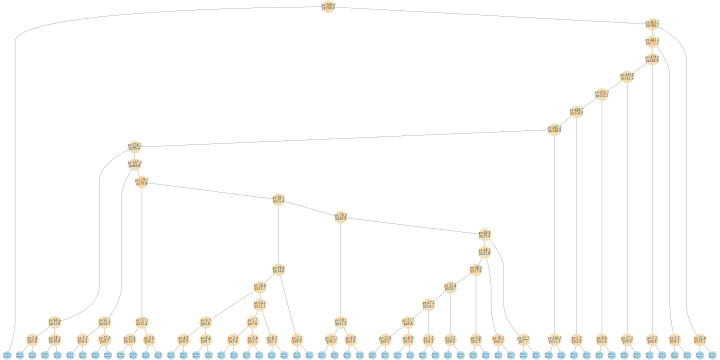

In [213]:
print('Beam Search LH JET')

tree = Tree1D.plotBinaryTree(beamSearch_jet, label=True)
tree.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
# tree.render(filename="../ToyJetsShower/notes/plots/figTruth_jet9")
display(tree)

In [214]:
totLH

array([-105.86814988, -105.86814988,  -53.66367602,  -53.66367602,
        -23.97760534,  -23.97760534,  -23.97760534,  -23.97760534,
        -23.97760534,  -23.97760534,  -23.97760534,  -23.97760534,
        -23.97760534,  -23.97760534,  -23.97760534,  -23.97760534,
        -23.97760534,  -23.97760534,  -19.97573602,  -19.97573602,
        -19.96748304,  -19.96748304,  -19.86358654,  -19.86358654,
        -19.7627002 ,  -19.7627002 ,  -19.75187731,  -19.75187731,
        -19.75187731,  -19.75187731,  -19.75187731,  -19.75187731,
        -19.75187731,  -19.75187731,  -19.75187731,  -19.75187731,
        -19.75187731,  -19.75187731,  -19.75187731,  -19.75187731,
        -19.75187731,  -19.75187731,  -18.66929018,  -18.66929018,
        -18.52664125,  -18.52664125,  -16.14583027,  -16.14583027,
        -15.82851183,  -15.82851183])

In [250]:
np.sum(np.asarray(beamSearch_jet["logLH"]))

-21.52384328842163

In [187]:
np.asarray(beamSearch_jet["logLH"])  - np.asarray(greedyLH["logLH"])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

Beam Search LH JET


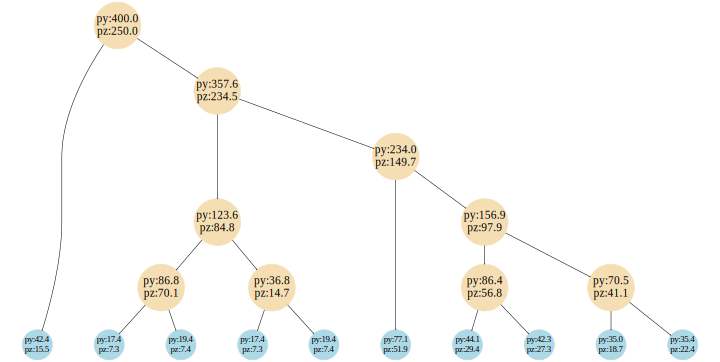

In [113]:
print('Beam Search LH JET')
tree = Tree1D.plotBinaryTree(beamSearch_jet, label=True)
tree.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
# tree.render(filename="../ToyJetsShower/notes/plots/figTruth_jet9")
display(tree)

## GREEDY (STEP = 1 OPTIMIZATION)

In [159]:
# truth_jet["logLH"]

In [284]:
# Fill list with log likelihood of truth jet
likelihood.enrich_jet_logLH(truth_jet)

In [285]:
np.sum(truth_jet["logLH"]) #with integral

-16.83590602874756

In [286]:
np.asarray(truth_jet["logLH"])

array([-2.58506131, -2.18959141,  0.        , -1.98505843,  0.        ,
        0.        , -0.22564268, -1.97229087,  0.        ,  0.        ,
       -1.67165995, -2.16956019,  0.        , -1.89435005,  0.        ,
        0.        , -2.14269114,  0.        ,  0.        ])

In [294]:
# Recluster jet with greedy likelihood algorithm
importlib.reload(reclustGreedyLH)
greedyLH = reclustGreedyLH.recluster(truth_jet, delta_min =  truth_jet["pt_cut"]  , lam = truth_jet["Lambda"])

In [288]:
np.sum(greedyLH["logLH"]) #with integral

-21.523842

In [109]:
np.asarray(greedyLH["logLH"])

array([-1.89435   , -1.9722909 ,  0.4995904 , -1.9850584 , -2.1426911 ,
       -0.30674982, -4.018512  , -3.960257  , -5.7435246 ], dtype=float32)

In [218]:
np.asarray(beamSearch_jet["logLH"])

array([-1.89435005, -1.97229087,  0.4995904 , -1.98505843, -2.14269114,
       -0.30674982, -4.01851177, -3.96025705, -5.74352455])

## BEAM SEARCH VS GREEDY CROSS-CHECK 

The greedy algorithm should be a base case of the beam search. In particular they should be identical when the beam size is one.
We compare them for this case of beam size = 1 below and see that they give the same latent structure. 

In [300]:
beamSearch_jetsOne = beamSearch.recluster( 
    truth_jet, 
    beamSize = 1,
    delta_min =  truth_jet["pt_cut"],
    lam = truth_jet["Lambda"],
    N_best = 1,
)

In [301]:
beamSearch_jetsOne[-1]["logLH"]

array([-1.89435005, -1.97229087,  0.4995904 , -1.98505843, -2.14269114,
       -0.30674982, -4.01851177, -3.96025705, -5.74352455])

In [295]:
greedyLH["logLH"]

array([-1.89435   , -1.9722909 ,  0.4995904 , -1.9850584 , -2.1426911 ,
       -0.30674982, -4.018512  , -3.960257  , -5.7435246 ], dtype=float32)

In [302]:
np.asarray(greedyLH["logLH"]) -  beamSearch_jetsOne[-1]["logLH"]

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

Now we chech that fre a big enough beam size, the beam seach algorithm gives a better solution:

In [306]:
beamSearch_jetsComp = beamSearch.recluster( 
    truth_jet, 
    beamSize = 20,
    delta_min =  truth_jet["pt_cut"],
    lam = truth_jet["Lambda"],
    N_best = 1,
)

In [307]:
# Beam search total log likelihood
np.sum(beamSearch_jetsComp[-1]["logLH"])

-19.751877307891846

In [308]:
# Greedy total log likelihood
np.sum(greedyLH["logLH"])

-21.523842

# DENDROGRAM DIFFERENCES AMONG BEAM SEARCH SOLUTIONS

In [413]:
importlib.reload(beamSearch)
beamSearch_jetstest = beamSearch.recluster( 
    truth_jet, 
    beamSize = 1,
    delta_min =  truth_jet["pt_cut"],
    lam = truth_jet["Lambda"],
    N_best = 10,
)

len(jet_const) =  10


In [414]:
len(beamSearch_jetstest[-1]["tree_ancestors"])

10

In [415]:
len(truth_jet["tree_ancestors"])

10

In [416]:
truth_jet['tree_ancestors']

[array([0., 1., 2.]),
 array([0., 1., 3., 4.]),
 array([0., 1., 3., 5.]),
 array([0., 6., 7., 8.]),
 array([0., 6., 7., 9.]),
 array([ 0.,  6., 10., 11., 12.]),
 array([ 0.,  6., 10., 11., 13., 14.]),
 array([ 0.,  6., 10., 11., 13., 15.]),
 array([ 0.,  6., 10., 16., 17.]),
 array([ 0.,  6., 10., 16., 18.])]

In [417]:
beamSearch_jetstest[-1]["tree_ancestors"]

[array([18.,  5.]),
 array([18., 17., 12., 10.,  6.]),
 array([18., 17., 12., 10.,  7.]),
 array([18., 17., 12., 11.,  3.]),
 array([18., 17., 12., 11.,  4.]),
 array([18., 17., 16.,  0.]),
 array([18., 17., 16., 15., 13.,  1.]),
 array([18., 17., 16., 15., 13.,  2.]),
 array([18., 17., 16., 15., 14.,  8.]),
 array([18., 17., 16., 15., 14.,  9.])]

In [418]:
greedyLH["tree_ancestors"]

[array([18.,  5.]),
 array([18., 17., 12., 10.,  6.]),
 array([18., 17., 12., 10.,  7.]),
 array([18., 17., 12., 11.,  3.]),
 array([18., 17., 12., 11.,  4.]),
 array([18., 17., 16.,  0.]),
 array([18., 17., 16., 15., 13.,  1.]),
 array([18., 17., 16., 15., 13.,  2.]),
 array([18., 17., 16., 15., 14.,  8.]),
 array([18., 17., 16., 15., 14.,  9.])]

In [399]:
importlib.reload(beamSearch)
Const = beamSearch.getConstituents(beamSearch_jetstest[-6],	-1,
	truth_jet["root_id"],
	[] )

In [400]:
len(Const)

11

2019-08-09 18:28:05,369:INFO::(Truth jet - recluster jet1) heat data


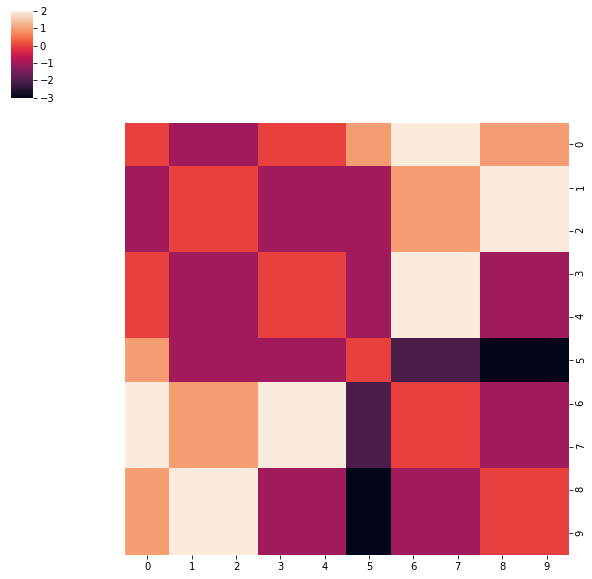

In [336]:
heatClustermap.dendrogramDiff(
    truthJet=truth_jet,
    recluster_jet1=beamSearch_jetstest[-1],
    full_path=False, 
    FigName=None)

2019-08-09 18:22:39,497:INFO::(Truth jet - recluster jet1) heat data


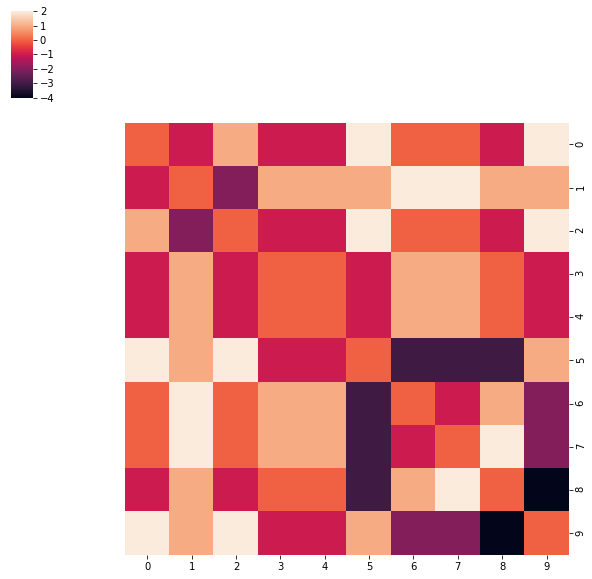

In [317]:
heatClustermap.dendrogramDiff(
    truthJet=truth_jet,
    recluster_jet1=reclusterKt,
    full_path=False, 
    FigName=None)

# 1D -TREE ONLY VISUALIZATIONS

### Ordering of the leaves as they are accessed when traversing the tree

Greedy LH JET


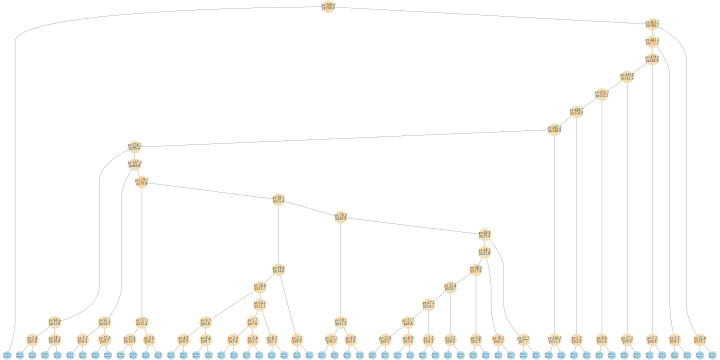

In [166]:
print('Greedy LH JET')
tree = Tree1D.plotBinaryTree(greedyLH, label=True)
tree.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
# tree.render(filename="../ToyJetsShower/notes/plots/figTruth_jet9")
display(tree)

## PAIR OF TREES COMPARISONS

### Leaves ordered as they are accessed when traversing the TRUTH JET tree

Leaves ordered according to truth jet - Greedy LH (top) vs TRUTH (bottom) trees


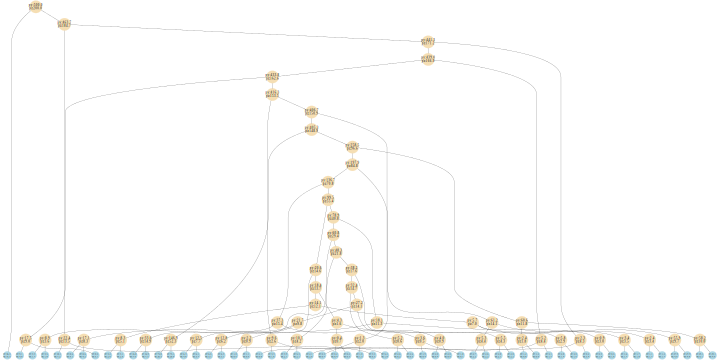

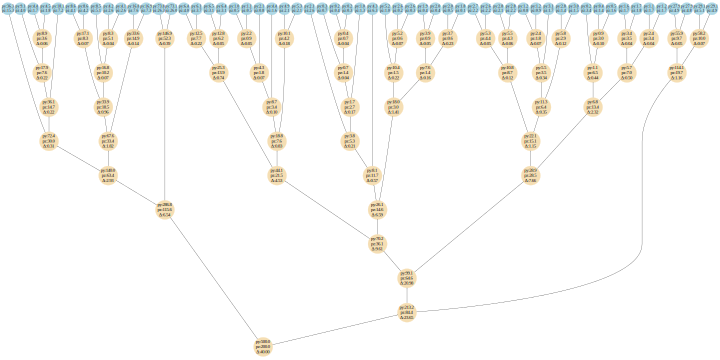

In [167]:
print("Leaves ordered according to truth jet - Greedy LH (top) vs TRUTH (bottom) trees")
tree1, tree2 = Tree1D.visualizeTreePair(greedyLH, truth_jet, truthOrder=True, label=True)
tree1.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
tree2.attr(rankdir='BT', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
display(tree1)
display(tree2)

### Leaves ordered as they are accessed when traversing the Greedy LH JET tree

Leaves ordered according to greedyLH jet - CA (top) vs greedyLH (bottom) trees


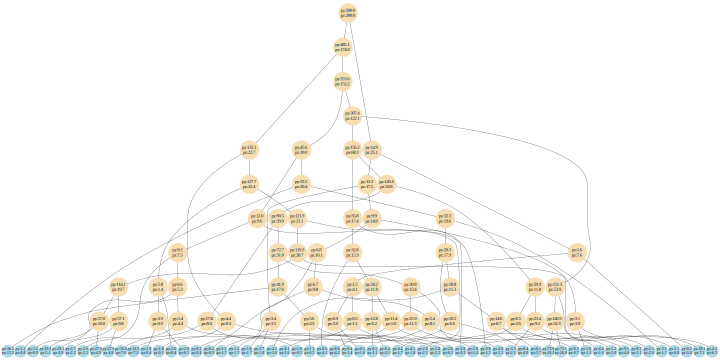

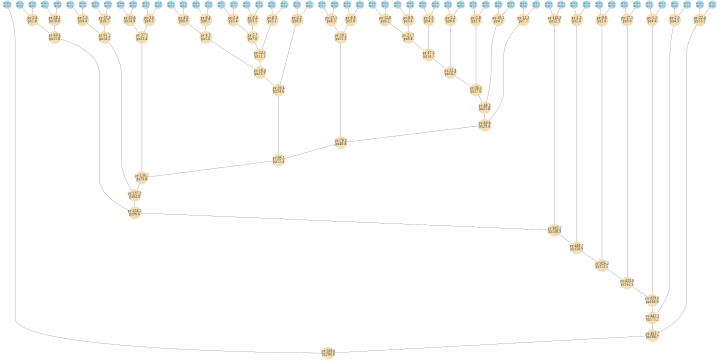

In [168]:
print("Leaves ordered according to greedyLH jet - CA (top) vs greedyLH (bottom) trees")
tree1, tree2 = Tree1D.visualizeTreePair(greedyLH, reclusterCA, truthOrder=False, label=True, alpha_jet2= 0)
tree1.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
tree2.attr(rankdir='BT', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
display(tree1)
display(tree2)

### Leaves ordered as they are accessed when traversing the Kt/CA or Anti-kt JET tree

Leaves ordered according to CA jet - greedyLH (top) vs CA (bottom) trees


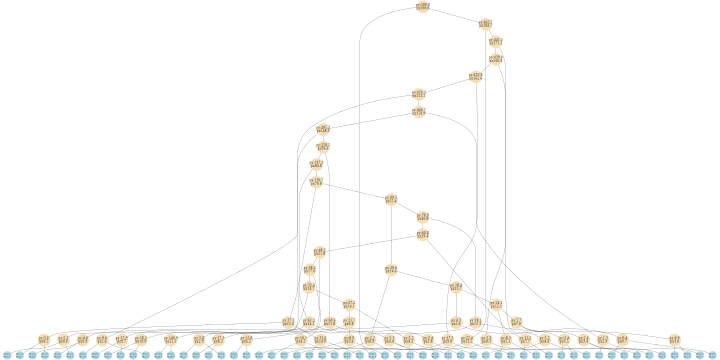

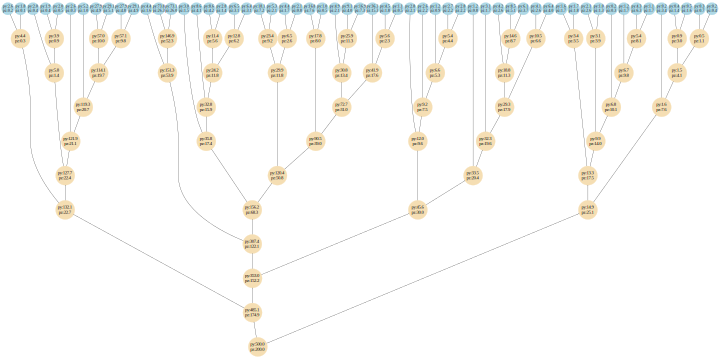

In [169]:
print("Leaves ordered according to CA jet - greedyLH (top) vs CA (bottom) trees")
tree1, tree2 = Tree1D.visualizeTreePair(reclusterCA, greedyLH, truthOrder=False, label=True, alpha_jet1= 0)
tree1.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
tree2.attr(rankdir='BT', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
display(tree1)
display(tree2)

# 1D -TREE ONLY VISUALIZATIONS

### Ordering of the leaves as they are accessed when traversing the tree

TRUTH JET


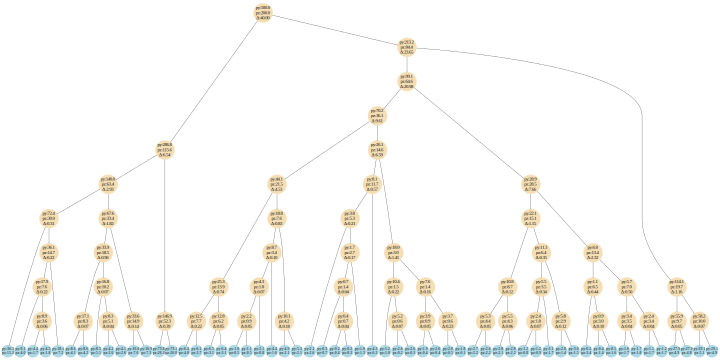

In [11]:
print('TRUTH JET')
tree = Tree1D.plotBinaryTree(truth_jet, label=True)
tree.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
# tree.render(filename="../ToyJetsShower/notes/plots/figTruth_jet9")
display(tree)

KT JET


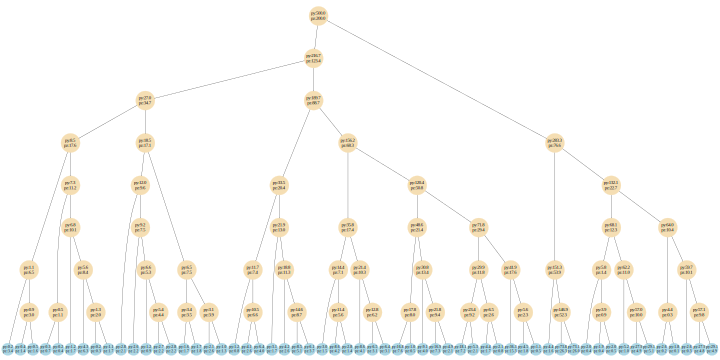

In [12]:
print('KT JET')
tree = Tree1D.plotBinaryTree(reclusterKt, label=True)
tree.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
# tree.render(filename="../ToyJetsShower/notes/plots/figTruth_jet9")
display(tree)

CA JET


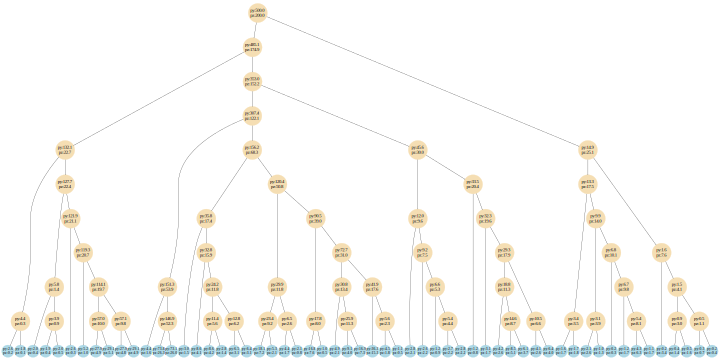

In [13]:
print('CA JET')
tree = Tree1D.plotBinaryTree(reclusterCA, label=True)
tree.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
# tree.render(filename="../ToyJetsShower/notes/plots/figTruth_jet9")
display(tree)

ANTIKT JET


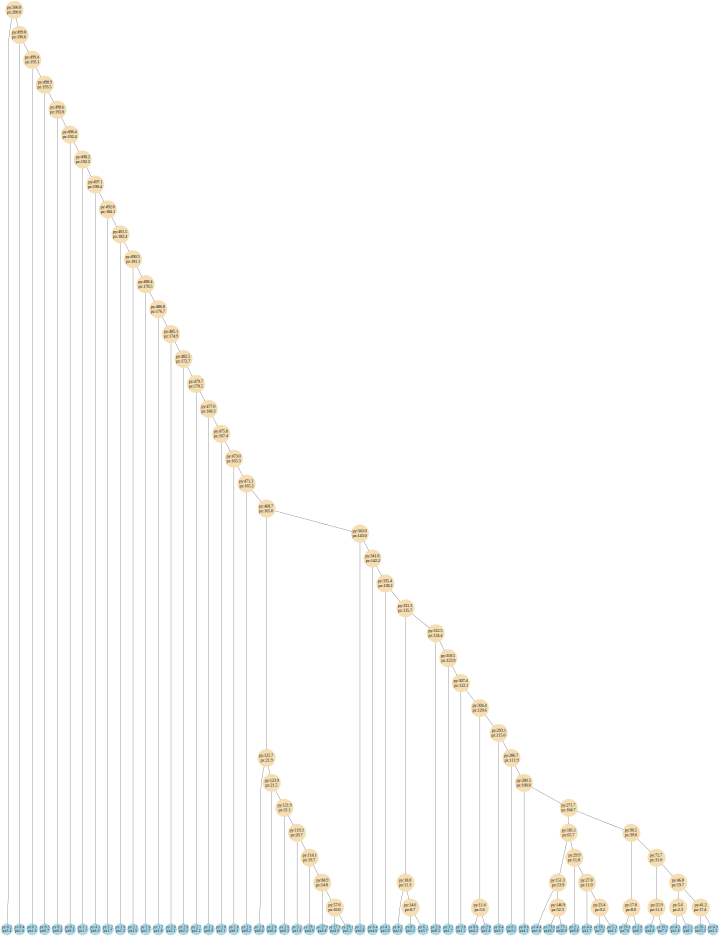

In [14]:
print('ANTIKT JET')
tree = Tree1D.plotBinaryTree(reclusterAntikt, label=True)
tree.attr(rankdir='TB', size="13",margin='0' ,ratio="1.3" , nodesep="0.01")
# tree.render(filename="../ToyJetsShower/notes/plots/figTruth_jet9")
display(tree)

### Sort leaves by increasing  py (pT=abs[py])

TRUTH JET


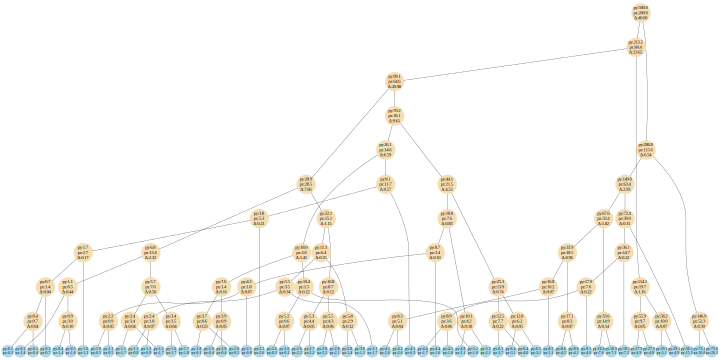

In [15]:
print('TRUTH JET')
tree = Tree1D.plotBinaryTree(truth_jet, label=True, pySort=True)
tree.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
# tree.render(filename="../ToyJetsShower/notes/plots/figTruth_jet9")
display(tree)

KT JET


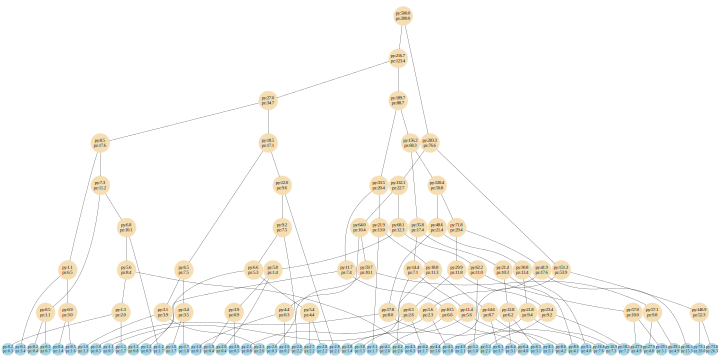

In [16]:
print('KT JET')
tree = Tree1D.plotBinaryTree(reclusterKt, label=True, pySort=True)
tree.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
# tree.render(filename="../ToyJetsShower/notes/plots/figTruth_jet9")
display(tree)

CA JET


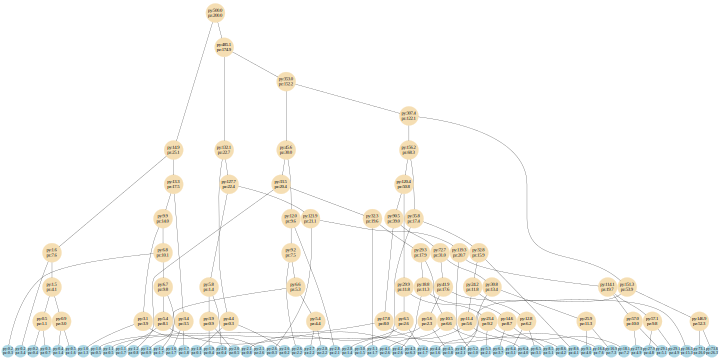

In [17]:
print('CA JET')
tree = Tree1D.plotBinaryTree(reclusterCA, label=True, pySort=True)
tree.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
# tree.render(filename="../ToyJetsShower/notes/plots/figTruth_jet9")
display(tree)

ANTIKT JET


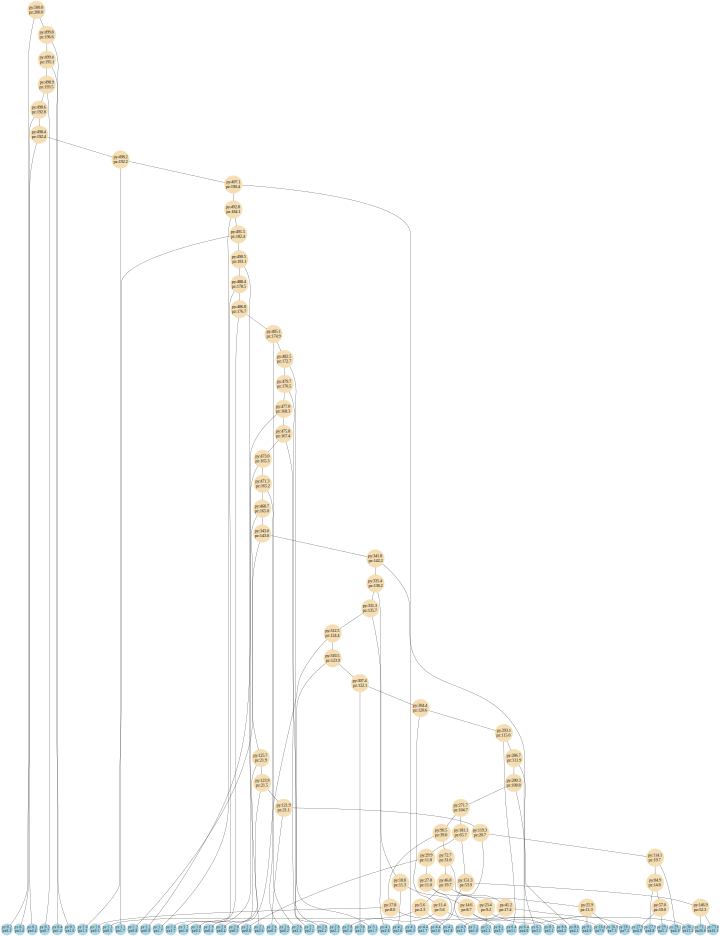

In [18]:
print('ANTIKT JET')
tree = Tree1D.plotBinaryTree(reclusterAntikt, label=True, pySort=True)
tree.attr(rankdir='TB', size="13",margin='0' ,ratio="1.3" , nodesep="0.01")
# tree.render(filename="../ToyJetsShower/notes/plots/figTruth_jet9")
display(tree)

## PAIR OF TREES COMPARISONS

### Leaves ordered as they are accessed when traversing the TRUTH JET tree

Leaves ordered according to truth jet - KT (top) vs TRUTH (bottom) trees


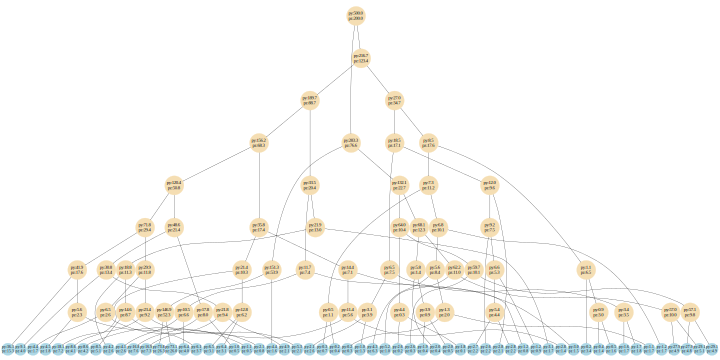

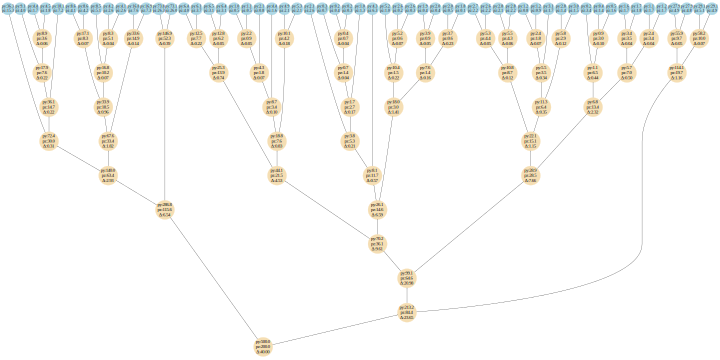

In [19]:
print("Leaves ordered according to truth jet - KT (top) vs TRUTH (bottom) trees")
tree1, tree2 = Tree1D.visualizeTreePair(reclusterKt, truth_jet, truthOrder=True, label=True)
tree1.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
tree2.attr(rankdir='BT', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
display(tree1)
display(tree2)

Leaves ordered according to truth jet - CA (top) vs TRUTH (bottom) trees


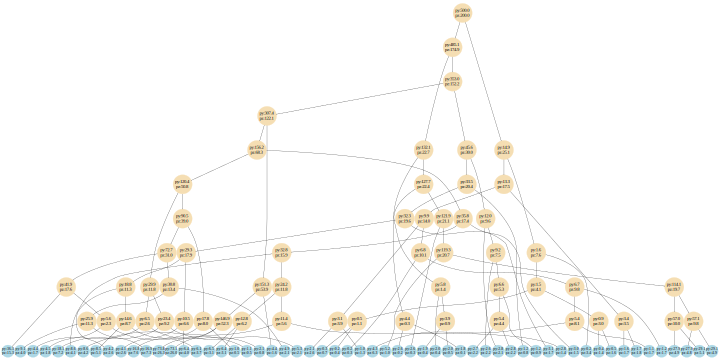

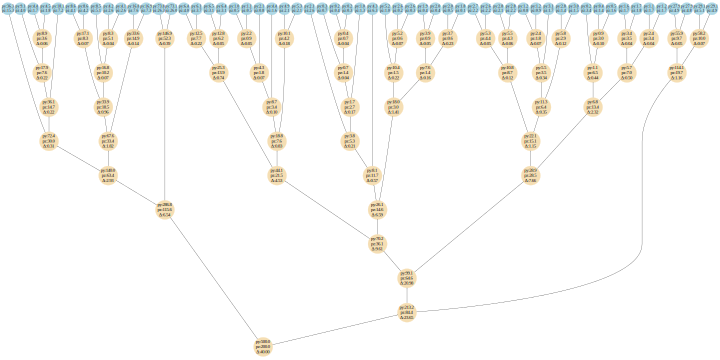

In [20]:
print("Leaves ordered according to truth jet - CA (top) vs TRUTH (bottom) trees")
tree1, tree2 = Tree1D.visualizeTreePair(reclusterCA, truth_jet,  truthOrder=True, label=True)
tree1.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
tree2.attr(rankdir='BT', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
display(tree1)
display(tree2)

Leaves ordered according to truth jet - ANTIKT (top) vs TRUTH (bottom) trees


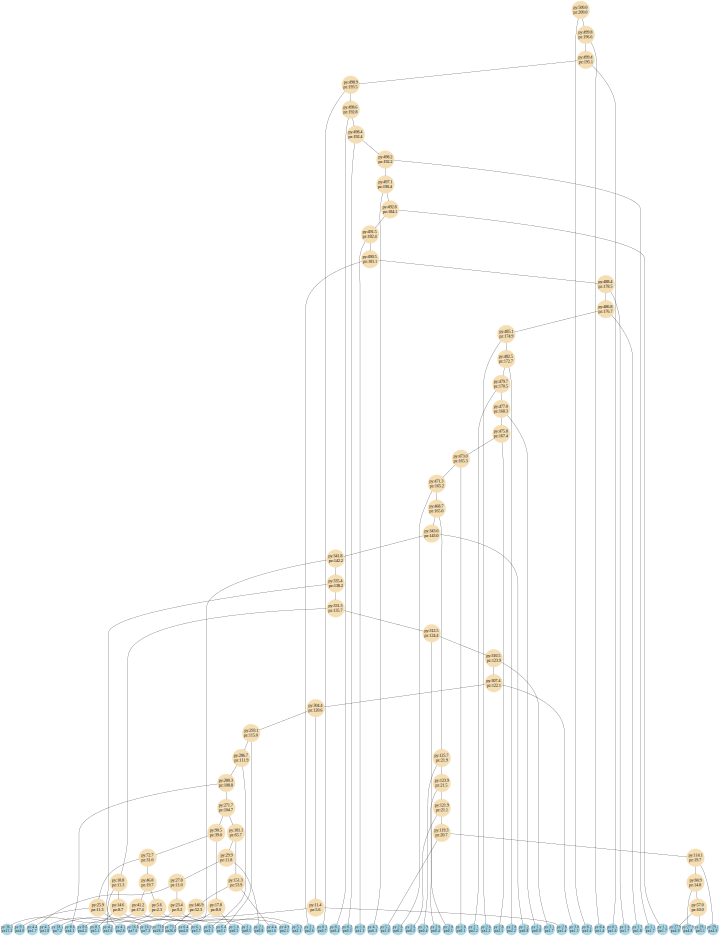

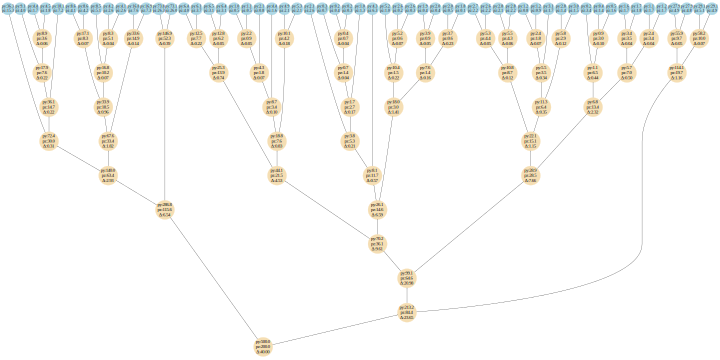

In [21]:
print("Leaves ordered according to truth jet - ANTIKT (top) vs TRUTH (bottom) trees")
tree1, tree2 = Tree1D.visualizeTreePair(reclusterAntikt, truth_jet, truthOrder=True, label=True)
tree1.attr(rankdir='TB', size="13",margin='0' ,ratio="1.3" , nodesep="0.01")
tree2.attr(rankdir='BT', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
display(tree1)
display(tree2)

### Leaves ordered as accessed when traversing the JET in the 1st argument of visualizeTreePair 

Leaves ordered according to ANTIKT jet - TRUTH (top) vs ANTIKT (bottom) trees


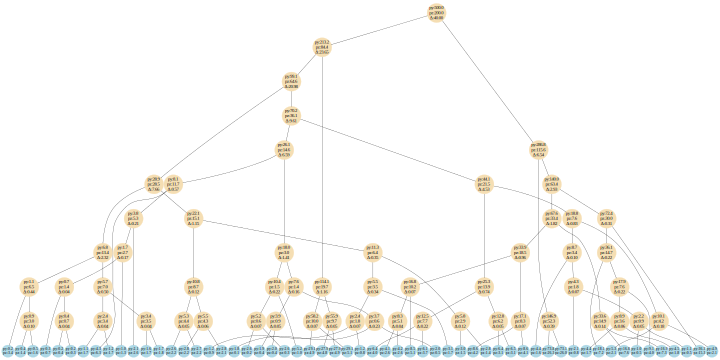

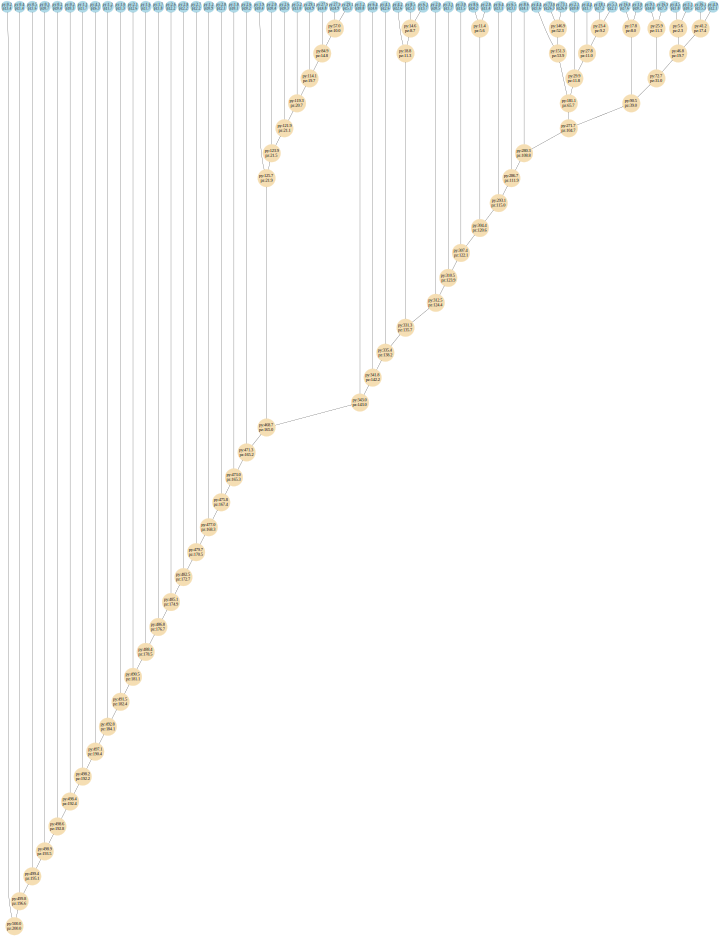

In [22]:
print("Leaves ordered according to ANTIKT jet - TRUTH (top) vs ANTIKT (bottom) trees")
tree1, tree2 = Tree1D.visualizeTreePair(reclusterAntikt, truth_jet,  truthOrder=False, label=True)
tree1.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
tree2.attr(rankdir='BT', size="13",margin='0' ,ratio="1.3" , nodesep="0.01")
display(tree1)
display(tree2)

Leaves ordered according to ANTIKT jet - KT (top) vs ANTIKT (bottom) trees


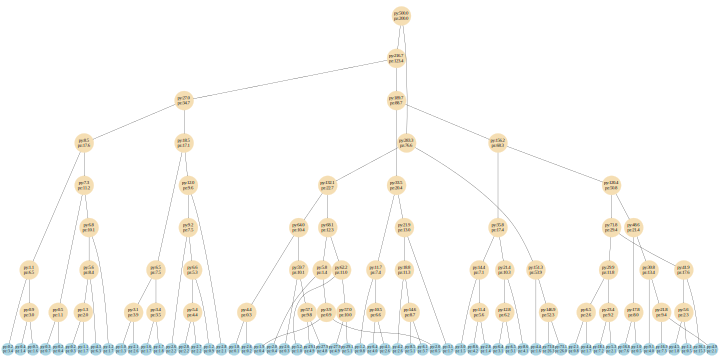

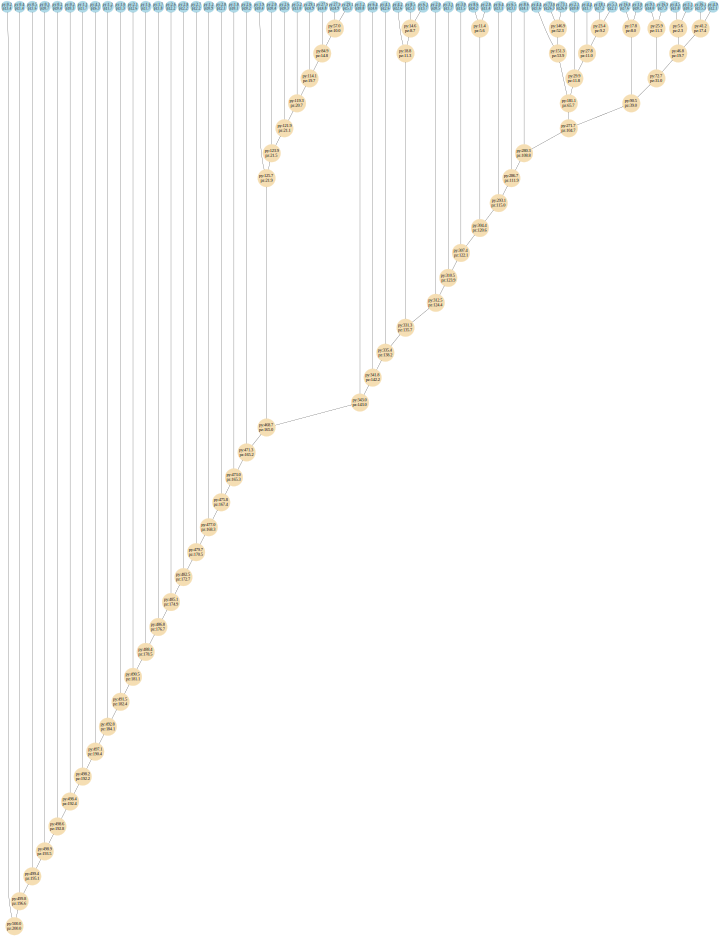

In [23]:
print("Leaves ordered according to ANTIKT jet - KT (top) vs ANTIKT (bottom) trees")
tree1, tree2 = Tree1D.visualizeTreePair(reclusterAntikt, reclusterKt,  truthOrder=False, label=True, alpha_jet1=-1, alpha_jet2= 1)
tree1.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
tree2.attr(rankdir='BT', size="13",margin='0' ,ratio="1.3" , nodesep="0.01")
display(tree1)
display(tree2)

Leaves ordered according to KT jet - CA (top) vs KT (bottom) trees


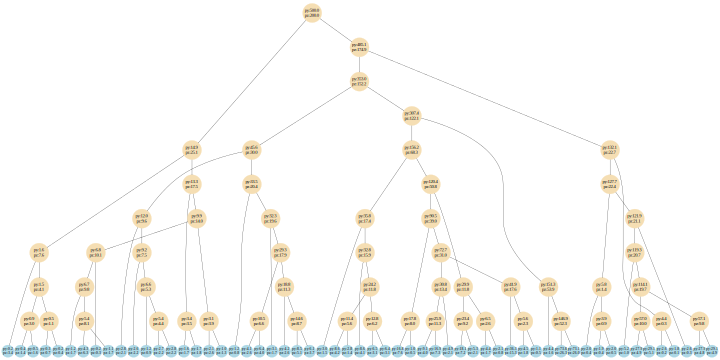

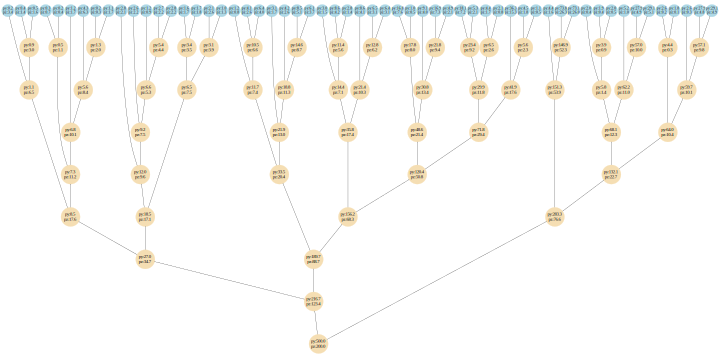

In [24]:
print("Leaves ordered according to KT jet - CA (top) vs KT (bottom) trees")
tree1, tree2 = Tree1D.visualizeTreePair(reclusterKt, reclusterCA, truthOrder=False, label=True, alpha_jet1=1, alpha_jet2= 0)
tree1.attr(rankdir='TB', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
tree2.attr(rankdir='BT', size="10",margin='0' ,ratio="0.5" , nodesep="0.01")
display(tree1)
display(tree2)